# Methodology
This study uses the CRISP-DM framework—a six-step, industry-standard process—to guide our research on detecting fake news with a Fuzzy Deep Hybrid Network (FDHN). CRISP-DM begins with Business Understanding, where we define our goal: automating the identification of deceptive news. Next is Data Understanding, in which we examine and explore the available data to see how it can help us accomplish that goal.

With a solid grasp of our objectives and data, we move to Data Preparation, cleaning and organizing the dataset to ensure it’s ready for modeling. In the Modeling phase, we build and train our FDHN, integrating fuzzy logic to handle uncertainty inherent in fact-checking. Evaluation follows, where we rigorously test the model against benchmarks to confirm its accuracy and reliability. Finally, Deployment plans how to integrate the solution into real-world fact-checking workflows.

The framework’s strength lies in its clear structure and emphasis on thoroughly understanding both the problem and the data before crafting a solution. By following every CRISP-DM phase, our research remains systematic and transparent, ensuring that each step—from defining the challenge to rolling out our model—is thoughtfully executed and grounded in the realities of fake news detection.



1. **Business Understanding**

    *  Define your core research question: Which fuzzy membership functions and hybrid strategies yield the most accurate fake-news detection?
    *  Clarify objectives: Compare Gaussian, Triangular, Trapezoidal, Sigmoid-based, Bell-shaped, and FNN layers, plus BERT and ANN+BERT hybrids, all within the FDHN architecture.
    *  Identify success criteria: Improved accuracy, F1-score, and robustness against uncertainty.

2. **Data Understanding**

    *  Describe the LIAR2 dataset: 23K fact-checked political statements, with
      full speaker descriptions, timestamps, and justifications.
    *  Explore its features: Statement text, speaker history, fuzzy justifications, and metadata.
    *  Note any quality issues: Missing justifications, imbalanced classes, or noisy context that may affect modeling.

3. **Data Preparation**

    * Clean and normalize text: removing unnecessary information, apply tokenization, and standardize date fields.
    * Engineer fuzzy inputs: For each membership function (Gaussian, Triangular, Trapezoidal, Sigmoid, Bell), compute membership degrees for numerical context.
    * Integrate BERT embeddings: Precompute BERT vectors for statements to serve as an extra feature

4. **Modelling**:
Build multiple FDHN variants:

  *   FDHN+Gaussian
  *   FDHN+Triangular
  *   FDHN+Trapezoidal
  *   FDHN+Sigmoid
  *   FDHN+Bell
  *   FDHN+FNN layer
  *   FDHN+BERT
  *   Hybrid ANN+BERT

5. **Evaluation**

    *  Use accuracy, macro-F1, and micro-F1 to compare models on the held-out test set.
    *  Conduct ablation studies to isolate the impact of each membership function, the FNN layer, and BERT features.
    *  Analyse statistical significance and error cases to understand where each approach excels or struggles.

6. **Deployment**: Outline how the best-performing FDHN variant could be packaged as a fact-checking tool.

This CRISP-DM layout ensures you systematically move from defining your fake-news-detection goals to delivering a rigorously evaluated, deployable FDHN comparison.


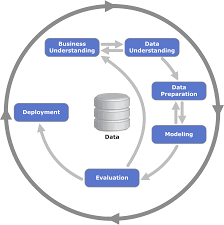


On a higher level, the tasks done in each phase will be explained in brief below. The separate chapters explain in detail regarding to each phase.




















# Business Understanding
Fake news spreads rapidly online, undermining trust in media and democracy. Our goal is to build an automated system that flags deceptive political statements before they mislead readers. We focus on the LIAR2 dataset—a rich collection of fact-checked statements with speaker history and detailed justifications—to ensure our model learns from real-world examples. By combining fuzzy logic with deep learning, we aim to handle the uncertainty and nuance inherent in fact-checking, delivering a reliable tool that supports journalists, platforms, and readers in identifying misinformation quickly and accurately.

In [ ]:
import pandas as pd
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')
# Show all columns
pd.set_option('display.max_columns', None)

# Show all rows
pd.set_option('display.max_rows', None)

# Show full content in each cell (no truncation)
pd.set_option('display.max_colwidth', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Understanding (EDA)

In [ ]:
# reading the data
df_train = pd.read_csv('/content/drive/MyDrive/Fake_News_Detection/fake_news_train.csv',encoding='utf-8')
df_test = pd.read_csv('/content/drive/MyDrive/Fake_News_Detection/fake_news_test.csv',encoding='utf-8')
df_validation = pd.read_csv('/content/drive/MyDrive/Fake_News_Detection/fake_news_valid.csv',encoding='utf-8')

In [ ]:
# understanding the data structure
print(df_train.shape)
print(df_validation.shape)
print(df_test.shape)

(18369, 16)
(2297, 16)
(2296, 16)


In [ ]:
# dropping the "id" label as it has no significance in data preparation and modelling
df_train.drop('id',axis =1,inplace = True)
df_validation.drop('id',axis =1,inplace = True)
df_test.drop('id',axis =1,inplace = True)

In [ ]:
# understandaing columns and checking for any null values
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18369 entries, 0 to 18368
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   label                 18369 non-null  int64 
 1   statement             18369 non-null  object
 2   date                  18369 non-null  object
 3   subject               18205 non-null  object
 4   speaker               18369 non-null  object
 5   speaker_description   18361 non-null  object
 6   state_info            13870 non-null  object
 7   true_counts           18369 non-null  int64 
 8   mostly_true_counts    18369 non-null  int64 
 9   half_true_counts      18369 non-null  int64 
 10  mostly_false_counts   18369 non-null  int64 
 11  false_counts          18369 non-null  int64 
 12  pants_on_fire_counts  18369 non-null  int64 
 13  context               18247 non-null  object
 14  justification         18369 non-null  object
dtypes: int64(7), object(8)
memory usage:

In [ ]:
df_train.head()

label  \
0      5   
1      1   
2      0   
3      4   
4      2   

                                                                                                                    statement  \
0                                            90 percent of Americans "support universal background checks" for gun purchases.   
1                                                 Last year was one of the deadliest years ever for law enforcement officers.   
2                                                                Bernie Sanders's plan is "to raise your taxes to 90 percent.   
3  Voter ID is supported by an overwhelming majority of NYers, from all across the state, walks of life, & political parties.   
4                                              Says Barack Obama "robbed Medicare (of) $716 billion to pay for ... Obamacare.   

               date  \
0   October 2, 2017   
1      May 19, 2017   
2  October 28, 2015   
3  December 8, 2021   
4   August 12, 2012   

                                                                subject  \
0                   government regulation;polls and public opinion;guns   
1  after the fact;congress;criminal justice;history;crime;public safety   
2                                                                 taxes   
3                                                         voter id laws   
4                            federal budget;history;medicare;retirement   

          speaker  \
0     chris abele   
1     thom tillis   
2  chris christie   
3      lee zeldin   
4     mitt romney   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   speaker_description  \
0                                                                                                                                                                                                                                                                                                                                                                                                         Chris Abele is Milwaukee County Executive, a position he won in an April 2011 special election to finish out the final year of the term of Scott Walker, who was elected governor in November 2010. The election was the first attempt at political office for Abele, a Milwaukee philanthropist and business owner.\r\nThe office is nonpartisan, but Abele has indicated he is a Democrat.   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Thom Tillis is a Republican who serves as U.S. Senator from North Carolina.   
2                                                                                                       

## Explore subject distribution

Analyze the distribution of subjects in the training data.

Calculate and display the value counts of the 'subject' column, then display the top 10 subjects, and finally create a bar plot for the top 10 subjects to visualize their distribution.




Top 10 most frequent subjects:


subject
facebook fact-checks                760
health care                         472
elections                           385
taxes                               372
education                           333
facebook fact-checks;coronavirus    329
immigration                         291
candidate biography                 228
elections;facebook fact-checks      209
fake news;punditfact                194
Name: count, dtype: int64

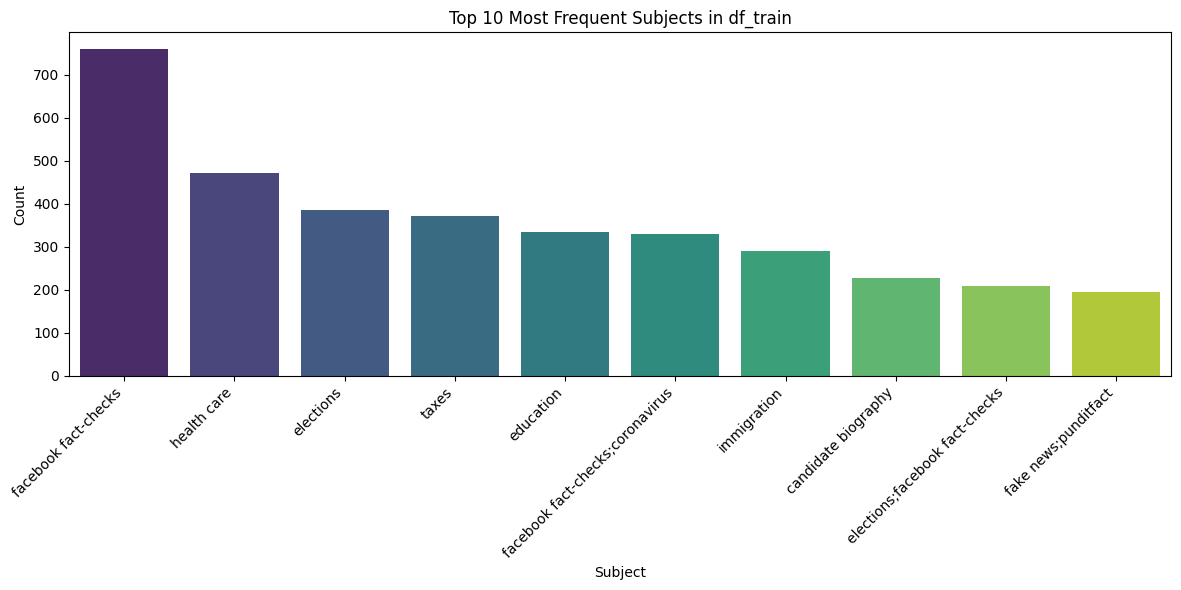

In [ ]:
subject_counts = df_train['subject'].value_counts()

print("\nTop 10 most frequent subjects:")
display(subject_counts.head(10))

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=subject_counts.head(10).index, y=subject_counts.head(10).values, palette='viridis')
plt.title('Top 10 Most Frequent Subjects in df_train')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Explore speaker distribution

Examine the most frequent speakers in the dataset.

Calculate and print the value counts for the 'speaker' column, then display the top 10 speakers and create a bar plot for visualization as requested in the instructions.





Top 10 most frequent speakers:


speaker
facebook posts     1879
viral image         900
donald trump        780
bloggers            580
instagram posts     498
barack obama        475
hillary clinton     245
joe biden           218
mitt romney         167
scott walker        159
Name: count, dtype: int64

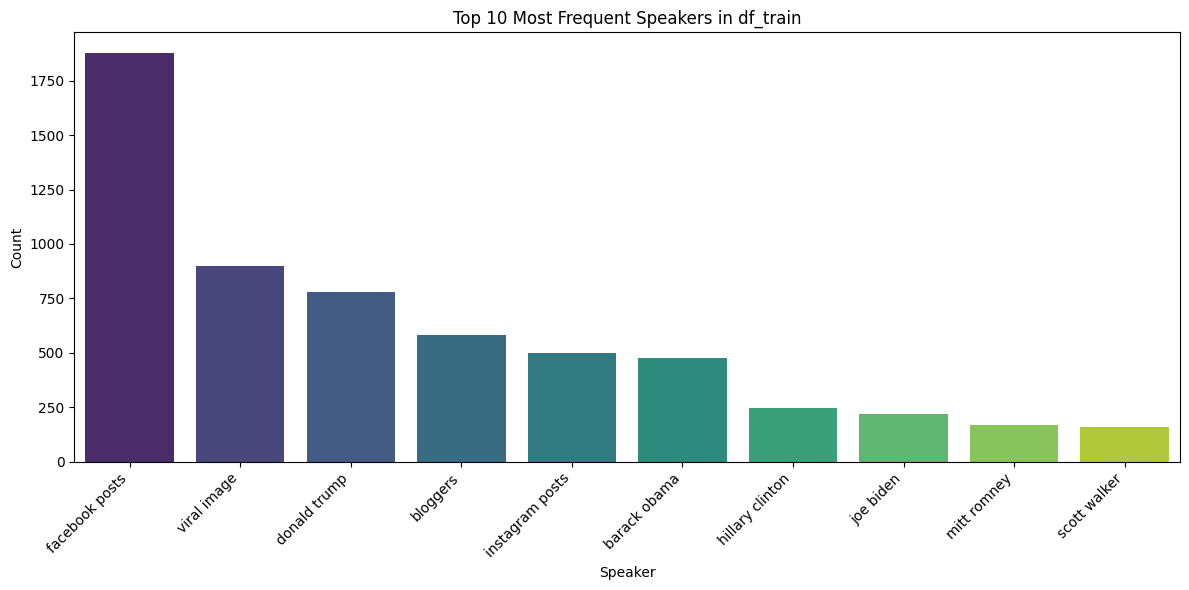

In [ ]:
speaker_counts = df_train['speaker'].value_counts()

print("\nTop 10 most frequent speakers:")
display(speaker_counts.head(10))

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=speaker_counts.head(10).index, y=speaker_counts.head(10).values, palette='viridis')
plt.title('Top 10 Most Frequent Speakers in df_train')
plt.xlabel('Speaker')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Visualize label distribution

Create a visualization to show the distribution of the 'label' column.

Create a count plot to visualize the distribution of the 'label' column as requested.

label
1    5284
3    2967
2    2882
4    2743
0    2425
5    2068
Name: count, dtype: int64

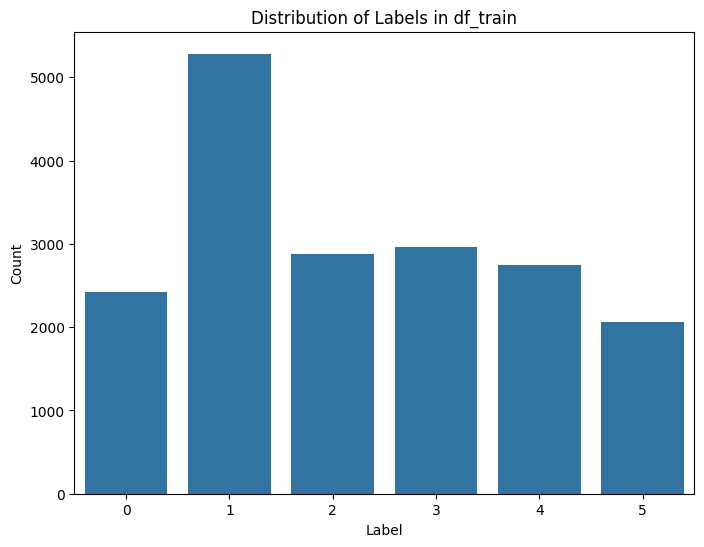

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

label_counts = df_train['label'].value_counts()
display(label_counts)

plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df_train)
plt.title('Distribution of Labels in df_train')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

## Data Analysis Key Findings

*   The most frequent subject in the dataset is "facebook fact-checks" with 760 occurrences, followed by "politics", "election 2016", and "government" among the top 10.
*   The most frequent speakers are "facebook posts", "viral image", and "donald trump".
*   The distribution of labels shows the frequency of true and fake news instances in the training data with label 1 i.e False value with count of 5284 to be dominant in the training dataset which while training will make the model biased to false values so balancing of data before training is necessary.

# Data Preparation

## statement

In [ ]:
# matching regex pattern meaning “anything that is NOT (^) a word character (\w) or whitespace (\s)” and replacing it with whitespaces.
# lowercasing the text
import re
df_train['statement'] = df_train['statement'].str.replace(r'[^\w\s]','',regex=True)
df_train['statement'] = df_train['statement'].str.lower()
df_train['statement'].head(10)

0                                                                                                                                 90 percent of americans support universal background checks for gun purchases
1                                                                                                                                    last year was one of the deadliest years ever for law enforcement officers
2                                                                                                                                                     bernie sanderss plan is to raise your taxes to 90 percent
3                                                                                         voter id is supported by an overwhelming majority of nyers from all across the state walks of life  political parties
4                                                                                                                                        says barack obama robbed medicare of 716 billion to pay for  obamacare
5                                                                                                                video says covid19 vaccines are weapons of mass destruction that could wipe out the human race
6                                         says jeff reardon cut elementary school music classes art instruction teaching positions basketball and volleyball programs and he voted to raise school lunch prices
7                                                                                                                                       one in three women is sexually assaulted on the dangerous journey north
8                                                                                                                                                                           its actually the safest time to fly
9    we know dangerous criminals can slip through immigration at airports just like ours yet joe donnelly stood right here with the radical left against all efforts to secure our most vulnerable entry points
Name: statement, dtype: object

## subject

In [ ]:
# replacing semicolons (;) with commas (,)
# Lowercasing the text
# filing missing values with (" ")
df_train['subject'] = df_train['subject'].str.replace(r';',',',regex=True)
df_train['subject'] = df_train['subject'].str.lower()
df_train.fillna('',inplace=True)
df_train['subject'].head(10)

0                     government regulation,polls and public opinion,guns
1    after the fact,congress,criminal justice,history,crime,public safety
2                                                                   taxes
3                                                           voter id laws
4                              federal budget,history,medicare,retirement
5                                        facebook fact-checks,coronavirus
6                            education,message machine 2012,voting record
7                   immigration,corrections and updates,homeland security
8                                    public health,punditfact,coronavirus
9                                                             immigration
Name: subject, dtype: object

## speaker

In [ ]:
#code to check if all the data in speaker column is is lower case
for i in df_train['speaker']:
  if i.islower():
    continue
  else:
    print(i)

## speaker_description

In [ ]:
# matching regex pattern meaning “anything that is NOT (^) a word character (\w) or whitespace (\s)” and replacing it with whitespaces.
# Lowercasing the text
# filing missing values with (" ")
df_train['speaker_description'] = df_train['speaker_description'].str.replace(r'[^\w\s]','',regex=True)
df_train['speaker_description'] = df_train['speaker_description'].str.lower()
df_train.fillna('',inplace=True)
df_train['speaker_description'].head(10)

0                                                                                                                                                                                                                                                                                                                                                                                           chris abele is milwaukee county executive a position he won in an april 2011 special election to finish out the final year of the term of scott walker who was elected governor in november 2010 the election was the first attempt at political office for abele a milwaukee philanthropist and business owner\r\nthe office is nonpartisan but abele has indicated he is a democrat
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        thom tillis is a republican who serves as us senator from north carolina
2                                                                                                                                                                                                                                                                                                                                                                                                            chris christie announced june 6 2023 that he is running for the republican nomination for president christie was the governor of new jersey and a candidate for the republican nomination for president in 2016 as governor christie won office in 2010 and was reelected in 2014 prior to that he was us attorney for the district of new jersey from 2002 to 2008 
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    lee zeldin is a republican representing new yorks 1st congressional district
4    mitt romney is a us senator from utah he ran for president in 2012 as the republican nominee losing to incumbent president barack obama prior to that romney served one term as governor of massachusetts elected to the post in 2002 he was born in 1947 in michigan where his father was governor from 1963 to 1969 romney graduated from brigham young university and received both a law degree and an mba from harvard university romney helped found the investment firm bain capital in 1984 which launched or rebuilt such companies as staples and dominos pizza romney managed the winter olympics in salt lake city from 19992002 he ran for president in 2008 but lost the republican nomination he and his wife ann have five sons tagg craig matt ben and josh
5                                                                                                                                                                                                                                     

## state_info

In [ ]:
df_train['state_info'].fillna('')
print("No.of null values ",df_train['state_info'].isna().sum())

No.of null values  0


## context

In [ ]:
# matching regex pattern meaning “anything that is NOT (^) a word character (\w) or whitespace (\s)” and replacing it with whitespaces.
# Lowercasing the text
# filing missing values with (" ")
df_train['context'] = df_train['context'].str.replace(r'[^\w\s]','',regex=True)
df_train['context'] = df_train['context'].str.lower()
df_train['context'].fillna('')
df_train['context'].head(10)

0                                                     a tweet
1    a press release supporting the back the blue act of 2017
2                                                boulder colo
3                                                     a tweet
4                                  an interview on 60 minutes
5                                         a video on facebook
6                                             campaign mailer
7                                                    a speech
8                                       the fox  friends show
9                                                a digital ad
Name: context, dtype: object

## justification

In [ ]:
# removing URLs from the text
# # matching regex pattern meaning “anything that is NOT (^) a word character (\w) or whitespace (\s)” and replacing it with whitespaces.
# Lowercasing the text
df_train['justification'] = df_train['justification'].str.replace(r'[^\w\s]','',regex=True)
df_train['justification'] = df_train['justification'].str.replace(r'http\S+|www.\S+', '', regex=True)
df_train['justification'] = df_train['justification'].str.lower()
df_train['justification'].head(10)

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                    universal is the term for background checks to be done on every gun sale we found support for that policy at 94 percent in the latest national poll support ranged between 84 percent and 89 percent in the four other most recent polls experts say support at or near 90 percent has been consistent for years for a statement that is accurate and has nothing significant missing our rating is 
1                                                                                                                                                                                                                                                                                                                                                                                                                                      sen thom tillis a north carolina republican said a new propolice law is needed because 2016 was one of the deadliest years ever for law enforcement officers thats  in fact 2016 saw a belowaverage number and rate of officer deaths compared to the last halfcentury the 66 officers killed in 2016 pales in comparison to the 1970s and 1980s and wasnt much different from the typical year in the 1990s either we rate this  
2                                                                                                                                                                                              christie said that sanderss plan is to raise your taxes to 90 percent sanders hasnt released an official tax plan either for billionaires or for anyone else but based on his previous comments and proposals the tax policies sanders is advocating are targeted at corporations and affluent americans sanders has dismissed the notion that he wants to set marginal tax rates for billionaires at 90 percent and on the whole his tax proposals so far do not envision raising your taxes  that is those of ordinary americans  to anything approaching 90 percent this is a grossly  characterization of the extent and scope of sanders plan so we rate christies   
3    zeldin claimed voter identification requirements are supported by an overwhelming majority of new yorkers from across the state walks of life and political parties zeldin backs the  with a private poll of 600 new yorkers conducted for the conservative party of new york a majority of poll respondents 573 said they strongly support voter identification requirements for voting inperson or casting absentee ballots while 125 said they somewhat support the requirements the poll showed majorities of each racial group geographic group and political affiliation support the requirements with one exception support among democrats in the poll was at 49 with a margin of error of  4 percentage points   the requirements are broadly supported across the country and according to a single private poll in new york state as well  we rate this  
4                                                                                                                                                                                                                                                                                                                                                                                          romney said theres only one president that i know of in history that robbed medicare 716 billion to pay for a new risky program of his own that we call obamacare the only element of  here is that the health care law seeks to reduce future medicare spend

# Handelling  label Imbalance

Identify target and undersample amount: Determine the target count for label 1 based on the counts of other labels and the desired level of undersampling.

In [ ]:
label_counts = df_train['label'].value_counts()
print(label_counts)
# Determine the average count of the other labels excluding label 1
average_other_labels_count = label_counts[label_counts.index != 1].mean()
# Set the target count for label 1 to be close to the average of other labels
target_label_1_count = int(average_other_labels_count)
print(f"Target count for label 1 after undersampling: {target_label_1_count}")

label
1    5284
3    2967
2    2882
4    2743
0    2425
5    2068
Name: count, dtype: int64
Target count for label 1 after undersampling: 2617


Separate labels: Split the DataFrame into two parts: one containing rows with label 1 and the other containing rows with all other labels.

In [ ]:
df_label_1 = df_train[df_train['label'] == 1]
df_other_labels = df_train[df_train['label'] != 1]
print(df_label_1.shape)
print(df_other_labels.shape)

(5284, 15)
(13085, 15)


Undersample label 1: Randomly sample the desired number of rows from the label 1 DataFrame.

In [ ]:
df_label_1_undersampled = df_label_1.sample(n=target_label_1_count, random_state=42)
print(df_label_1_undersampled.shape)

(2617, 15)


Combine dataframes: Concatenate the undersampled label 1 DataFrame with the DataFrame containing other labels.

In [ ]:
df_train_balanced = pd.concat([df_label_1_undersampled, df_other_labels], ignore_index=True)
df_train_balanced = df_train_balanced.sample(frac=1, random_state=42).reset_index(drop=True)
print(df_train_balanced.shape)
display(df_train_balanced['label'].value_counts())

(15702, 15)


label
3    2967
2    2882
4    2743
1    2617
0    2425
5    2068
Name: count, dtype: int64

In [ ]:
df_train_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15702 entries, 0 to 15701
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   label                 15702 non-null  int64 
 1   statement             15702 non-null  object
 2   date                  15702 non-null  object
 3   subject               15702 non-null  object
 4   speaker               15702 non-null  object
 5   speaker_description   15702 non-null  object
 6   state_info            15702 non-null  object
 7   true_counts           15702 non-null  int64 
 8   mostly_true_counts    15702 non-null  int64 
 9   half_true_counts      15702 non-null  int64 
 10  mostly_false_counts   15702 non-null  int64 
 11  false_counts          15702 non-null  int64 
 12  pants_on_fire_counts  15702 non-null  int64 
 13  context               15702 non-null  object
 14  justification         15702 non-null  object
dtypes: int64(7), object(8)
memory usage:

# Summary of Data Preparation

In the data preparation phase, we focused on cleaning and transforming the data to make it suitable for model training. The key steps performed were:

1.  **Handling Missing Values**: We filled missing values in the 'subject', 'speaker\_description', 'state\_info', and 'context' columns with empty strings.
2.  **Text Cleaning**: For the 'statement', 'subject', 'speaker\_description', 'context', and 'justification' columns, we removed punctuation and converted the text to lowercase to ensure consistency and reduce noise. URLs were also removed from the 'justification' column.
3.  **Handling Label Imbalance**: We addressed the imbalance in the 'label' column by undersampling the majority class (label 1) to a number closer to the average count of the other labels. This helps prevent the model from being biased towards the majority class during training.
      *   Before undersampling, label 1 had a count of 5284 instances, significantly higher than other labels which ranged from 2068 to 2967.
      *   The target count for label 1 after undersampling was set to 2617, which is close to the average count of the other labels (approximately 2617).
      *   After undersampling and recombining with the other labels, the resulting `df_train_balanced` DataFrame contains 15702 rows and has a more balanced distribution of labels, with label 1 now having a count of 2617.



# Modeling

*   criterion = CrossEntropyLoss
*   optimizer = AdamOptimizer
*   learning rate = 1e-3






# Summary of Models

The notebook explores several model architectures for fake news detection, combining different approaches to leverage textual and numerical information.

Here's a breakdown of the different models implemented:

1.  **Original FDHN Models (with different Fuzzy Membership Functions):** These models follow the core FDHN (Fuzzy Deep Hybrid Network) architecture, which consists of:
    *   **TextCNN Modules**: Two TextCNN layers (one for the news statement and one for the textual context features like date, subject, speaker, etc.) to extract features from text data.
    *   **NumericContext Module**: A module combining a linear layer, a 1D CNN, and a Bi-LSTM to process the numerical count features.
    *   **Fuzzy Layer**: A fuzzy membership layer applied to the output of the NumericContext module. Different versions of this layer are tested:
        *   **Gaussian Fuzzy Membership Function**: Uses Gaussian functions to determine membership values for each class based on the numerical features.
        *   **Triangular Membership Function**: Uses triangular functions for fuzzy membership.
        *   **Trapezoidal Fuzzy Membership Function**: Uses trapezoidal functions for fuzzy membership.
        *   **Sigmoid-Based Fuzzy Membership**: Uses a combination of sigmoid functions for fuzzy membership.
        *   **Fuzzy Neural Network Layer (FNN)**: A simple linear layer followed by a sigmoid activation as the fuzzy layer.
        *   **Generalized Bell Membership Function**: Uses generalized bell curves for fuzzy membership.
    *   **Final Classification Layer**: Concatenates the outputs from the TextCNNs, NumericContext, and the Fuzzy Layer, and passes them through a final linear layer for classification into the 6 label classes.

2.  **FDHN Model with LLM Integration:** This model extends the core FDHN architecture by incorporating embeddings from a large language model (BERT in this case):
    *   Includes the **TextCNN Modules** for news and textual context, and the **NumericContext Module** as in the original models.
    *   Adds a **LLM Processor Component**: A linear layer that takes the pre-generated LLM embeddings (from the `combined_text` of statement, context, and justification) and processes them into a feature vector.
    *   Includes a **Fuzzy Layer** (specifically the Gaussian Fuzzy Layer is used in the implementation shown, but others could be substituted) applied to the output of the NumericContext module.
    *   **Final Classification Layer**: Concatenates the outputs from the TextCNNs, NumericContext, the LLM Processor, and the Fuzzy Layer, and passes them through a final linear layer for classification.

3.  **Combined Model (BERT + ANN):** This model uses a different approach to integrate text and numerical information:
    *   **BERT Model for Text**: Utilizes a pre-trained BERT model (`bert-base-uncased`) to generate embeddings from the concatenated text data ('statement', 'context', and 'justification').
    *   **Simple ANN for Numerical Features**: Employs a separate Artificial Neural Network (ANN) with LeakyReLU activation layers to process the scaled numerical count features.
    *   **Concatenation and Classification**: The output embeddings from the BERT model and the output features from the ANN are concatenated. This combined representation is then fed into subsequent dense layers for final classification into the 6 label classes.

Each model represents a different strategy for combining and processing the various data modalities available in the dataset to predict the fake news label.

# Paper approach (Guassian Fuzzy Membership Function)

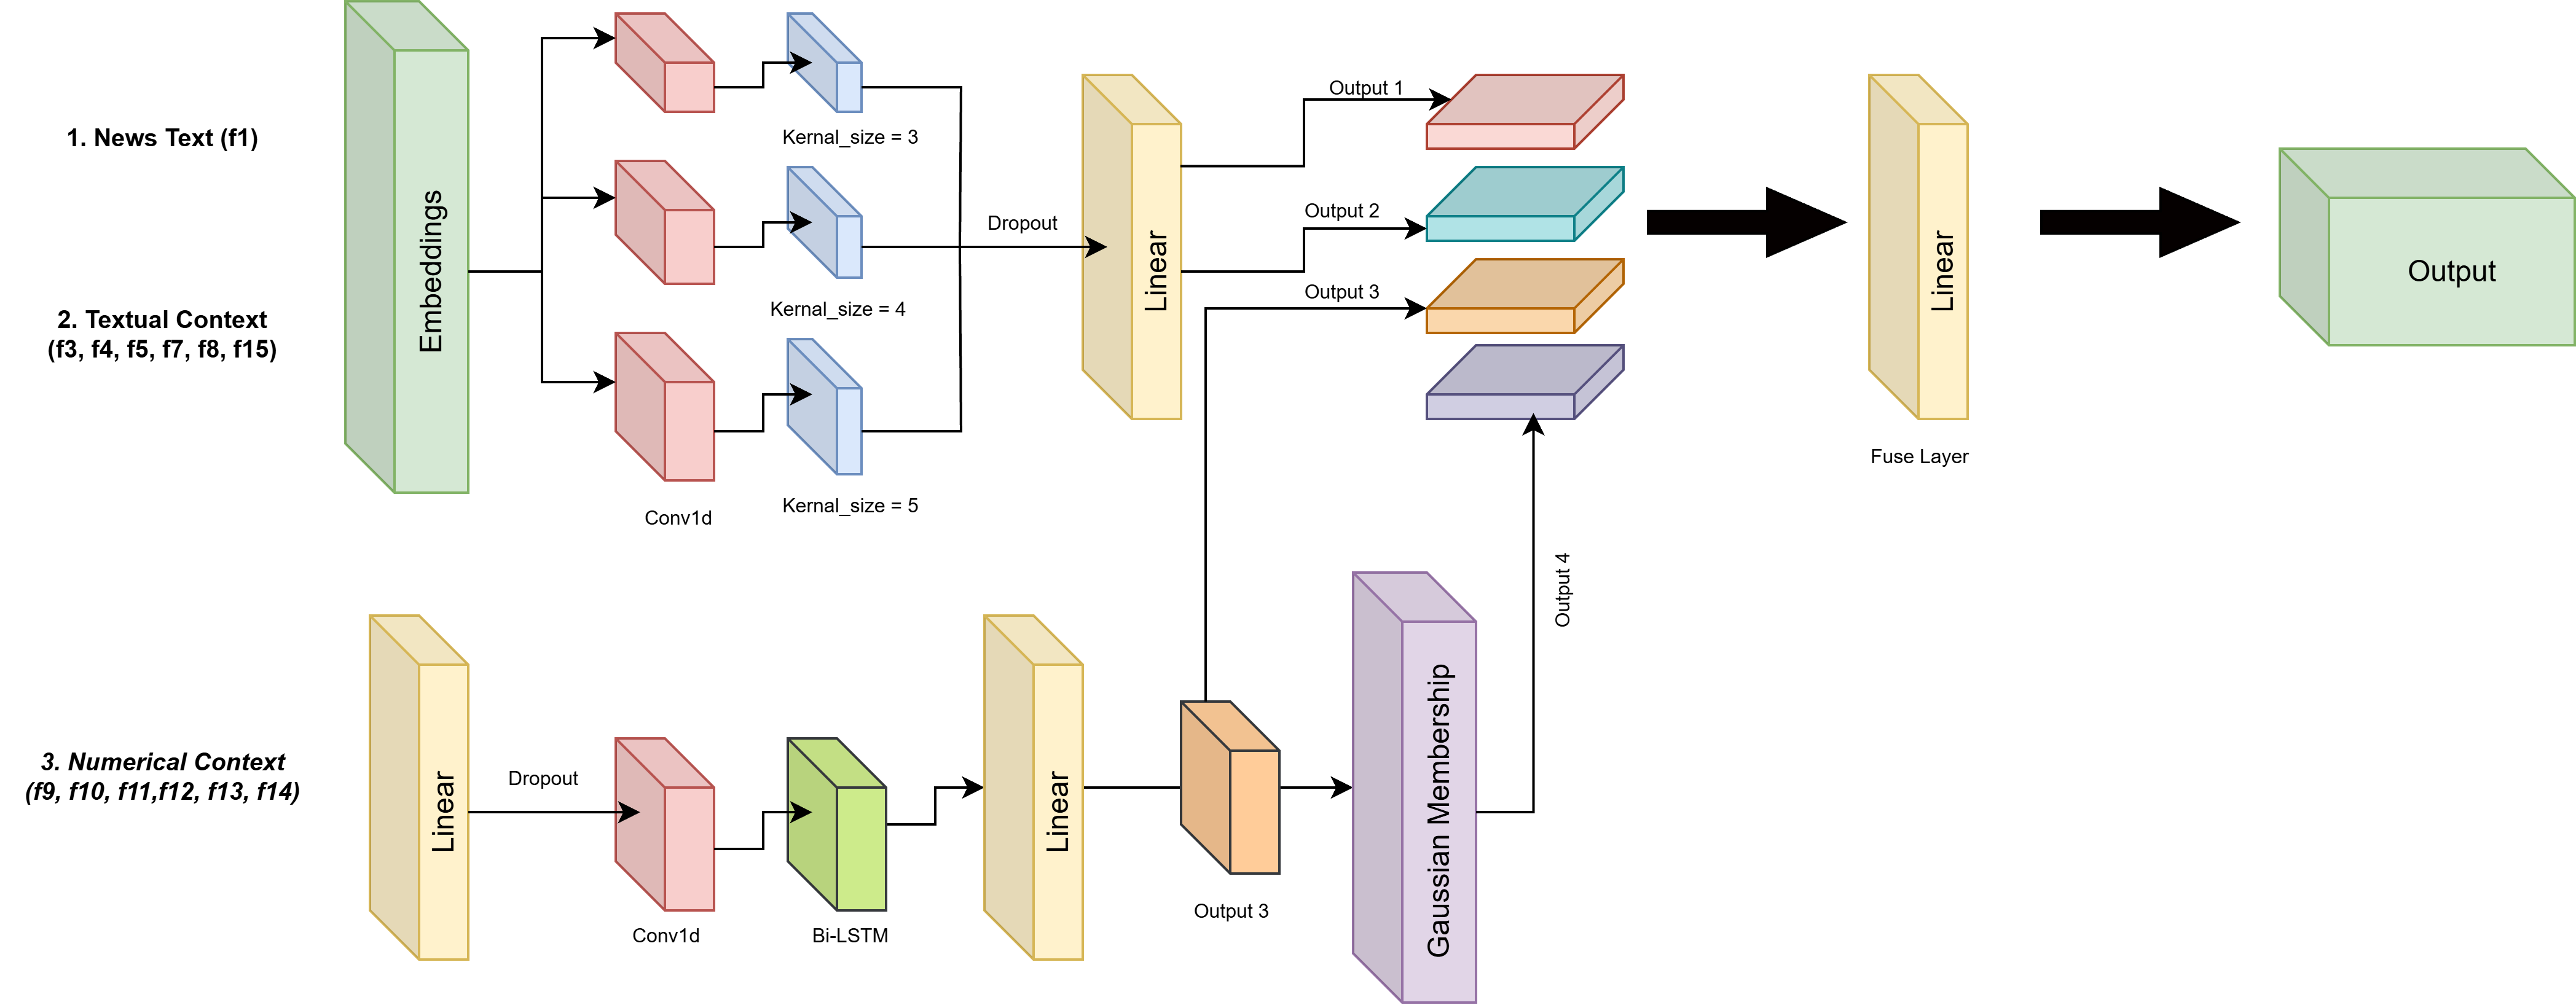

In [ ]:
# splitting the data between integer and object datatype
numeric_cols = df_train_balanced.select_dtypes(include=['int64']).columns
text_context_cols = ['date','subject','speaker','speaker_description','state_info','context']

In [ ]:
print(numeric_cols)
print(text_context_cols)

Index(['label', 'true_counts', 'mostly_true_counts', 'half_true_counts',
       'mostly_false_counts', 'false_counts', 'pants_on_fire_counts'],
      dtype='object')
['date', 'subject', 'speaker', 'speaker_description', 'state_info', 'context']


## Preparing data for training FDHN models

In [ ]:
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from collections import Counter
import re


# Build vocabularies for news and context text (simple tokenization).
# We create a single shared vocabulary for simplicity.

"""Simple tokenise function that matches words using \w+, splits them(tokenise it) and lowercase it."""
def tokenize(text):
    # basic whitespace/token regex tokenizer
    return re.findall(r"\w+", text.lower())

# Build vocabulary from both news and context
"""counter is used to store the values in {word:frequency} format.
concatenate newt_text and textual context by column
tokenise the text
update the counter with text
creating a vocab dictionary starting with most frequent words keeing 0 and 1 for special case"""
counter = Counter()
for text in pd.concat([df_train_balanced['statement'], df_train_balanced[text_context_cols].astype(str).agg(' '.join, axis=1)]):
    tokens = tokenize(text)
    counter.update(tokens)
# Reserve indices: 0 = PAD, 1 = UNK
vocab = {word: i+2 for i, (word, _) in enumerate(counter.most_common())}
vocab['<PAD>'] = 0
vocab['<UNK>'] = 1

# Function to convert text to padded index sequence
def text_to_sequence(text, max_len):
    tokens = tokenize(text)
    seq = [vocab.get(tok, 1) for tok in tokens]  # 1 if not found
    # Pad or truncate
    if len(seq) < max_len:
        seq += [0]*(max_len - len(seq))
    else:
        seq = seq[:max_len]
    return seq

# Define sequence lengths
MAX_LEN_NEWS = 100
MAX_LEN_CONTEXT = 100

# Prepare dataset arrays
news_seqs = [text_to_sequence(t, MAX_LEN_NEWS) for t in df_train_balanced['statement']]
ctx_seqs  = [text_to_sequence(t, MAX_LEN_CONTEXT) for t in df_train_balanced[text_context_cols].astype(str).agg(' '.join, axis=1)]

# Select only the numerical count columns for the NumericContext module
numeric_features_names = ['true_counts', 'mostly_true_counts', 'half_true_counts',
                          'mostly_false_counts', 'false_counts', 'pants_on_fire_counts']
numeric_data = df_train_balanced[numeric_features_names].values.astype(float)

labels = df_train_balanced['label'].values

# Convert to tensors
news_seqs = torch.tensor(news_seqs, dtype=torch.long)
ctx_seqs  = torch.tensor(ctx_seqs, dtype=torch.long)
numeric_data = torch.tensor(numeric_data, dtype=torch.float32)
labels = torch.tensor(labels, dtype=torch.long)

# Create a PyTorch Dataset and DataLoader
"""__init__ stores the tensors for news sequences, context sequences, numeric features, and labels.
__len__ Returns the total number of samples. Required for PyTorch to know the dataset size.
__getitem__ Returns the idx-th sample as a tuple: (news_seq, context_seq, numeric_features, label).This is what your DataLoader will fetch in each iteration.

batch_size=32 → Each iteration will return 32 samples.
shuffle=True → Randomizes the order of samples each epoch.
loader is now iterable in a training loop:"""

class FakeNewsDataset(Dataset):
    def __init__(self, news, context, numeric, labels):
        self.news = news
        self.context = context
        self.numeric = numeric
        self.labels = labels
    def __len__(self): return len(self.labels)
    def __getitem__(self, idx):
        return self.news[idx], self.context[idx], self.numeric[idx], self.labels[idx]

dataset = FakeNewsDataset(news_seqs, ctx_seqs, numeric_data, labels)
loader = DataLoader(dataset, batch_size=32, shuffle=True)

print("Values in counter are given below")
print(counter)
print("*"*60)
print("Vocab is given below")
print(vocab)
print("*"*60)
print("news_seqs is given below")
print(news_seqs)
print("*"*60)
print("ctx_seqs is given below")
print(ctx_seqs)
print("*"*60)

Values in counter are given below
Counter({'the': 51324, 'a': 36667, 'in': 30994, 'of': 27926, 'and': 26828, 'to': 18322, 'is': 17238, 'he': 15996, 'from': 12850, 'for': 12661, 'was': 12476, 'on': 10074, 'as': 8646, 'president': 7930, 'facebook': 7505, 'us': 6531, 'an': 6511, 'his': 5584, 'national': 5521, 'served': 5455, 'state': 5356, 'that': 4848, 'republican': 4735, 'elected': 4525, '2016': 4057, 'former': 4052, 'states': 3825, 'senate': 3778, 'says': 3764, 'law': 3674, '2012': 3673, 'house': 3611, 'has': 3553, 'university': 3504, 'governor': 3450, 'at': 3409, 'she': 3356, 'health': 3317, '2010': 3265, 'democratic': 3261, 'obama': 3224, 'texas': 3166, 'post': 3152, 'wisconsin': 3148, 'florida': 3124, 'senator': 3085, 'social': 3032, 'united': 2995, 'new': 2836, 'have': 2802, 'first': 2751, 'are': 2719, '2014': 2634, 'with': 2606, 'district': 2597, 'fact': 2495, 'campaign': 2492, 'november': 2489, 'checks': 2462, 'news': 2379, '2018': 2359, 'candidate': 2344, 'budget': 2315, 'school

## Text CNN

In [ ]:
# 2. Model Components
"""The TextCNN structure embeds words, applies multiple 2D convolutions with filter sizes 3, 4, and 5, uses ReLU and max-pooling for each,
concatenates pooled features, adds dropout, and projects to final features
"""
## 2a. TextCNN Module (for news text or context text):contentReference[oaicite:5]{index=5}
class TextCNN(nn.Module):
    def __init__(self, vocab_size, embed_dim=128, num_filters=128, filter_sizes=[3,4,5], output_dim=128):
        super(TextCNN, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=0)
        # Convolutional layers with different filter sizes (kernel heights 3,4,5)
        self.convs = nn.ModuleList([
            nn.Conv2d(in_channels=1, out_channels=num_filters,
                      kernel_size=(fs, embed_dim))
            for fs in filter_sizes
        ])
        # Final linear layer after concatenating pooled features
        self.fc = nn.Linear(num_filters * len(filter_sizes), output_dim)
        self.dropout = nn.Dropout(0.5)
    def forward(self, x):
        # x: (batch_size, seq_len)
        embedded = self.embedding(x)                   # (batch_size, seq_len, embed_dim)
        embedded = embedded.unsqueeze(1)              # (batch_size, 1, seq_len, embed_dim)
        # Apply each convolution + ReLU + max-pool
        conv_outs = []
        for conv in self.convs:
            c = F.relu(conv(embedded)).squeeze(3)     # (batch_size, num_filters, L_out)
            # Max-over-time pooling
            pooled = F.max_pool1d(c, kernel_size=c.shape[2]).squeeze(2)  # (batch_size, num_filters)
            conv_outs.append(pooled)
        cat = torch.cat(conv_outs, dim=1)            # (batch_size, num_filters * len(filter_sizes))
        features = self.dropout(cat)
        return self.fc(features)                     # (batch_size, output_dim)



## CNN + Bi LSTM

In [ ]:
"""The Numeric Context Module first embeds numeric input with a linear layer, applies 1D CNN to extract local patterns,
then Bi-LSTM models sequential dependencies, concatenates hidden states, and outputs a learned feature vector.
"""

## 2b. Numerical Context Module (CNN + Bi-LSTM):contentReference[oaicite:6]{index=6}
class NumericContext(nn.Module):
    def __init__(self, input_dim, linear_dim=64, cnn_channels=32, lstm_hidden=64, output_dim=128):
        super(NumericContext, self).__init__()
        # First a linear layer (with dropout) to embed numeric features
        self.linear1 = nn.Linear(input_dim, linear_dim)
        self.dropout1 = nn.Dropout(0.5)
        # 1D CNN over the numeric features (treated as a sequence of length=input_dim)
        self.conv = nn.Conv1d(in_channels=1, out_channels=cnn_channels, kernel_size=1)
        # Bi-LSTM layer
        self.bilstm = nn.LSTM(input_size=cnn_channels, hidden_size=lstm_hidden,
                              num_layers=1, bidirectional=True, batch_first=True)
        self.dropout2 = nn.Dropout(0.5)
        # Final linear to produce the feature vector
        self.linear2 = nn.Linear(2 * lstm_hidden, output_dim)
    def forward(self, x):
        # x: (batch_size, num_features)
        x = F.relu(self.linear1(x))                  # (batch_size, linear_dim)
        x = self.dropout1(x)
        # Prepare for CNN: (batch, 1, seq_len)
        x = x.unsqueeze(1)                           # (batch_size, 1, linear_dim)
        x = F.relu(self.conv(x))                     # (batch_size, cnn_channels, linear_dim)
        # Prepare for LSTM: (batch, seq_len, features)
        x = x.permute(0, 2, 1)                       # (batch_size, linear_dim, cnn_channels)
        # Bi-LSTM (returns output and (h_n, c_n))
        out, (h_n, c_n) = self.bilstm(x)             # h_n: (2, batch_size, lstm_hidden)
        # Concatenate final forward and backward hidden states
        h_forward = h_n[0]                           # (batch_size, lstm_hidden)
        h_backward = h_n[1]                          # (batch_size, lstm_hidden)
        h_cat = torch.cat((h_forward, h_backward), dim=1)  # (batch_size, 2*lstm_hidden)
        h_cat = self.dropout2(h_cat)
        return self.linear2(h_cat)                   # (batch_size, output_dim)



##  Gaussian Fuzzy Layer

In [ ]:
"""The FuzzyLayer learns Gaussian membership parameters (mean and spread) for each class and feature, then computes per-class membership scores for each input by
aggregating Gaussian outputs, modeling uncertainty across truth categories.
"""

## 2c. Fuzzy Layer (Gaussian membership)
class FuzzyLayer(nn.Module):
    def __init__(self, feature_dim, num_classes=6):
        super(FuzzyLayer, self).__init__()
        # Initialize parameters µ (centers) and σ (spreads) for each class and feature
        self.mu = nn.Parameter(torch.zeros(num_classes, feature_dim))
        self.sigma = nn.Parameter(torch.ones(num_classes, feature_dim))
    def forward(self, x):
        # x: (batch_size, feature_dim)
        batch_size = x.size(0)
        # Expand tensors to (batch, num_classes, feature_dim)
        x_exp = x.unsqueeze(1).expand(-1, self.mu.size(0), -1)
        mu_exp = self.mu.unsqueeze(0).expand(batch_size, -1, -1)
        sig_exp = F.relu(self.sigma.unsqueeze(0)).expand(batch_size, -1, -1)  # ensure sigma>0
        # Gaussian membership µ_G(x; m, σ) = exp(-0.5 * ((x - m)/σ)^2)
        diff = (x_exp - mu_exp) / (sig_exp + 1e-8) # Added epsilon for numerical stability
        membership = torch.exp(-0.5 * diff.pow(2))
        # Aggregate membership across features (mean across feature_dim)
        fuzzy_out = membership.mean(dim=2)        # (batch_size, num_classes)
        return fuzzy_out

## FDHN

In [ ]:
"""The FDHN model processes input through four parallel channels: two TextCNNs for news and contextual text, a NumericContext CNN+Bi-LSTM for numerical features,
and a fuzzy layer modeling uncertainty on numeric outputs. Their outputs are concatenated and passed through a final linear layer for multi-class classification into six
truthfulness categories.
"""

## 2d. FDHN Model (combining all components)
class FDHN(nn.Module):
    def __init__(self, vocab_size, num_numeric, embed_dim=128, num_classes=6): # Added num_classes
        super(FDHN, self).__init__()
        # News text channel
        self.news_cnn = TextCNN(vocab_size, embed_dim=embed_dim, num_filters=128,
                                filter_sizes=[3,4,5], output_dim=128)
        # Textual context channel
        self.ctx_cnn  = TextCNN(vocab_size, embed_dim=embed_dim, num_filters=128,
                                filter_sizes=[3,4,5], output_dim=128)
        # Numerical context channel
        self.num_ctx  = NumericContext(input_dim=num_numeric, linear_dim=64,
                                       cnn_channels=32, lstm_hidden=64, output_dim=128)
        # Fuzzy layer on numeric output (6 classes)
        self.fuzzy    = FuzzyLayer(feature_dim=128, num_classes=num_classes) # Updated num_classes
        # Final output layer: concatenated features to class scores
        total_features = 128 + 128 + 128 + num_classes   # news + context + numeric + fuzzy outputs
        self.fc_final = nn.Linear(total_features, num_classes) # Updated num_classes
    def forward(self, news, context, numeric):
        # Each sub-module processes its input
        out_news = self.news_cnn(news)       # (batch, 128)
        out_ctx  = self.ctx_cnn(context)     # (batch, 128)
        out_num  = self.num_ctx(numeric)     # (batch, 128)
        out_fuz  = self.fuzzy(out_num)       # (batch, 6) (membership for each class)
        # Concatenate all feature vectors
        combined = torch.cat([out_news, out_ctx, out_num, out_fuz], dim=1)  # (batch, 128+128+128+6 = 390)
        logits = self.fc_final(combined)      # (batch, 6)
        return logits

In [ ]:
# Instantiate the model
vocab_size = len(vocab)
num_numeric = numeric_data.shape[1]
model1 = FDHN(vocab_size=vocab_size, num_numeric=num_numeric, embed_dim=128, num_classes=6)

# 3. Training Setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model1.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model1.parameters(), lr=1e-3)

## Training

In [ ]:
# 4. Training Loop
from sklearn.metrics import f1_score
import time

# Store training history
history_model1 = {'loss': [], 'accuracy': [], 'f1_macro': [], 'f1_micro': []}

for epoch in range(20):  # short training for demonstration
    start_time = time.time()  # Start time of the epoch
    model1.train()
    total_loss = 0.0
    total_correct = 0
    total_count = 0
    all_preds = []
    all_labels = []

    for batch_news, batch_ctx, batch_num, batch_labels in loader:
        batch_news = batch_news.to(device)
        batch_ctx  = batch_ctx.to(device)
        batch_num  = batch_num.to(device)
        batch_labels = batch_labels.to(device)
        # Forward pass
        logits = model1(batch_news, batch_ctx, batch_num)
        loss = criterion(logits, batch_labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * batch_labels.size(0)
        preds = logits.argmax(dim=1)
        total_correct += (preds == batch_labels).sum().item()
        total_count += batch_labels.size(0)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(batch_labels.cpu().numpy())

    avg_loss = total_loss / total_count
    acc = total_correct / total_count
    f1_macro = f1_score(all_labels, all_preds, average='macro')
    f1_micro = f1_score(all_labels, all_preds, average='micro') # Calculate F1-micro

    end_time = time.time()  # End time of the epoch
    epoch_time = end_time - start_time

    # Store metrics
    history_model1['loss'].append(avg_loss)
    history_model1['accuracy'].append(acc)
    history_model1['f1_macro'].append(f1_macro)
    history_model1['f1_micro'].append(f1_micro)


    print(f"Epoch {epoch+1}: Loss={avg_loss:.4f}, Accuracy={acc:.4f}, F1-macro={f1_macro:.4f}, F1-micro={f1_micro:.4f}, Epoch Time={epoch_time:.2f}s")

Epoch 1: Loss=1.6225, Accuracy=0.3189, F1-macro=0.3159, F1-micro=0.3189, Epoch Time=4.68s
Epoch 2: Loss=1.4210, Accuracy=0.4140, F1-macro=0.4142, F1-micro=0.4140, Epoch Time=4.66s
Epoch 3: Loss=1.3354, Accuracy=0.4519, F1-macro=0.4527, F1-micro=0.4519, Epoch Time=4.78s
Epoch 4: Loss=1.2333, Accuracy=0.5027, F1-macro=0.5043, F1-micro=0.5027, Epoch Time=4.68s
Epoch 5: Loss=1.1256, Accuracy=0.5490, F1-macro=0.5512, F1-micro=0.5490, Epoch Time=4.64s
Epoch 6: Loss=1.0052, Accuracy=0.6048, F1-macro=0.6064, F1-micro=0.6048, Epoch Time=4.67s
Epoch 7: Loss=0.8665, Accuracy=0.6703, F1-macro=0.6724, F1-micro=0.6703, Epoch Time=4.62s
Epoch 8: Loss=0.7310, Accuracy=0.7222, F1-macro=0.7236, F1-micro=0.7222, Epoch Time=4.64s
Epoch 9: Loss=0.6088, Accuracy=0.7726, F1-macro=0.7745, F1-micro=0.7726, Epoch Time=4.64s
Epoch 10: Loss=0.5169, Accuracy=0.8072, F1-macro=0.8085, F1-micro=0.8072, Epoch Time=4.63s
Epoch 11: Loss=0.4312, Accuracy=0.8435, F1-macro=0.8445, F1-micro=0.8435, Epoch Time=4.70s
Epoch 12

## Testing

In [ ]:
df_test.fillna('',inplace=True)
# Convert test text data to sequences using the same vocabulary and max lengths
test_news_seqs = [text_to_sequence(t, MAX_LEN_NEWS) for t in df_test['statement']]
test_ctx_seqs  = [text_to_sequence(t, MAX_LEN_CONTEXT) for t in df_test[text_context_cols].astype(str).agg(' '.join, axis=1)]

test_numeric_data = df_test[numeric_features_names].values.astype(float)

# Get test labels
test_labels = df_test['label'].values

# Convert test data to tensors
test_news_seqs = torch.tensor(test_news_seqs, dtype=torch.long)
test_ctx_seqs  = torch.tensor(test_ctx_seqs, dtype=torch.long)
test_numeric_data = torch.tensor(test_numeric_data, dtype=torch.float32) # Use original data
test_labels = torch.tensor(test_labels, dtype=torch.long)

# Create Test Dataset and DataLoader
test_dataset = FakeNewsDataset(test_news_seqs, test_ctx_seqs, test_numeric_data, test_labels) # Use original data
test_loader = DataLoader(test_dataset, batch_size=32) # Use the same batch size as training

# Evaluate the model on the test set
model1.eval()
total_correct_test_model1 = 0
total_count_test_model1 = 0
all_preds_test = []
all_labels_test = []

with torch.no_grad():
    for batch_news, batch_ctx, batch_num, batch_labels in test_loader:
        batch_news = batch_news.to(device)
        batch_ctx  = batch_ctx.to(device)
        batch_num  = batch_num.to(device)
        batch_labels = batch_labels.to(device)

        logits = model1(batch_news, batch_ctx, batch_num)
        preds = logits.argmax(dim=1)
        total_correct_test_model1 += (preds == batch_labels).sum().item()
        total_count_test_model1 += batch_labels.size(0)

        all_preds_test.extend(preds.cpu().numpy())
        all_labels_test.extend(batch_labels.cpu().numpy())


test_accuracy_model1 = total_correct_test_model1 / total_count_test_model1
test_f1_macro_model1 = f1_score(all_labels_test, all_preds_test, average='macro')
test_f1_micro_model1 = f1_score(all_labels_test, all_preds_test, average='micro')


print(f"Test Accuracy: {test_accuracy_model1:.4f}")
print(f"Test F1-macro: {test_f1_macro_model1:.4f}")
print(f"Test F1-micro: {test_f1_micro_model1:.4f}")

Test Accuracy: 0.4125
Test F1-macro: 0.4079
Test F1-micro: 0.4125


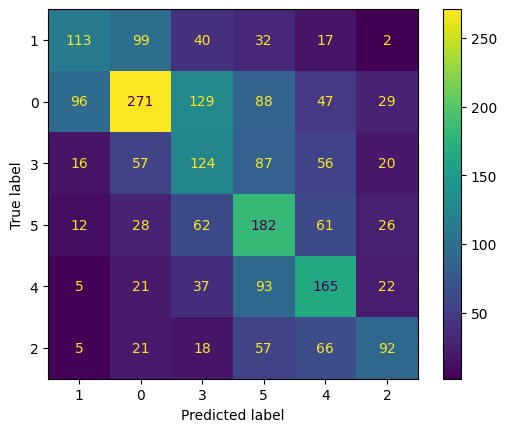

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_model1_test = confusion_matrix(all_labels_test, all_preds_test)
disp_model1_test = ConfusionMatrixDisplay(confusion_matrix=cm_model1_test, display_labels=df_test['label'].unique())
print(disp_model1_test.plot())

## Validation

In [ ]:
df_validation.fillna('',inplace=True)
# Convert validation text data to sequences using the same vocabulary and max lengths
validation_news_seqs = [text_to_sequence(t, MAX_LEN_NEWS) for t in df_validation['statement']]
validation_ctx_seqs  = [text_to_sequence(t, MAX_LEN_CONTEXT) for t in df_validation[text_context_cols].astype(str).agg(' '.join, axis=1)]

# Select numerical features for validation data
validation_numeric_data = df_validation[numeric_features_names].values.astype(float)


# Get validation labels
validation_labels = df_validation['label'].values

# Convert validation data to tensors
validation_news_seqs = torch.tensor(validation_news_seqs, dtype=torch.long)
validation_ctx_seqs  = torch.tensor(validation_ctx_seqs, dtype=torch.long)
validation_numeric_data = torch.tensor(validation_numeric_data, dtype=torch.float32) # Use scaled data
validation_labels = torch.tensor(validation_labels, dtype=torch.long)

# Create Validation Dataset and DataLoader
validation_dataset = FakeNewsDataset(validation_news_seqs, validation_ctx_seqs, validation_numeric_data, validation_labels) # Use scaled data
validation_loader = DataLoader(validation_dataset, batch_size=32) # Use the same batch size as training

# Evaluate the model on the validation set
model1.eval()
total_correct_validation_model1 = 0
total_count_validation_model1 = 0
all_preds_validation = []
all_labels_validation = []
with torch.no_grad():
    for batch_news, batch_ctx, batch_num, batch_labels in validation_loader:
        batch_news = batch_news.to(device)
        batch_ctx  = batch_ctx.to(device)
        batch_num  = batch_num.to(device)
        batch_labels = batch_labels.to(device)

        logits = model1(batch_news, batch_ctx, batch_num)
        preds = logits.argmax(dim=1)
        total_correct_validation_model1 += (preds == batch_labels).sum().item()
        total_count_validation_model1 += batch_labels.size(0)

        all_preds_validation.extend(preds.cpu().numpy())
        all_labels_validation.extend(batch_labels.cpu().numpy())

validation_accuracy_model1 = total_correct_validation_model1 / total_count_validation_model1
validation_f1_macro_model1 = f1_score(all_labels_validation, all_preds_validation, average='macro')
validation_f1_micro_model1 = f1_score(all_labels_validation, all_preds_validation, average='micro')

print(f"Validation Accuracy: {validation_accuracy_model1:.4f}")
print(f"Validation F1-macro: {validation_f1_macro_model1:.4f}")
print(f"Validation F1-micro: {validation_f1_micro_model1:.4f}")

Validation Accuracy: 0.4253
Validation F1-macro: 0.4218
Validation F1-micro: 0.4253


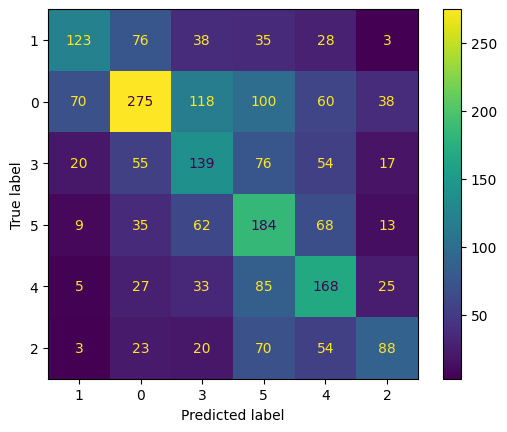

In [ ]:
cm_model1_validation = confusion_matrix(all_labels_validation, all_preds_validation)
disp_model1_validation = ConfusionMatrixDisplay(confusion_matrix=cm_model1_validation, display_labels=df_test['label'].unique())
print(disp_model1_validation.plot())

# Triangular Membership Function

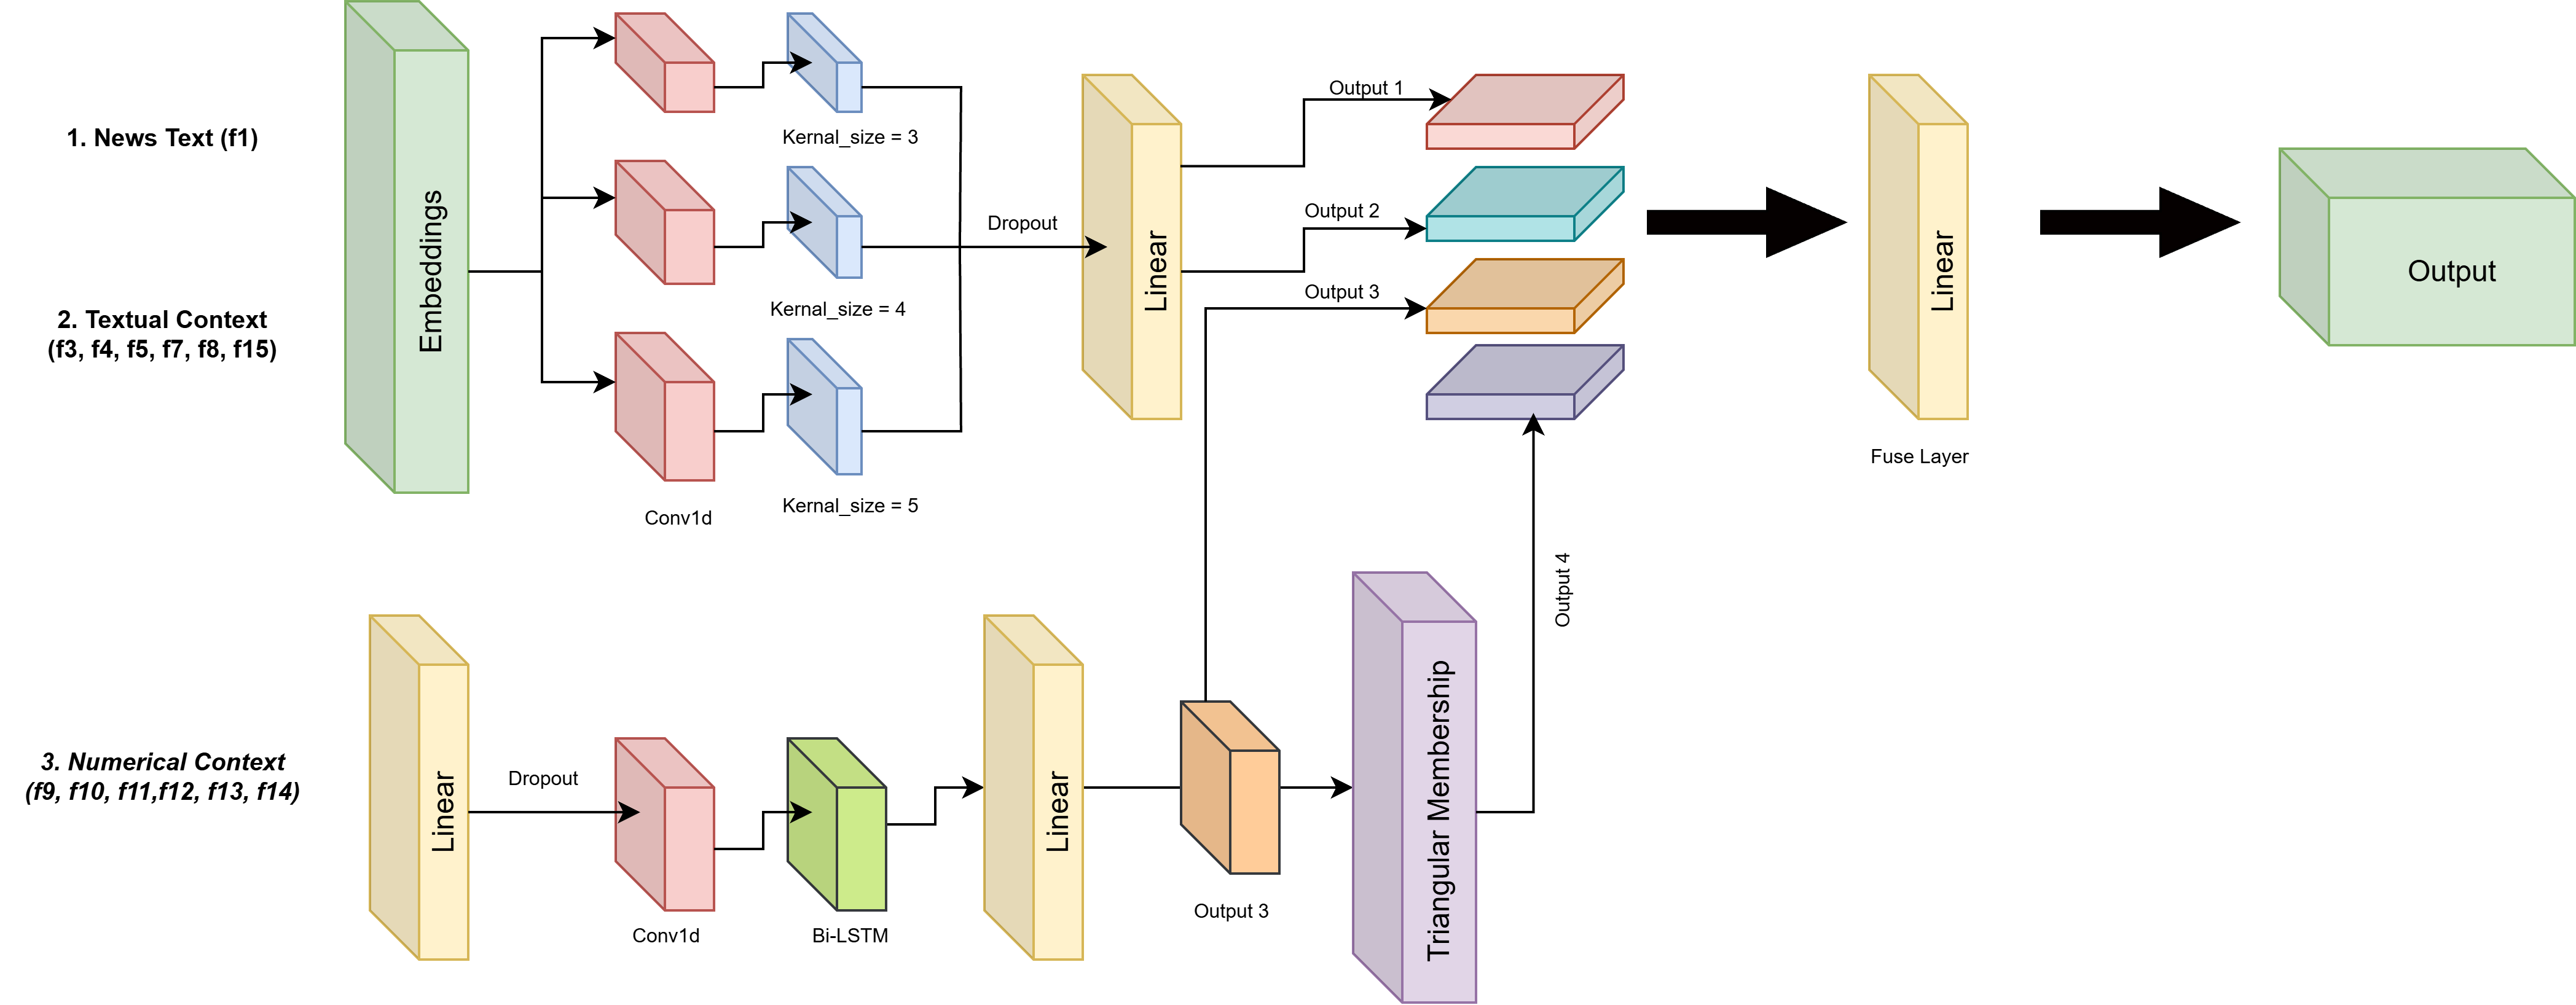

In [ ]:
"""The TriangularFuzzyLayer implements fuzzy membership using a trainable triangular function per feature-class pair defined by parameters (a, b, c).
For each input, it computes the membership as the max of zero and the minimum between linear ramps rising from a to b and falling from b to c,
then averages memberships over features to yield per-class fuzzy scores. This models uncertainty with efficient, interpretable geometric shapes.
"""
class TriangularFuzzyLayer(nn.Module):
    """
    Triangular membership layer: each class j, feature i has params (a,b,c).
    µ_ji(x) = max(min((x-a)/(b-a), (c-x)/(c-b)), 0); output is average over features.
    """
    def __init__(self, in_features, num_classes):
        super().__init__()
        # Initialize trainable parameters a, b, c (shape: [features, classes])
        self.a = nn.Parameter(torch.randn(in_features, num_classes))
        self.b = nn.Parameter(torch.randn(in_features, num_classes))
        self.c = nn.Parameter(torch.randn(in_features, num_classes))

    def forward(self, x):
        # x: (batch, features)
        x_expand = x.unsqueeze(2)  # (batch, features, 1)
        a = self.a.unsqueeze(0)    # (1, features, classes)
        b = self.b.unsqueeze(0)
        c = self.c.unsqueeze(0)
        # Compute linear ramps
        mu1 = (x_expand - a) / (b - a)
        mu2 = (c - x_expand) / (c - b)
        mu = torch.min(mu1, mu2)
        # Clamp to [0,1] and average over features
        mu = torch.clamp(mu, 0.0, 1.0)
        mu = mu.mean(dim=1)  # (batch, classes)
        return mu


In [ ]:
"""The FDHN model integrates four components: two TextCNN modules for news and context text feature extraction, a NumericContext module combining CNN and Bi-LSTM for
numeric speaker history, and a TriangularFuzzyLayer that converts numeric features into fuzzy class memberships. Outputs are concatenated and fed to a final linear layer predicting
one of six truthfulness classes, effectively combining textual, contextual, numerical, and uncertainty information into a unified fake news detection architecture.
"""

## 2d. FDHN Model (combining all components)
class FDHN(nn.Module):
    def __init__(self, vocab_size, num_numeric, embed_dim=128, num_classes=6): # Added num_classes
        super(FDHN, self).__init__()
        # News text channel
        self.news_cnn = TextCNN(vocab_size, embed_dim=embed_dim, num_filters=128,
                                filter_sizes=[3,4,5], output_dim=128)
        # Textual context channel
        self.ctx_cnn  = TextCNN(vocab_size, embed_dim=embed_dim, num_filters=128,
                                filter_sizes=[3,4,5], output_dim=128)
        # Numerical context channel
        self.num_ctx  = NumericContext(input_dim=num_numeric, linear_dim=64,
                                       cnn_channels=32, lstm_hidden=64, output_dim=128)
        # Fuzzy layer on numeric output (6 classes)
        self.fuzzy    = TriangularFuzzyLayer(in_features=128, num_classes=num_classes) # Updated num_classes
        # Final output layer: concatenated features to class scores
        total_features = 128 + 128 + 128 + num_classes   # news + context + numeric + fuzzy outputs
        self.fc_final = nn.Linear(total_features, num_classes) # Updated num_classes
    def forward(self, news, context, numeric):
        # Each sub-module processes its input
        out_news = self.news_cnn(news)       # (batch, 128)
        out_ctx  = self.ctx_cnn(context)     # (batch, 128)
        out_num  = self.num_ctx(numeric)     # (batch, 128)
        out_fuz  = self.fuzzy(out_num)       # (batch, 6) (membership for each class)
        # Concatenate all feature vectors
        combined = torch.cat([out_news, out_ctx, out_num, out_fuz], dim=1)  # (batch, 128+128+128+6 = 390)
        logits = self.fc_final(combined)      # (batch, 6)
        return logits

In [ ]:
# Instantiate the model
vocab_size = len(vocab)
num_numeric = numeric_data.shape[1]
model2 = FDHN(vocab_size=vocab_size, num_numeric=num_numeric, embed_dim=128, num_classes=6)

# 3. Training Setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model2.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model2.parameters(), lr=1e-3)

## Training

In [ ]:
# 4. Training Loop
from sklearn.metrics import f1_score
import time

# Store training history
history_model2 = {'loss': [], 'accuracy': [], 'f1_macro': [], 'f1_micro': []}


for epoch in range(20):  # short training for demonstration
    start_time = time.time()  # Start time of the epoch
    model2.train()
    total_loss = 0.0
    total_correct = 0
    total_count = 0
    all_preds = []
    all_labels = []

    for batch_news, batch_ctx, batch_num, batch_labels in loader:
        batch_news = batch_news.to(device)
        batch_ctx  = batch_ctx.to(device)
        batch_num  = batch_num.to(device)
        batch_labels = batch_labels.to(device)
        # Forward pass
        logits = model2(batch_news, batch_ctx, batch_num)
        loss = criterion(logits, batch_labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * batch_labels.size(0)
        preds = logits.argmax(dim=1)
        total_correct += (preds == batch_labels).sum().item()
        total_count += batch_labels.size(0)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(batch_labels.cpu().numpy())

    avg_loss = total_loss / total_count
    acc = total_correct / total_count
    f1_macro = f1_score(all_labels, all_preds, average='macro')
    f1_micro = f1_score(all_labels, all_preds, average='micro') # Calculate F1-micro

    end_time = time.time()  # End time of the epoch
    epoch_time = end_time - start_time

    # Store metrics
    history_model2['loss'].append(avg_loss)
    history_model2['accuracy'].append(acc)
    history_model2['f1_macro'].append(f1_macro)
    history_model2['f1_micro'].append(f1_micro)


    print(f"Epoch {epoch+1}: Loss={avg_loss:.4f}, Accuracy={acc:.4f}, F1-macro={f1_macro:.4f}, F1-micro={f1_micro:.4f}, Epoch Time={epoch_time:.2f}s")

Epoch 1: Loss=1.6205, Accuracy=0.3148, F1-macro=0.3116, F1-micro=0.3148, Epoch Time=4.79s
Epoch 2: Loss=1.4450, Accuracy=0.4043, F1-macro=0.4021, F1-micro=0.4043, Epoch Time=4.77s
Epoch 3: Loss=1.3368, Accuracy=0.4511, F1-macro=0.4523, F1-micro=0.4511, Epoch Time=4.74s
Epoch 4: Loss=1.2475, Accuracy=0.4897, F1-macro=0.4902, F1-micro=0.4897, Epoch Time=4.83s
Epoch 5: Loss=1.1527, Accuracy=0.5378, F1-macro=0.5389, F1-micro=0.5378, Epoch Time=4.72s
Epoch 6: Loss=1.0320, Accuracy=0.5862, F1-macro=0.5875, F1-micro=0.5862, Epoch Time=4.80s
Epoch 7: Loss=0.8876, Accuracy=0.6463, F1-macro=0.6479, F1-micro=0.6463, Epoch Time=4.74s
Epoch 8: Loss=0.7778, Accuracy=0.6997, F1-macro=0.7007, F1-micro=0.6997, Epoch Time=4.76s
Epoch 9: Loss=0.6472, Accuracy=0.7524, F1-macro=0.7535, F1-micro=0.7524, Epoch Time=4.77s
Epoch 10: Loss=0.5399, Accuracy=0.7929, F1-macro=0.7936, F1-micro=0.7929, Epoch Time=4.72s
Epoch 11: Loss=0.4719, Accuracy=0.8274, F1-macro=0.8280, F1-micro=0.8274, Epoch Time=4.77s
Epoch 12

## Testing

In [ ]:
df_test.fillna('',inplace=True)
# Convert test text data to sequences using the same vocabulary and max lengths
test_news_seqs = [text_to_sequence(t, MAX_LEN_NEWS) for t in df_test['statement']]
test_ctx_seqs  = [text_to_sequence(t, MAX_LEN_CONTEXT) for t in df_test[text_context_cols].astype(str).agg(' '.join, axis=1)]

# Select numerical features for test data
test_numeric_data = df_test[numeric_features_names].values.astype(float)

# Get test labels
test_labels = df_test['label'].values

# Convert test data to tensors
test_news_seqs = torch.tensor(test_news_seqs, dtype=torch.long)
test_ctx_seqs  = torch.tensor(test_ctx_seqs, dtype=torch.long)
test_numeric_data = torch.tensor(test_numeric_data, dtype=torch.float32)
test_labels = torch.tensor(test_labels, dtype=torch.long)

# Create Test Dataset and DataLoader
test_dataset = FakeNewsDataset(test_news_seqs, test_ctx_seqs, test_numeric_data, test_labels)
test_loader = DataLoader(test_dataset, batch_size=32) # Use the same batch size as training

# Evaluate the model on the test set
model2.eval()
total_correct_test_model2 = 0
total_count_test_model2 = 0
all_preds_test = []
all_labels_test = []
with torch.no_grad():
    for batch_news, batch_ctx, batch_num, batch_labels in test_loader:
        batch_news = batch_news.to(device)
        batch_ctx  = batch_ctx.to(device)
        batch_num  = batch_num.to(device)
        batch_labels = batch_labels.to(device)

        logits = model2(batch_news, batch_ctx, batch_num)
        preds = logits.argmax(dim=1)
        total_correct_test_model2 += (preds == batch_labels).sum().item()
        total_count_test_model2 += batch_labels.size(0)

        all_preds_test.extend(preds.cpu().numpy())
        all_labels_test.extend(batch_labels.cpu().numpy())

test_accuracy_model2 = total_correct_test_model2 / total_count_test_model2
test_f1_macro_model2 = f1_score(all_labels_test, all_preds_test, average='macro')
test_f1_micro_model2 = f1_score(all_labels_test, all_preds_test, average='micro')
print(f"Test Accuracy: {test_accuracy_model2:.4f}")
print(f"Test F1-macro: {test_f1_macro_model2:.4f}")
print(f"Test F1-micro: {test_f1_micro_model2:.4f}")

Test Accuracy: 0.4172
Test F1-macro: 0.4165
Test F1-micro: 0.4172


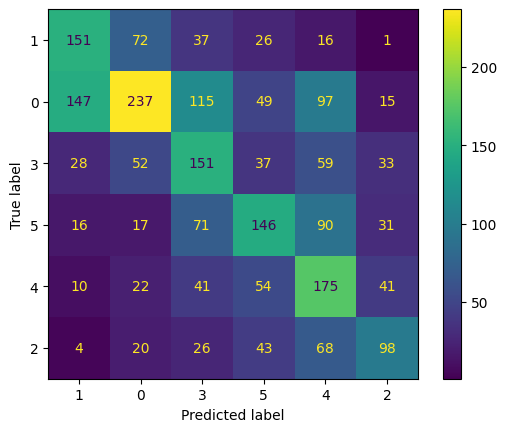

In [ ]:
cm_model2_test = confusion_matrix(all_labels_test, all_preds_test)
disp_model2_test = ConfusionMatrixDisplay(confusion_matrix=cm_model2_test, display_labels=df_test['label'].unique())
print(disp_model2_test.plot())

## Validation

In [ ]:
df_validation.fillna('',inplace=True)
validation_news_seqs = [text_to_sequence(t, MAX_LEN_NEWS) for t in df_validation['statement']]
validation_ctx_seqs  = [text_to_sequence(t, MAX_LEN_CONTEXT) for t in df_validation[text_context_cols].astype(str).agg(' '.join, axis=1)]

# Select numerical features for validation data
validation_numeric_data = df_validation[numeric_features_names].values.astype(float)

# Get validation labels
validation_labels = df_validation['label'].values

# Convert validation data to tensors
validation_news_seqs = torch.tensor(validation_news_seqs, dtype=torch.long)
validation_ctx_seqs  = torch.tensor(validation_ctx_seqs, dtype=torch.long)
validation_numeric_data = torch.tensor(validation_numeric_data, dtype=torch.float32)
validation_labels = torch.tensor(validation_labels, dtype=torch.long)

# Create Validation Dataset and DataLoader
validation_dataset = FakeNewsDataset(validation_news_seqs, validation_ctx_seqs, validation_numeric_data, validation_labels)
validation_loader = DataLoader(validation_dataset, batch_size=32) # Use the same batch size as training

# Evaluate the model on the validation set
model2.eval()
total_correct_validation_model2 = 0
total_count_validation_model2 = 0
all_preds_validation = []
all_labels_validation = []
with torch.no_grad():
    for batch_news, batch_ctx, batch_num, batch_labels in validation_loader:
        batch_news = batch_news.to(device)
        batch_ctx  = batch_ctx.to(device)
        batch_num  = batch_num.to(device)
        batch_labels = batch_labels.to(device)

        logits = model2(batch_news, batch_ctx, batch_num)
        preds = logits.argmax(dim=1)
        total_correct_validation_model2 += (preds == batch_labels).sum().item()
        total_count_validation_model2 += batch_labels.size(0)

        all_preds_validation.extend(preds.cpu().numpy())
        all_labels_validation.extend(batch_labels.cpu().numpy())

validation_accuracy_model2 = total_correct_validation_model2 / total_count_validation_model2
validation_f1_macro_model2 = f1_score(all_labels_validation, all_preds_validation, average='macro')
validation_f1_micro_model2 = f1_score(all_labels_validation, all_preds_validation, average='micro')
print(f"Validation Accuracy: {validation_accuracy_model2:.4f}")
print(f"Validation F1-macro: {validation_f1_macro_model2:.4f}")
print(f"Validation F1-micro: {validation_f1_micro_model2:.4f}")

Validation Accuracy: 0.4131
Validation F1-macro: 0.4139
Validation F1-micro: 0.4131


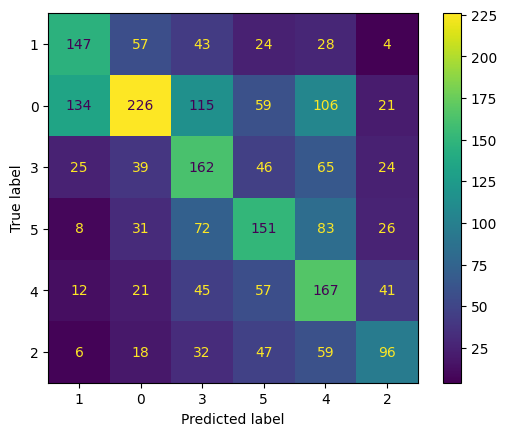

In [ ]:
cm_model2_validation = confusion_matrix(all_labels_validation, all_preds_validation)
disp_model2_validation = ConfusionMatrixDisplay(confusion_matrix=cm_model2_validation, display_labels=df_test['label'].unique())
print(disp_model2_validation.plot())

# Trapezoidal Membership Function

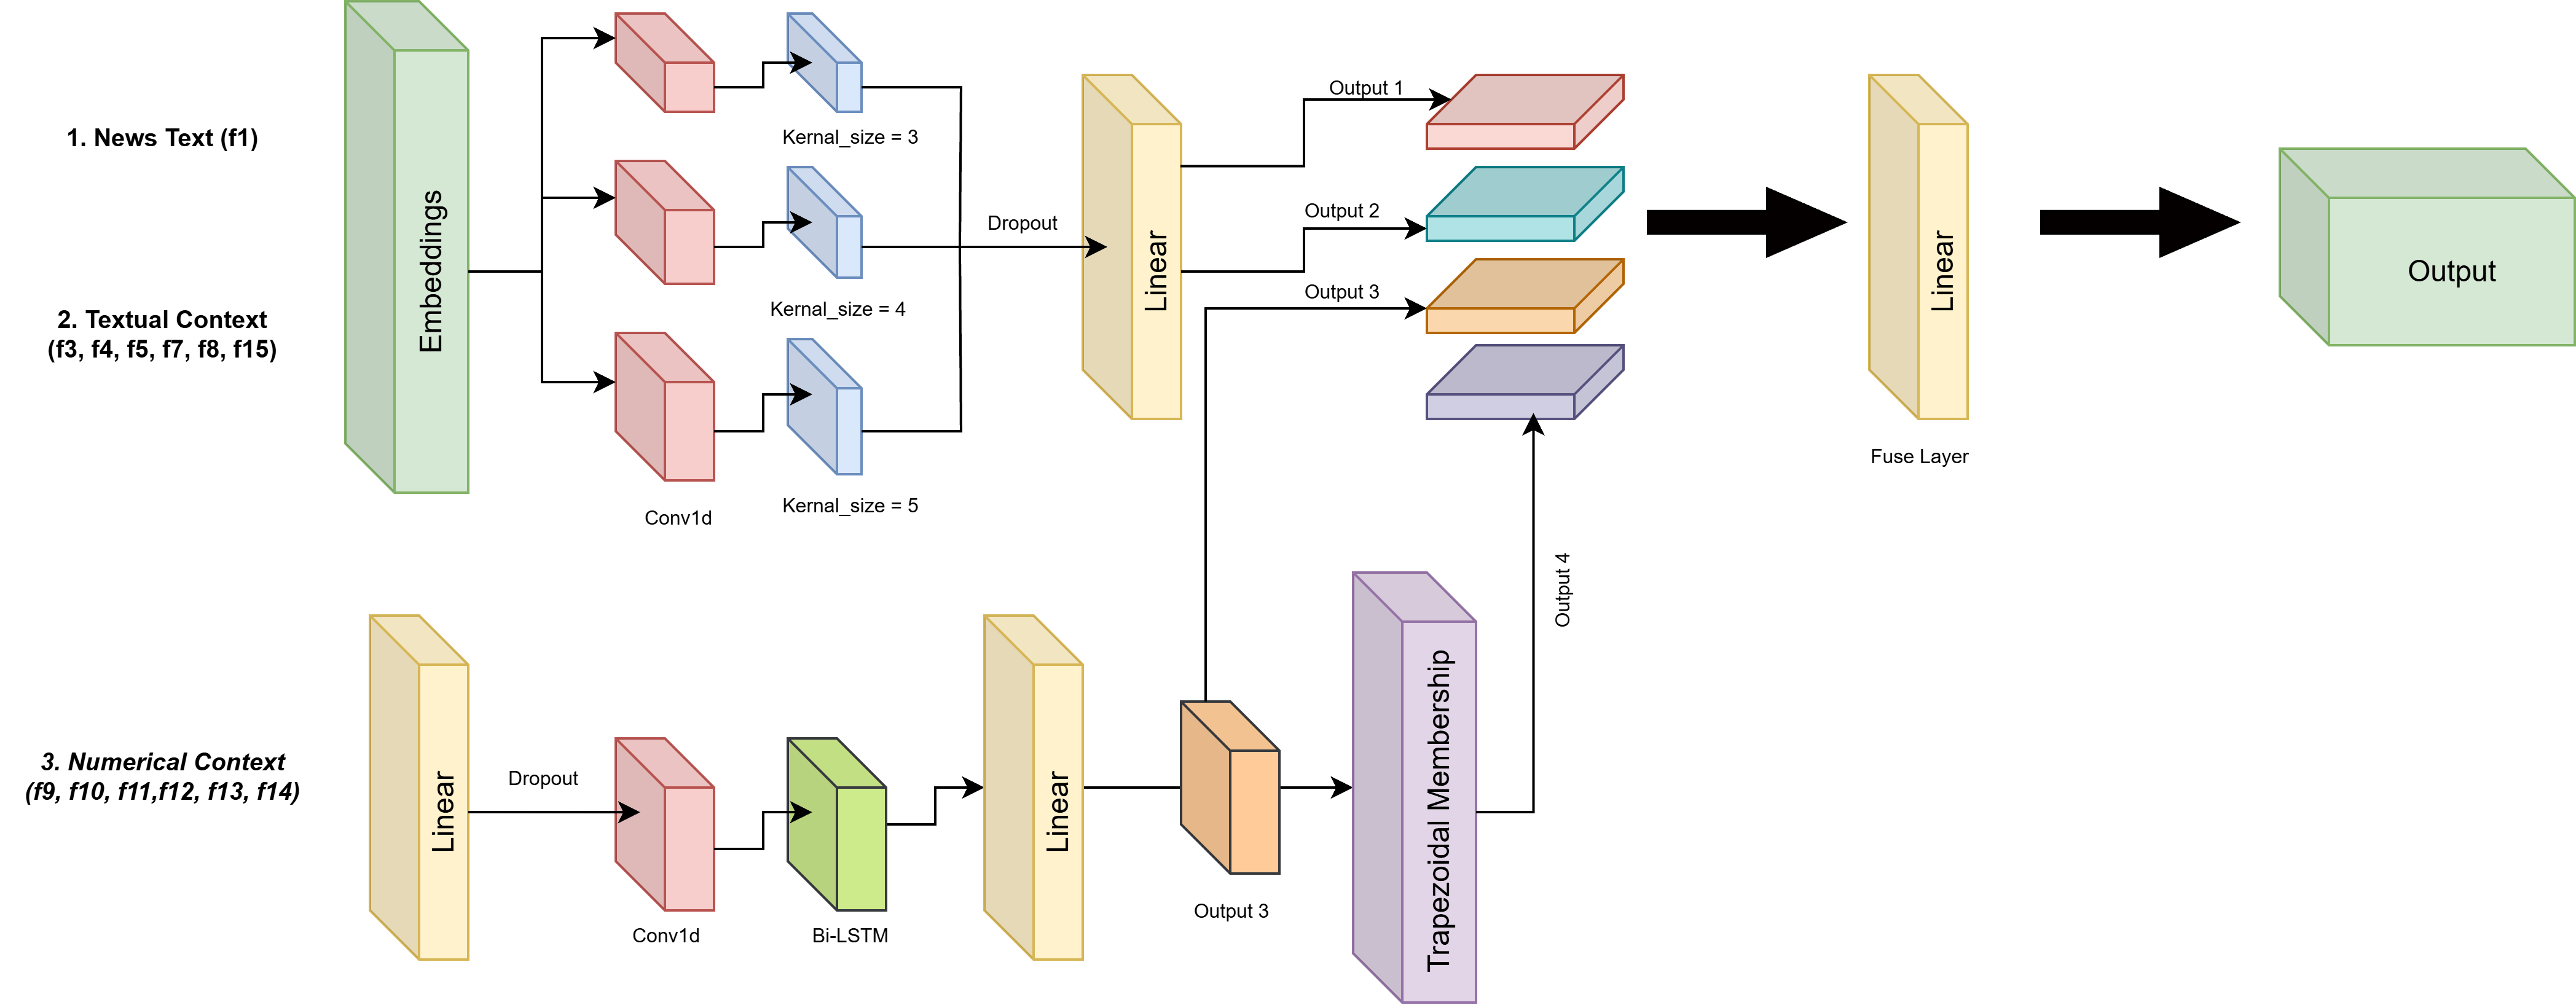

In [ ]:
"""The TrapezoidalFuzzyLayer models fuzzy membership with parameters (a, b, c, d) per class-feature, forming rising, flat, and falling segments.
Inputs are mapped to membership values by linearly rising from a to b, plateauing at 1 from b to c, falling from c to d, clamping results between 0 and 1,
then averaging over features to yield fuzzy class scores, enabling smooth uncertainty modeling.
"""

class TrapezoidalFuzzyLayer(nn.Module):
    """
    Trapezoidal membership layer: params (a,b,c,d) per class-feature.
    Rises (x-a)/(b-a), stays 1, falls (d-x)/(d-c), clamped to [0,1], then averaged.
    """
    def __init__(self, in_features, num_classes):
        super().__init__()
        # Raw params; enforce ordering via positive offsets
        self.a = nn.Parameter(torch.randn(in_features, num_classes))
        self.b_offset = nn.Parameter(torch.randn(in_features, num_classes))
        self.c_offset = nn.Parameter(torch.randn(in_features, num_classes))
        self.d_offset = nn.Parameter(torch.randn(in_features, num_classes))
        self.softplus = nn.Softplus()

    def forward(self, x):
        x_expand = x.unsqueeze(2)  # (batch, features, 1)
        # Broadcast parameters
        a = self.a.unsqueeze(0)    # (1, features, classes)
        # Ensure ordering: b>=a, c>=b, d>=c
        b = a + self.softplus(self.b_offset).unsqueeze(0)
        c = b + self.softplus(self.c_offset).unsqueeze(0)
        d = c + self.softplus(self.d_offset).unsqueeze(0)
        # Rising and falling segments
        mu_rise = (x_expand - a) / (b - a)
        mu_fall = (d - x_expand) / (d - c)
        # Clamp to [0,1]
        mu_rise = torch.clamp(mu_rise, 0.0, 1.0)
        mu_fall = torch.clamp(mu_fall, 0.0, 1.0)
        # Membership is min(rise, fall)
        mu = torch.min(mu_rise, mu_fall)
        mu = mu.mean(dim=1)  # (batch, classes)
        return mu

In [ ]:
"""The FDHN model combines multiple data channels for fake news detection: two TextCNN modules extract linguistic features from news and context text;
the NumericContext module leverages CNN and Bi-LSTM to learn speaker numeric histories; and the TrapezoidalFuzzyLayer transforms numeric features
into fuzzy memberships modeling uncertainty. The concatenated outputs feed a final linear layer that predicts one of six truthfulness classes, uniting text,
context, numeric data, and fuzzy logic for robust classification.
"""

## 2d. FDHN Model (combining all components)
class FDHN(nn.Module):
    def __init__(self, vocab_size, num_numeric, embed_dim=128, num_classes=6): # Added num_classes
        super(FDHN, self).__init__()
        # News text channel
        self.news_cnn = TextCNN(vocab_size, embed_dim=embed_dim, num_filters=128,
                                filter_sizes=[3,4,5], output_dim=128)
        # Textual context channel
        self.ctx_cnn  = TextCNN(vocab_size, embed_dim=embed_dim, num_filters=128,
                                filter_sizes=[3,4,5], output_dim=128)
        # Numerical context channel
        self.num_ctx  = NumericContext(input_dim=num_numeric, linear_dim=64,
                                       cnn_channels=32, lstm_hidden=64, output_dim=128)
        # Fuzzy layer on numeric output (6 classes)
        self.fuzzy  = TrapezoidalFuzzyLayer(in_features=128, num_classes=num_classes) # Updated num_classes
        # Final output layer: concatenated features to class scores
        total_features = 128 + 128 + 128 + num_classes   # news + context + numeric + fuzzy outputs
        self.fc_final = nn.Linear(total_features, num_classes) # Updated num_classes
    def forward(self, news, context, numeric):
        # Each sub-module processes its input
        out_news = self.news_cnn(news)       # (batch, 128)
        out_ctx  = self.ctx_cnn(context)     # (batch, 128)
        out_num  = self.num_ctx(numeric)     # (batch, 128)
        out_fuz  = self.fuzzy(out_num)       # (batch, 6) (membership for each class)
        # Concatenate all feature vectors
        combined = torch.cat([out_news, out_ctx, out_num, out_fuz], dim=1)  # (batch, 128+128+128+6 = 390)
        logits = self.fc_final(combined)      # (batch, 6)
        return logits

In [ ]:
# Instantiate the model
vocab_size = len(vocab)
num_numeric = numeric_data.shape[1]
model3 = FDHN(vocab_size=vocab_size, num_numeric=num_numeric, embed_dim=128, num_classes=6)

# 3. Training Setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model3.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model3.parameters(), lr=1e-3)

## Training

In [ ]:
# 4. Training Loop
from sklearn.metrics import f1_score
import time

# Store training history
history_model3 = {'loss': [], 'accuracy': [], 'f1_macro': [], 'f1_micro': []}

for epoch in range(20):  # short training for demonstration
    start_time = time.time()  # Start time of the epoch
    model3.train()
    total_loss = 0.0
    total_correct = 0
    total_count = 0
    all_preds = []
    all_labels = []

    for batch_news, batch_ctx, batch_num, batch_labels in loader:
        batch_news = batch_news.to(device)
        batch_ctx  = batch_ctx.to(device)
        batch_num  = batch_num.to(device)
        batch_labels = batch_labels.to(device)
        # Forward pass
        logits = model3(batch_news, batch_ctx, batch_num)
        loss = criterion(logits, batch_labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * batch_labels.size(0)
        preds = logits.argmax(dim=1)
        total_correct += (preds == batch_labels).sum().item()
        total_count += batch_labels.size(0)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(batch_labels.cpu().numpy())

    avg_loss = total_loss / total_count
    acc = total_correct / total_count
    f1_macro = f1_score(all_labels, all_preds, average='macro')
    f1_micro = f1_score(all_labels, all_preds, average='micro') # Calculate F1-micro

    end_time = time.time()  # End time of the epoch
    epoch_time = end_time - start_time

    # Store metrics
    history_model3['loss'].append(avg_loss)
    history_model3['accuracy'].append(acc)
    history_model3['f1_macro'].append(f1_macro)
    history_model3['f1_micro'].append(f1_micro)

    print(f"Epoch {epoch+1}: Loss={avg_loss:.4f}, Accuracy={acc:.4f}, F1-macro={f1_macro:.4f}, F1-micro={f1_micro:.4f}, Epoch Time={epoch_time:.2f}s")

Epoch 1: Loss=1.6338, Accuracy=0.3054, F1-macro=0.2990, F1-micro=0.3054, Epoch Time=4.99s
Epoch 2: Loss=1.4353, Accuracy=0.4027, F1-macro=0.4009, F1-micro=0.4027, Epoch Time=4.92s
Epoch 3: Loss=1.3478, Accuracy=0.4540, F1-macro=0.4548, F1-micro=0.4540, Epoch Time=4.93s
Epoch 4: Loss=1.2603, Accuracy=0.4925, F1-macro=0.4939, F1-micro=0.4925, Epoch Time=4.95s
Epoch 5: Loss=1.1542, Accuracy=0.5391, F1-macro=0.5411, F1-micro=0.5391, Epoch Time=4.89s
Epoch 6: Loss=1.0156, Accuracy=0.5996, F1-macro=0.6018, F1-micro=0.5996, Epoch Time=4.95s
Epoch 7: Loss=0.8912, Accuracy=0.6566, F1-macro=0.6586, F1-micro=0.6566, Epoch Time=4.90s
Epoch 8: Loss=0.7497, Accuracy=0.7166, F1-macro=0.7193, F1-micro=0.7166, Epoch Time=4.93s
Epoch 9: Loss=0.6308, Accuracy=0.7595, F1-macro=0.7614, F1-micro=0.7595, Epoch Time=5.02s
Epoch 10: Loss=0.5245, Accuracy=0.8088, F1-macro=0.8106, F1-micro=0.8088, Epoch Time=4.88s
Epoch 11: Loss=0.4351, Accuracy=0.8402, F1-macro=0.8418, F1-micro=0.8402, Epoch Time=4.96s
Epoch 12

## Testing

In [ ]:
df_test.fillna('',inplace=True)
# Convert test text data to sequences using the same vocabulary and max lengths
test_news_seqs = [text_to_sequence(t, MAX_LEN_NEWS) for t in df_test['statement']]
test_ctx_seqs  = [text_to_sequence(t, MAX_LEN_CONTEXT) for t in df_test[text_context_cols].astype(str).agg(' '.join, axis=1)]

# Select numerical features for test data
test_numeric_data = df_test[numeric_features_names].values.astype(float)

# Get test labels
test_labels = df_test['label'].values

# Convert test data to tensors
test_news_seqs = torch.tensor(test_news_seqs, dtype=torch.long)
test_ctx_seqs  = torch.tensor(test_ctx_seqs, dtype=torch.long)
test_numeric_data = torch.tensor(test_numeric_data, dtype=torch.float32)
test_labels = torch.tensor(test_labels, dtype=torch.long)

# Create Test Dataset and DataLoader
test_dataset = FakeNewsDataset(test_news_seqs, test_ctx_seqs, test_numeric_data, test_labels)
test_loader = DataLoader(test_dataset, batch_size=32) # Use the same batch size as training

# Evaluate the model on the test set
model3.eval()
total_correct_test_model3 = 0
total_count_test_model3 = 0
all_preds_test = []
all_labels_test = []
with torch.no_grad():
    for batch_news, batch_ctx, batch_num, batch_labels in test_loader:
        batch_news = batch_news.to(device)
        batch_ctx  = batch_ctx.to(device)
        batch_num  = batch_num.to(device)
        batch_labels = batch_labels.to(device)

        logits = model3(batch_news, batch_ctx, batch_num)
        preds = logits.argmax(dim=1)
        total_correct_test_model3 += (preds == batch_labels).sum().item()
        total_count_test_model3 += batch_labels.size(0)

        all_preds_test.extend(preds.cpu().numpy())
        all_labels_test.extend(batch_labels.cpu().numpy())

test_accuracy_model3 = total_correct_test_model3 / total_count_test_model3
test_f1_macro_model3 = f1_score(all_labels_test, all_preds_test, average='macro')
test_f1_micro_model3 = f1_score(all_labels_test, all_preds_test, average='micro')
print(f"Test Accuracy: {test_accuracy_model3:.4f}")
print(f"Test F1-macro: {test_f1_macro_model3:.4f}")
print(f"Test F1-micro: {test_f1_micro_model3:.4f}")

Test Accuracy: 0.3907
Test F1-macro: 0.3899
Test F1-micro: 0.3907


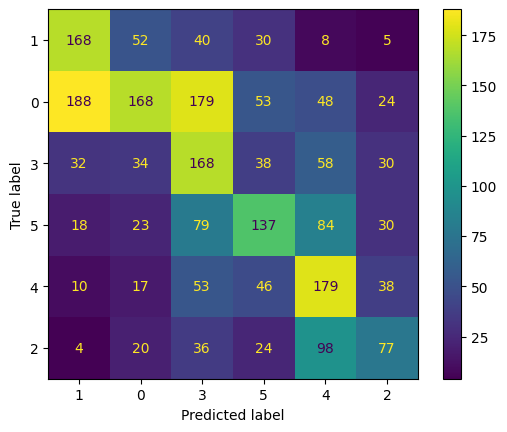

In [ ]:
cm_model3_test = confusion_matrix(all_labels_test, all_preds_test)
disp_model3_test = ConfusionMatrixDisplay(confusion_matrix=cm_model3_test, display_labels=df_test['label'].unique())
print(disp_model3_test.plot())

## Validation

In [ ]:
df_validation.fillna('',inplace=True)
validation_news_seqs = [text_to_sequence(t, MAX_LEN_NEWS) for t in df_validation['statement']]
validation_ctx_seqs  = [text_to_sequence(t, MAX_LEN_CONTEXT) for t in df_validation[text_context_cols].astype(str).agg(' '.join, axis=1)]

# Select numerical features for validation data
validation_numeric_data = df_validation[numeric_features_names].values.astype(float)

# Get validation labels
validation_labels = df_validation['label'].values

# Convert validation data to tensors
validation_news_seqs = torch.tensor(validation_news_seqs, dtype=torch.long)
validation_ctx_seqs  = torch.tensor(validation_ctx_seqs, dtype=torch.long)
validation_numeric_data = torch.tensor(validation_numeric_data, dtype=torch.float32)
validation_labels = torch.tensor(validation_labels, dtype=torch.long)

# Create Validation Dataset and DataLoader
validation_dataset = FakeNewsDataset(validation_news_seqs, validation_ctx_seqs, validation_numeric_data, validation_labels)
validation_loader = DataLoader(validation_dataset, batch_size=32) # Use the same batch size as training

# Evaluate the model on the validation set
model3.eval()
total_correct_validation_model3 = 0
total_count_validation_model3 = 0
all_preds_validation = []
all_labels_validation = []
with torch.no_grad():
    for batch_news, batch_ctx, batch_num, batch_labels in validation_loader:
        batch_news = batch_news.to(device)
        batch_ctx  = batch_ctx.to(device)
        batch_num  = batch_num.to(device)
        batch_labels = batch_labels.to(device)

        logits = model3(batch_news, batch_ctx, batch_num)
        preds = logits.argmax(dim=1)
        total_correct_validation_model3 += (preds == batch_labels).sum().item()
        total_count_validation_model3 += batch_labels.size(0)

        all_preds_validation.extend(preds.cpu().numpy())
        all_labels_validation.extend(batch_labels.cpu().numpy())

validation_accuracy_model3 = total_correct_validation_model3 / total_count_validation_model3
validation_f1_macro_model3 = f1_score(all_labels_validation, all_preds_validation, average='macro')
validation_f1_micro_model3 = f1_score(all_labels_validation, all_preds_validation, average='micro')
print(f"Validation Accuracy: {validation_accuracy_model3:.4f}")
print(f"Validation F1-macro: {validation_f1_macro_model3:.4f}")
print(f"Validation F1-micro: {validation_f1_micro_model3:.4f}")

Validation Accuracy: 0.3722
Validation F1-macro: 0.3721
Validation F1-micro: 0.3722


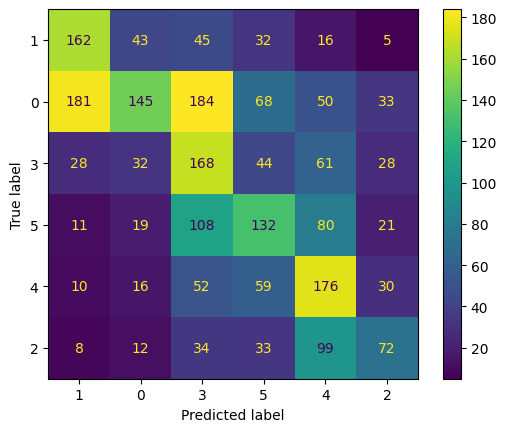

In [ ]:
cm_model3_validation = confusion_matrix(all_labels_validation, all_preds_validation)
disp_model3_validation = ConfusionMatrixDisplay(confusion_matrix=cm_model3_validation, display_labels=df_test['label'].unique())
print(disp_model3_validation.plot())

# Sigmoid‑Based Fuzzy Membership

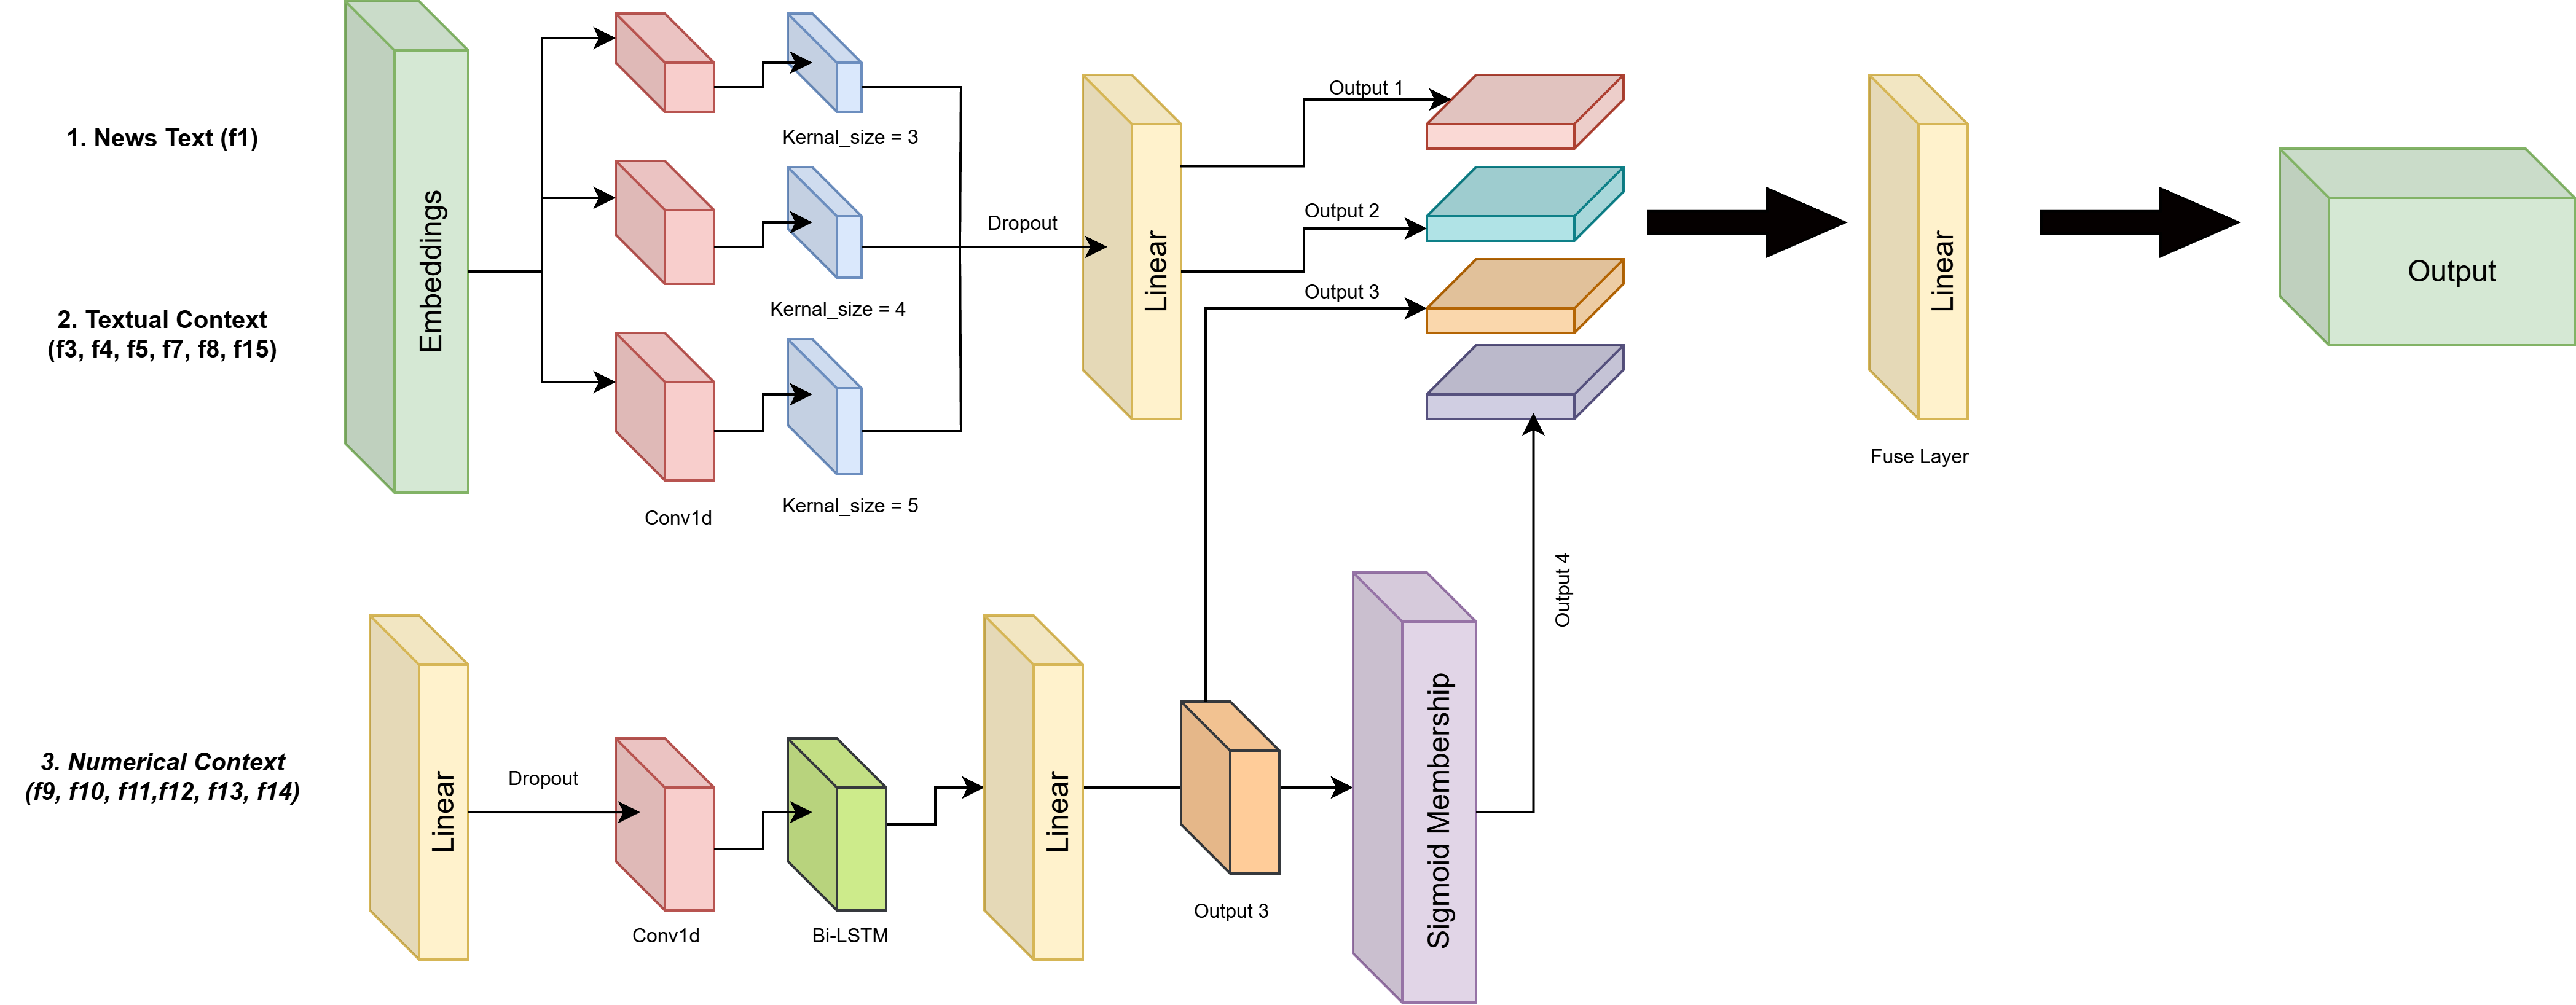

In [ ]:
"""The DoubleSigmoidFuzzyLayer models fuzzy membership using two sigmoids per class-feature, defined by parameters a, b, alpha, and beta.
The membership is computed as sigmoid(alpha * (x - a)) multiplied by sigmoid(beta * (b - x)), representing a smooth fuzzy window with soft boundaries.
The output is averaged over features, yielding fuzzy class memberships that capture gradual uncertainty transitions.
"""

class DoubleSigmoidFuzzyLayer(nn.Module):
    """
    Sigmoid-based fuzzy layer (double-sigmoid): for each class-feature with params a,b,alpha,beta,
    µ(x) = σ(alpha*(x - a)) * σ(beta*(b - x)), then averaged over features.
    """
    def __init__(self, in_features, num_classes):
        super().__init__()
        # Parameters: a (left cut), b_offset, alpha, beta
        self.a = nn.Parameter(torch.randn(in_features, num_classes))
        self.b_offset = nn.Parameter(torch.randn(in_features, num_classes))
        self.alpha = nn.Parameter(torch.randn(in_features, num_classes))
        self.beta = nn.Parameter(torch.randn(in_features, num_classes))
        self.softplus = nn.Softplus()

    def forward(self, x):
        x_expand = x.unsqueeze(2)  # (batch, features, 1)
        a = self.a.unsqueeze(0)
        # Ensure b > a via softplus
        b = a + self.softplus(self.b_offset).unsqueeze(0)
        alpha = torch.abs(self.alpha.unsqueeze(0))
        beta = torch.abs(self.beta.unsqueeze(0))
        left = torch.sigmoid(alpha * (x_expand - a))
        right = torch.sigmoid(beta * (b - x_expand))
        mu = left * right
        mu = mu.mean(dim=1)  # (batch, classes)
        return mu

In [ ]:
"""The FDHN model fuses four learned signals end-to-end: TextCNN encoders extract 128‑dimensional features from news text and contextual text separately;
a NumericContext branch embeds numeric speaker history via a linear layer, 1D CNN, and Bi‑LSTM into 128 dimensions; a DoubleSigmoidFuzzy layer converts
that numeric embedding into per‑class fuzzy memberships using a smooth two‑sigmoid window per class‑feature; all four outputs (news, context, numeric, fuzzy)
are concatenated and passed to a final linear classifier to predict the six Truth‑O‑Meter classes.
"""

## 2d. FDHN Model (combining all components)
class FDHN(nn.Module):
    def __init__(self, vocab_size, num_numeric, embed_dim=128, num_classes=6): # Added num_classes
        super(FDHN, self).__init__()
        # News text channel
        self.news_cnn = TextCNN(vocab_size, embed_dim=embed_dim, num_filters=128,
                                filter_sizes=[3,4,5], output_dim=128)
        # Textual context channel
        self.ctx_cnn  = TextCNN(vocab_size, embed_dim=embed_dim, num_filters=128,
                                filter_sizes=[3,4,5], output_dim=128)
        # Numerical context channel
        self.num_ctx  = NumericContext(input_dim=num_numeric, linear_dim=64,
                                       cnn_channels=32, lstm_hidden=64, output_dim=128)
        # Fuzzy layer on numeric output (6 classes)
        self.fuzzy  = DoubleSigmoidFuzzyLayer(in_features=128, num_classes=num_classes) # Updated num_classes
        # Final output layer: concatenated features to class scores
        total_features = 128 + 128 + 128 + num_classes   # news + context + numeric + fuzzy outputs
        self.fc_final = nn.Linear(total_features, num_classes) # Updated num_classes
    def forward(self, news, context, numeric):
        # Each sub-module processes its input
        out_news = self.news_cnn(news)       # (batch, 128)
        out_ctx  = self.ctx_cnn(context)     # (batch, 128)
        out_num  = self.num_ctx(numeric)     # (batch, 128)
        out_fuz  = self.fuzzy(out_num)       # (batch, 6) (membership for each class)
        # Concatenate all feature vectors
        combined = torch.cat([out_news, out_ctx, out_num, out_fuz], dim=1)  # (batch, 128+128+128+6 = 390)
        logits = self.fc_final(combined)      # (batch, 6)
        return logits

In [ ]:
# Instantiate the model
vocab_size = len(vocab)
num_numeric = numeric_data.shape[1]
model4 = FDHN(vocab_size=vocab_size, num_numeric=num_numeric, embed_dim=128, num_classes=6)

# 3. Training Setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model4.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model4.parameters(), lr=1e-3)

## Training

In [ ]:
# 4. Training Loop
from sklearn.metrics import f1_score
import time

# Store training history
history_model4 = {'loss': [], 'accuracy': [], 'f1_macro': [], 'f1_micro': []}


for epoch in range(20):  # short training for demonstration
    start_time = time.time()  # Start time of the epoch
    model4.train()
    total_loss = 0.0
    total_correct = 0
    total_count = 0
    all_preds = []
    all_labels = []

    for batch_news, batch_ctx, batch_num, batch_labels in loader:
        batch_news = batch_news.to(device)
        batch_ctx  = batch_ctx.to(device)
        batch_num  = batch_num.to(device)
        batch_labels = batch_labels.to(device)
        # Forward pass
        logits = model4(batch_news, batch_ctx, batch_num)
        loss = criterion(logits, batch_labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * batch_labels.size(0)
        preds = logits.argmax(dim=1)
        total_correct += (preds == batch_labels).sum().item()
        total_count += batch_labels.size(0)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(batch_labels.cpu().numpy())

    avg_loss = total_loss / total_count
    acc = total_correct / total_count
    f1_macro = f1_score(all_labels, all_preds, average='macro')
    f1_micro = f1_score(all_labels, all_preds, average='micro') # Calculate F1-micro

    end_time = time.time()  # End time of the epoch
    epoch_time = end_time - start_time

    # Store metrics
    history_model4['loss'].append(avg_loss)
    history_model4['accuracy'].append(acc)
    history_model4['f1_macro'].append(f1_macro)
    history_model4['f1_micro'].append(f1_micro)

    print(f"Epoch {epoch+1}: Loss={avg_loss:.4f}, Accuracy={acc:.4f}, F1-macro={f1_macro:.4f}, F1-micro={f1_micro:.4f}, Epoch Time={epoch_time:.2f}s")

Epoch 1: Loss=1.6623, Accuracy=0.2833, F1-macro=0.2799, F1-micro=0.2833, Epoch Time=4.78s
Epoch 2: Loss=1.4723, Accuracy=0.3919, F1-macro=0.3897, F1-micro=0.3919, Epoch Time=4.69s
Epoch 3: Loss=1.3709, Accuracy=0.4439, F1-macro=0.4447, F1-micro=0.4439, Epoch Time=4.79s
Epoch 4: Loss=1.2748, Accuracy=0.4896, F1-macro=0.4905, F1-micro=0.4896, Epoch Time=4.71s
Epoch 5: Loss=1.1598, Accuracy=0.5265, F1-macro=0.5282, F1-micro=0.5265, Epoch Time=4.74s
Epoch 6: Loss=1.0438, Accuracy=0.5849, F1-macro=0.5865, F1-micro=0.5849, Epoch Time=4.74s
Epoch 7: Loss=0.9011, Accuracy=0.6436, F1-macro=0.6447, F1-micro=0.6436, Epoch Time=4.72s
Epoch 8: Loss=0.7808, Accuracy=0.6969, F1-macro=0.6988, F1-micro=0.6969, Epoch Time=4.78s
Epoch 9: Loss=0.6545, Accuracy=0.7518, F1-macro=0.7534, F1-micro=0.7518, Epoch Time=4.71s
Epoch 10: Loss=0.5672, Accuracy=0.7872, F1-macro=0.7890, F1-micro=0.7872, Epoch Time=4.70s
Epoch 11: Loss=0.4599, Accuracy=0.8259, F1-macro=0.8275, F1-micro=0.8259, Epoch Time=4.76s
Epoch 12

## Testing

In [ ]:
df_test.fillna('',inplace=True)
# Convert test text data to sequences using the same vocabulary and max lengths
test_news_seqs = [text_to_sequence(t, MAX_LEN_NEWS) for t in df_test['statement']]
test_ctx_seqs  = [text_to_sequence(t, MAX_LEN_CONTEXT) for t in df_test[text_context_cols].astype(str).agg(' '.join, axis=1)]

# Select numerical features for test data
test_numeric_data = df_test[numeric_features_names].values.astype(float)

# Get test labels
test_labels = df_test['label'].values

# Convert test data to tensors
test_news_seqs = torch.tensor(test_news_seqs, dtype=torch.long)
test_ctx_seqs  = torch.tensor(test_ctx_seqs, dtype=torch.long)
test_numeric_data = torch.tensor(test_numeric_data, dtype=torch.float32)
test_labels = torch.tensor(test_labels, dtype=torch.long)

# Create Test Dataset and DataLoader
test_dataset = FakeNewsDataset(test_news_seqs, test_ctx_seqs, test_numeric_data, test_labels)
test_loader = DataLoader(test_dataset, batch_size=32) # Use the same batch size as training

# Evaluate the model on the test set
model4.eval()
total_correct_test_model4 = 0
total_count_test_model4 = 0
all_preds_test = []
all_labels_test = []
with torch.no_grad():
    for batch_news, batch_ctx, batch_num, batch_labels in test_loader:
        batch_news = batch_news.to(device)
        batch_ctx  = batch_ctx.to(device)
        batch_num  = batch_num.to(device)
        batch_labels = batch_labels.to(device)

        logits = model4(batch_news, batch_ctx, batch_num)
        preds = logits.argmax(dim=1)
        total_correct_test_model4 += (preds == batch_labels).sum().item()
        total_count_test_model4 += batch_labels.size(0)

        all_preds_test.extend(preds.cpu().numpy())
        all_labels_test.extend(batch_labels.cpu().numpy())


test_accuracy_model4 = total_correct_test_model4 / total_count_test_model4
test_f1_macro_model4 = f1_score(all_labels_test, all_preds_test, average='macro')
test_f1_micro_model4 = f1_score(all_labels_test, all_preds_test, average='micro')
print(f"Test Accuracy: {test_accuracy_model4:.4f}")
print(f"Test F1-macro: {test_f1_macro_model4:.4f}")
print(f"Test F1-micro: {test_f1_micro_model4:.4f}")

Test Accuracy: 0.4125
Test F1-macro: 0.4136
Test F1-micro: 0.4125


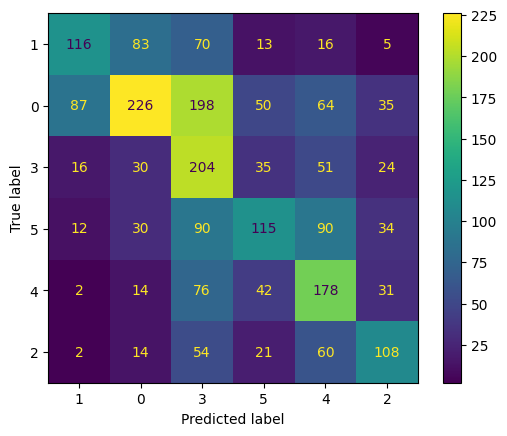

In [ ]:
cm_model4_test = confusion_matrix(all_labels_test, all_preds_test)
disp_model4_test = ConfusionMatrixDisplay(confusion_matrix=cm_model4_test, display_labels=df_test['label'].unique())
print(disp_model4_test.plot())

## Validation

In [ ]:
df_validation.fillna('',inplace=True)
validation_news_seqs = [text_to_sequence(t, MAX_LEN_NEWS) for t in df_validation['statement']]
validation_ctx_seqs  = [text_to_sequence(t, MAX_LEN_CONTEXT) for t in df_validation[text_context_cols].astype(str).agg(' '.join, axis=1)]

# Select numerical features for validation data
validation_numeric_data = df_validation[numeric_features_names].values.astype(float)

# Get validation labels
validation_labels = df_validation['label'].values

# Convert validation data to tensors
validation_news_seqs = torch.tensor(validation_news_seqs, dtype=torch.long)
validation_ctx_seqs  = torch.tensor(validation_ctx_seqs, dtype=torch.long)
validation_numeric_data = torch.tensor(validation_numeric_data, dtype=torch.float32)
validation_labels = torch.tensor(validation_labels, dtype=torch.long)

# Create Validation Dataset and DataLoader
validation_dataset = FakeNewsDataset(validation_news_seqs, validation_ctx_seqs, validation_numeric_data, validation_labels)
validation_loader = DataLoader(validation_dataset, batch_size=32) # Use the same batch size as training

# Evaluate the model on the validation set
model4.eval()
total_correct_validation_model4 = 0
total_count_validation_model4 = 0
all_preds_validation = []
all_labels_validation = []
with torch.no_grad():
    for batch_news, batch_ctx, batch_num, batch_labels in validation_loader:
        batch_news = batch_news.to(device)
        batch_ctx  = batch_ctx.to(device)
        batch_num  = batch_num.to(device)
        batch_labels = batch_labels.to(device)

        logits = model4(batch_news, batch_ctx, batch_num)
        preds = logits.argmax(dim=1)
        total_correct_validation_model4 += (preds == batch_labels).sum().item()
        total_count_validation_model4 += batch_labels.size(0)

        all_preds_validation.extend(preds.cpu().numpy())
        all_labels_validation.extend(batch_labels.cpu().numpy())

validation_accuracy_model4 = total_correct_validation_model4 / total_count_validation_model4
validation_f1_macro_model4 = f1_score(all_labels_validation, all_preds_validation, average='macro')
validation_f1_micro_model4 = f1_score(all_labels_validation, all_preds_validation, average='micro')
print(f"Validation Accuracy: {validation_accuracy_model4:.4f}")
print(f"Validation F1-macro: {validation_f1_macro_model4:.4f}")
print(f"Validation F1-micro: {validation_f1_micro_model4:.4f}")

Validation Accuracy: 0.4075
Validation F1-macro: 0.4078
Validation F1-micro: 0.4075


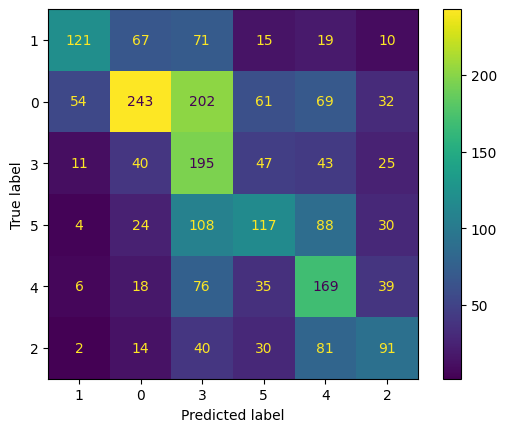

In [ ]:
cm_model4_validation = confusion_matrix(all_labels_validation, all_preds_validation)
disp_model4_validation = ConfusionMatrixDisplay(confusion_matrix=cm_model4_validation, display_labels=df_test['label'].unique())
print(disp_model4_validation.plot())

# Fuzzy Neural Network Layer (FNN)

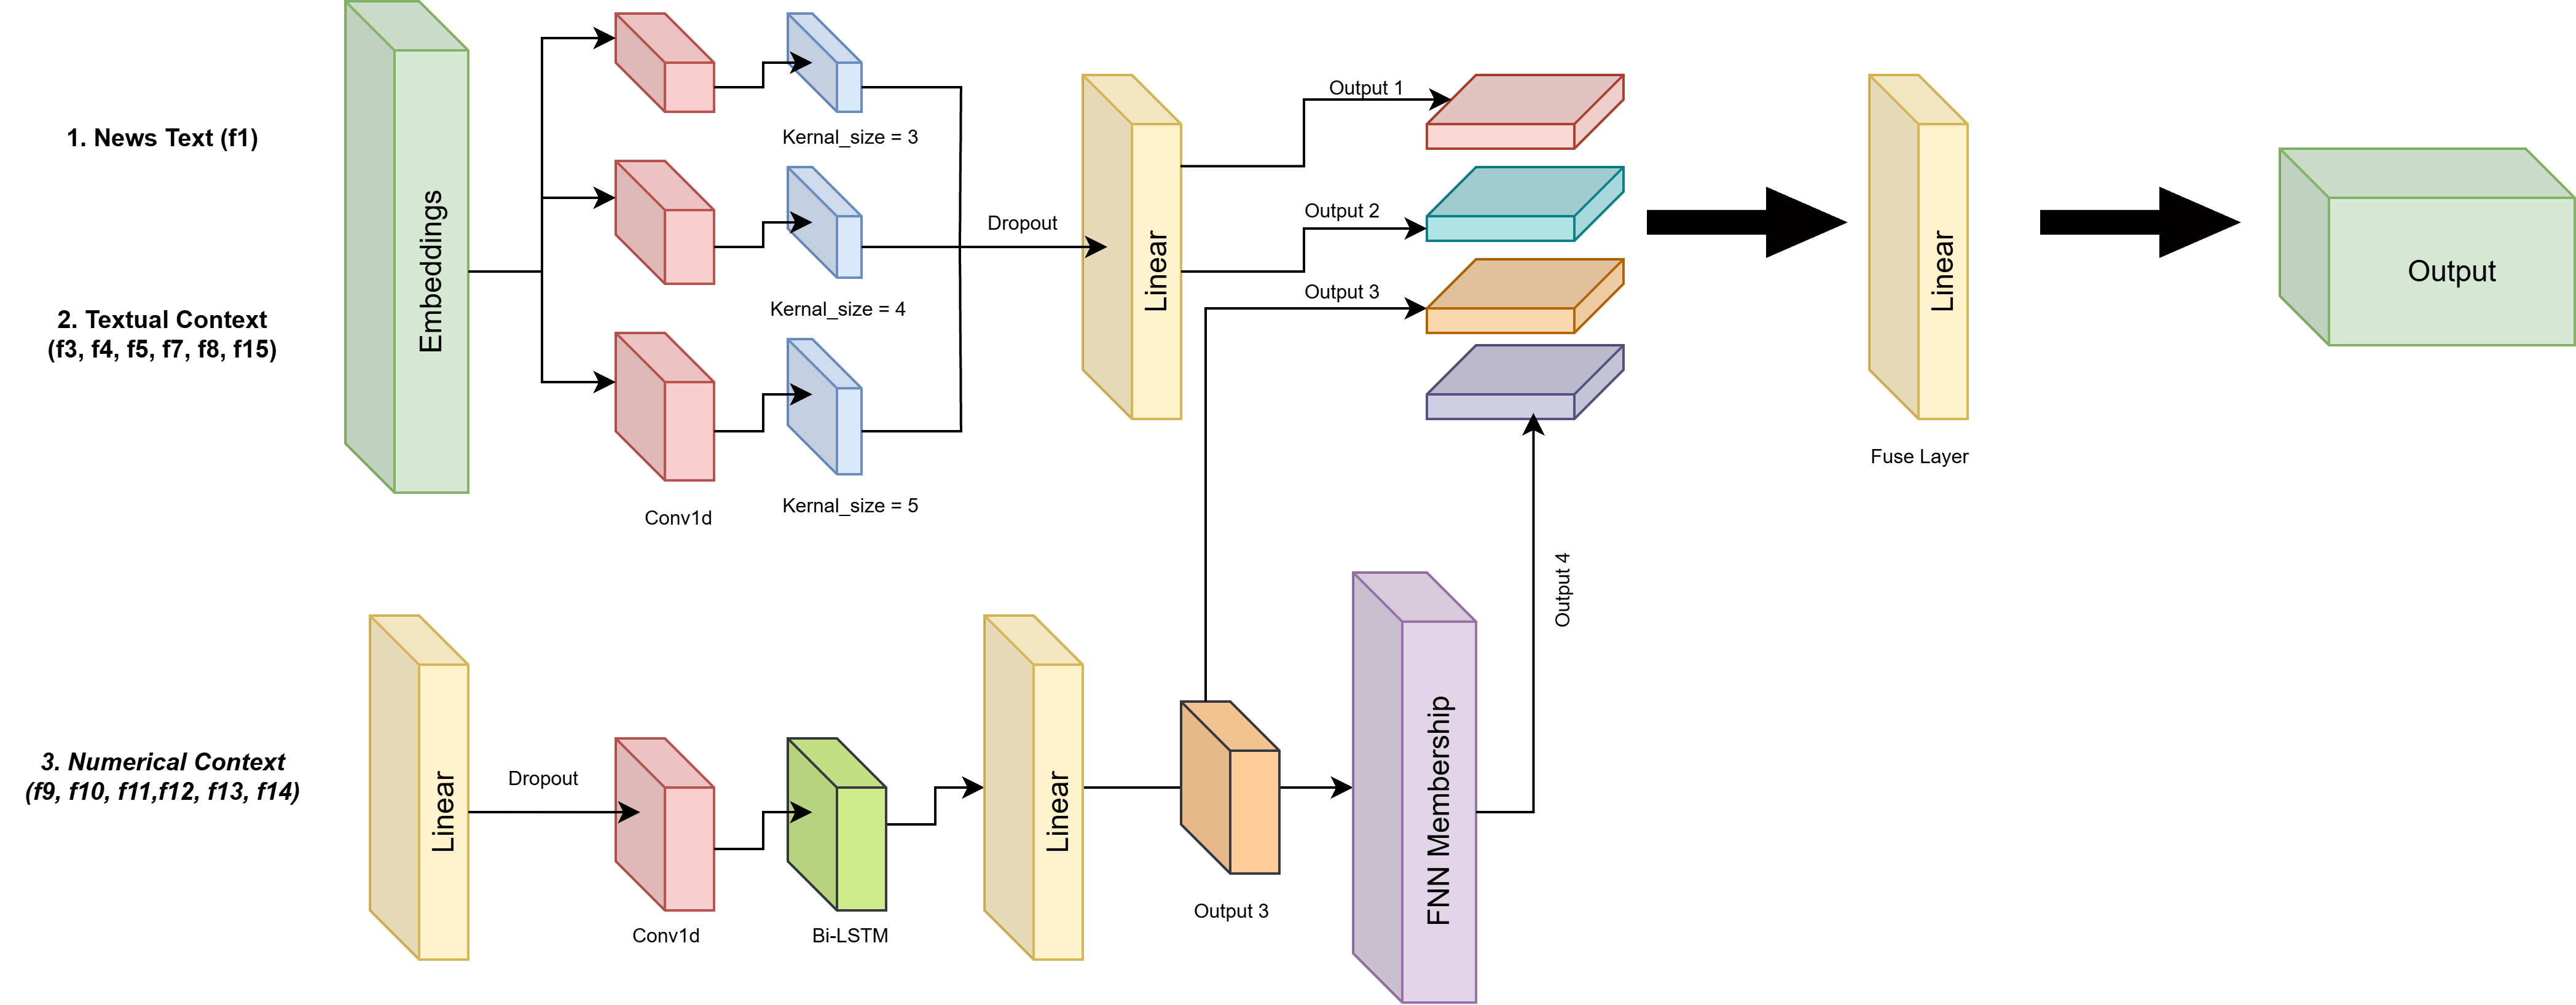

In [ ]:
"""The FuzzyNeuralLayer maps the numeric feature vector through a linear layer to class logits, then applies elementwise sigmoid to produce per-class fuzzy memberships in ,
yielding soft degrees instead of hard labels for each class.
"""
class FuzzyNeuralLayer(nn.Module):
    """
    Fuzzy Neural Network layer: a linear map to num_classes, followed by sigmoid.
    µ = sigmoid(W*x + b), giving (batch, classes).
    """
    def __init__(self, in_features, num_classes):
        super().__init__()
        self.linear = nn.Linear(in_features, num_classes)

    def forward(self, x):
        # x: (batch, in_features)
        out = self.linear(x)  # (batch, classes)
        mu = torch.sigmoid(out)
        return mu

In [ ]:
"""The FDHN variant combines four branches: two TextCNN encoders for news and context text, a NumericContext CNN+Bi-LSTM for numeric histories,
and a simple fuzzy-neural layer producing per-class memberships via sigmoid on a linear map. All four outputs are concatenated (128+128+128+num_classes)
and passed to a final linear layer to predict six Truth-O-Meter classes in an end-to-end trainable architecture.
"""

## 2d. FDHN Model (combining all components)
class FDHN(nn.Module):
    def __init__(self, vocab_size, num_numeric, embed_dim=128, num_classes=6): # Added num_classes
        super(FDHN, self).__init__()
        # News text channel
        self.news_cnn = TextCNN(vocab_size, embed_dim=embed_dim, num_filters=128,
                                filter_sizes=[3,4,5], output_dim=128)
        # Textual context channel
        self.ctx_cnn  = TextCNN(vocab_size, embed_dim=embed_dim, num_filters=128,
                                filter_sizes=[3,4,5], output_dim=128)
        # Numerical context channel
        self.num_ctx  = NumericContext(input_dim=num_numeric, linear_dim=64,
                                       cnn_channels=32, lstm_hidden=64, output_dim=128)
        # Fuzzy layer on numeric output (6 classes)
        self.fuzzy  = FuzzyNeuralLayer(in_features=128, num_classes=num_classes) # Updated num_classes
        # Final output layer: concatenated features to class scores
        total_features = 128 + 128 + 128 + num_classes   # news + context + numeric + fuzzy outputs
        self.fc_final = nn.Linear(total_features, num_classes) # Updated num_classes
    def forward(self, news, context, numeric):
        # Each sub-module processes its input
        out_news = self.news_cnn(news)       # (batch, 128)
        out_ctx  = self.ctx_cnn(context)     # (batch, 128)
        out_num  = self.num_ctx(numeric)     # (batch, 128)
        out_fuz  = self.fuzzy(out_num)       # (batch, 6) (membership for each class)
        # Concatenate all feature vectors
        combined = torch.cat([out_news, out_ctx, out_num, out_fuz], dim=1)  # (batch, 128+128+128+6 = 390)
        logits = self.fc_final(combined)      # (batch, 6)
        return logits

In [ ]:
# Instantiate the model
vocab_size = len(vocab)
num_numeric = numeric_data.shape[1]
model5 = FDHN(vocab_size=vocab_size, num_numeric=num_numeric, embed_dim=128, num_classes=6)

# 3. Training Setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model5.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model5.parameters(), lr=1e-3)

## Training

In [ ]:
# 4. Training Loop
from sklearn.metrics import f1_score
import time

# Store training history
history_model5 = {'loss': [], 'accuracy': [], 'f1_macro': [], 'f1_micro': []}

for epoch in range(20):  # short training for demonstration
    start_time = time.time()  # Start time of the epoch
    model5.train() # Changed model to model5
    total_loss = 0.0
    total_correct = 0
    total_count = 0
    all_preds = []
    all_labels = []

    for batch_news, batch_ctx, batch_num, batch_labels in loader:
        batch_news = batch_news.to(device)
        batch_ctx  = batch_ctx.to(device)
        batch_num  = batch_num.to(device)
        batch_labels = batch_labels.to(device)
        # Forward pass
        logits = model5(batch_news, batch_ctx, batch_num)
        loss = criterion(logits, batch_labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * batch_labels.size(0)
        preds = logits.argmax(dim=1)
        total_correct += (preds == batch_labels).sum().item()
        total_count += batch_labels.size(0)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(batch_labels.cpu().numpy())

    avg_loss = total_loss / total_count
    acc = total_correct / total_count
    f1_macro = f1_score(all_labels, all_preds, average='macro')
    f1_micro = f1_score(all_labels, all_preds, average='micro') # Calculate F1-micro

    end_time = time.time()  # End time of the epoch
    epoch_time = end_time - start_time

    # Store metrics
    history_model5['loss'].append(avg_loss)
    history_model5['accuracy'].append(acc)
    history_model5['f1_macro'].append(f1_macro)
    history_model5['f1_micro'].append(f1_micro)

    print(f"Epoch {epoch+1}: Loss={avg_loss:.4f}, Accuracy={acc:.4f}, F1-macro={f1_macro:.4f}, F1-micro={f1_micro:.4f}, Epoch Time={epoch_time:.2f}s")

Epoch 1: Loss=1.6160, Accuracy=0.3160, F1-macro=0.3175, F1-micro=0.3160, Epoch Time=4.45s
Epoch 2: Loss=1.4217, Accuracy=0.4108, F1-macro=0.4137, F1-micro=0.4108, Epoch Time=4.37s
Epoch 3: Loss=1.3155, Accuracy=0.4644, F1-macro=0.4670, F1-micro=0.4644, Epoch Time=4.36s
Epoch 4: Loss=1.2404, Accuracy=0.4942, F1-macro=0.4965, F1-micro=0.4942, Epoch Time=4.37s
Epoch 5: Loss=1.1363, Accuracy=0.5376, F1-macro=0.5407, F1-micro=0.5376, Epoch Time=4.35s
Epoch 6: Loss=1.0155, Accuracy=0.5961, F1-macro=0.5988, F1-micro=0.5961, Epoch Time=4.45s
Epoch 7: Loss=0.8735, Accuracy=0.6578, F1-macro=0.6615, F1-micro=0.6578, Epoch Time=4.41s
Epoch 8: Loss=0.7384, Accuracy=0.7175, F1-macro=0.7207, F1-micro=0.7175, Epoch Time=4.38s
Epoch 9: Loss=0.6254, Accuracy=0.7636, F1-macro=0.7665, F1-micro=0.7636, Epoch Time=4.41s
Epoch 10: Loss=0.5391, Accuracy=0.7982, F1-macro=0.8007, F1-micro=0.7982, Epoch Time=4.36s
Epoch 11: Loss=0.4473, Accuracy=0.8342, F1-macro=0.8361, F1-micro=0.8342, Epoch Time=4.40s
Epoch 12

## Testing

In [ ]:
df_test.fillna('',inplace=True)
# Convert test text data to sequences using the same vocabulary and max lengths
test_news_seqs = [text_to_sequence(t, MAX_LEN_NEWS) for t in df_test['statement']]
test_ctx_seqs  = [text_to_sequence(t, MAX_LEN_CONTEXT) for t in df_test[text_context_cols].astype(str).agg(' '.join, axis=1)]

# Select numerical features for test data
test_numeric_data = df_test[numeric_features_names].values.astype(float)

# Get test labels
test_labels = df_test['label'].values

# Convert test data to tensors
test_news_seqs = torch.tensor(test_news_seqs, dtype=torch.long)
test_ctx_seqs  = torch.tensor(test_ctx_seqs, dtype=torch.long)
test_numeric_data = torch.tensor(test_numeric_data, dtype=torch.float32)
test_labels = torch.tensor(test_labels, dtype=torch.long)

# Create Test Dataset and DataLoader
test_dataset = FakeNewsDataset(test_news_seqs, test_ctx_seqs, test_numeric_data, test_labels)
test_loader = DataLoader(test_dataset, batch_size=32) # Use the same batch size as training

# Evaluate the model on the test set
model5.eval()
total_correct_test_model5 = 0
total_count_test_model5 = 0
all_preds_test = []
all_labels_test = []
with torch.no_grad():
    for batch_news, batch_ctx, batch_num, batch_labels in test_loader:
        batch_news = batch_news.to(device)
        batch_ctx  = batch_ctx.to(device)
        batch_num  = batch_num.to(device)
        batch_labels = batch_labels.to(device)

        logits = model5(batch_news, batch_ctx, batch_num)
        preds = logits.argmax(dim=1)
        total_correct_test_model5 += (preds == batch_labels).sum().item()
        total_count_test_model5 += batch_labels.size(0)

        all_preds_test.extend(preds.cpu().numpy())
        all_labels_test.extend(batch_labels.cpu().numpy())


test_accuracy_model5 = total_correct_test_model5 / total_count_test_model5
test_f1_macro_model5 = f1_score(all_labels_test, all_preds_test, average='macro')
test_f1_micro_model5 = f1_score(all_labels_test, all_preds_test, average='micro')

print(f"Test Accuracy: {test_accuracy_model5:.4f}")
print(f"Test F1-macro: {test_f1_macro_model5:.4f}")
print(f"Test F1-micro: {test_f1_micro_model5:.4f}")

Test Accuracy: 0.4072
Test F1-macro: 0.4115
Test F1-micro: 0.4072


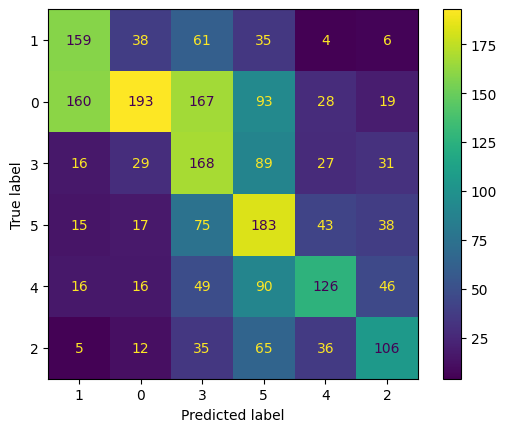

In [ ]:
cm_model5_test = confusion_matrix(all_labels_test, all_preds_test)
disp_model5_test = ConfusionMatrixDisplay(confusion_matrix=cm_model5_test, display_labels=df_test['label'].unique())
print(disp_model5_test.plot())

## Validation

In [ ]:
df_validation.fillna('',inplace=True)
validation_news_seqs = [text_to_sequence(t, MAX_LEN_NEWS) for t in df_validation['statement']]
validation_ctx_seqs  = [text_to_sequence(t, MAX_LEN_CONTEXT) for t in df_validation[text_context_cols].astype(str).agg(' '.join, axis=1)]

# Select numerical features for validation data
validation_numeric_data = df_validation[numeric_features_names].values.astype(float)

# Get validation labels
validation_labels = df_validation['label'].values

# Convert validation data to tensors
validation_news_seqs = torch.tensor(validation_news_seqs, dtype=torch.long)
validation_ctx_seqs  = torch.tensor(validation_ctx_seqs, dtype=torch.long)
validation_numeric_data = torch.tensor(validation_numeric_data, dtype=torch.float32)
validation_labels = torch.tensor(validation_labels, dtype=torch.long)

# Create Validation Dataset and DataLoader
validation_dataset = FakeNewsDataset(validation_news_seqs, validation_ctx_seqs, validation_numeric_data, validation_labels)
validation_loader = DataLoader(validation_dataset, batch_size=32) # Use the same batch size as training

# Evaluate the model on the validation set
model5.eval()
total_correct_validation_model5 = 0
total_count_validation_model5 = 0
all_preds_validation = []
all_labels_validation = []
with torch.no_grad():
    for batch_news, batch_ctx, batch_num, batch_labels in validation_loader:
        batch_news = batch_news.to(device)
        batch_ctx  = batch_ctx.to(device)
        batch_num  = batch_num.to(device)
        batch_labels = batch_labels.to(device)

        logits = model5(batch_news, batch_ctx, batch_num)
        preds = logits.argmax(dim=1)
        total_correct_validation_model5 += (preds == batch_labels).sum().item()
        total_count_validation_model5 += batch_labels.size(0)

        all_preds_validation.extend(preds.cpu().numpy())
        all_labels_validation.extend(batch_labels.cpu().numpy())


validation_accuracy_model5 = total_correct_validation_model5 / total_count_validation_model5
validation_f1_macro_model5 = f1_score(all_labels_validation, all_preds_validation, average='macro')
validation_f1_micro_model5 = f1_score(all_labels_validation, all_preds_validation, average='micro')

print(f"Validation Accuracy: {validation_accuracy_model5:.4f}")
print(f"Validation F1-macro: {validation_f1_macro_model5:.4f}")
print(f"Validation F1-micro: {validation_f1_micro_model5:.4f}")

Validation Accuracy: 0.4001
Validation F1-macro: 0.4030
Validation F1-micro: 0.4001


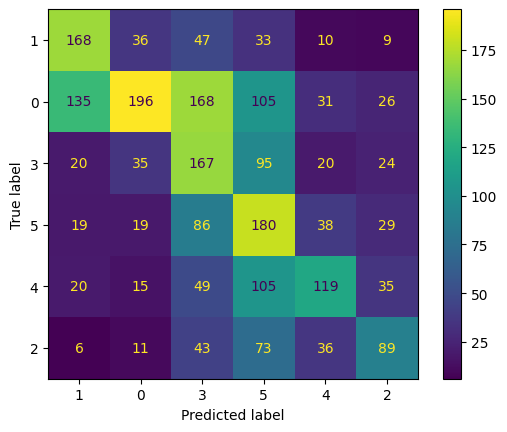

In [ ]:
cm_model5_validation = confusion_matrix(all_labels_validation, all_preds_validation)
disp_model5_validation = ConfusionMatrixDisplay(confusion_matrix=cm_model5_validation, display_labels=df_test['label'].unique())
print(disp_model5_validation.plot())

# Generalized Bell Membership Function

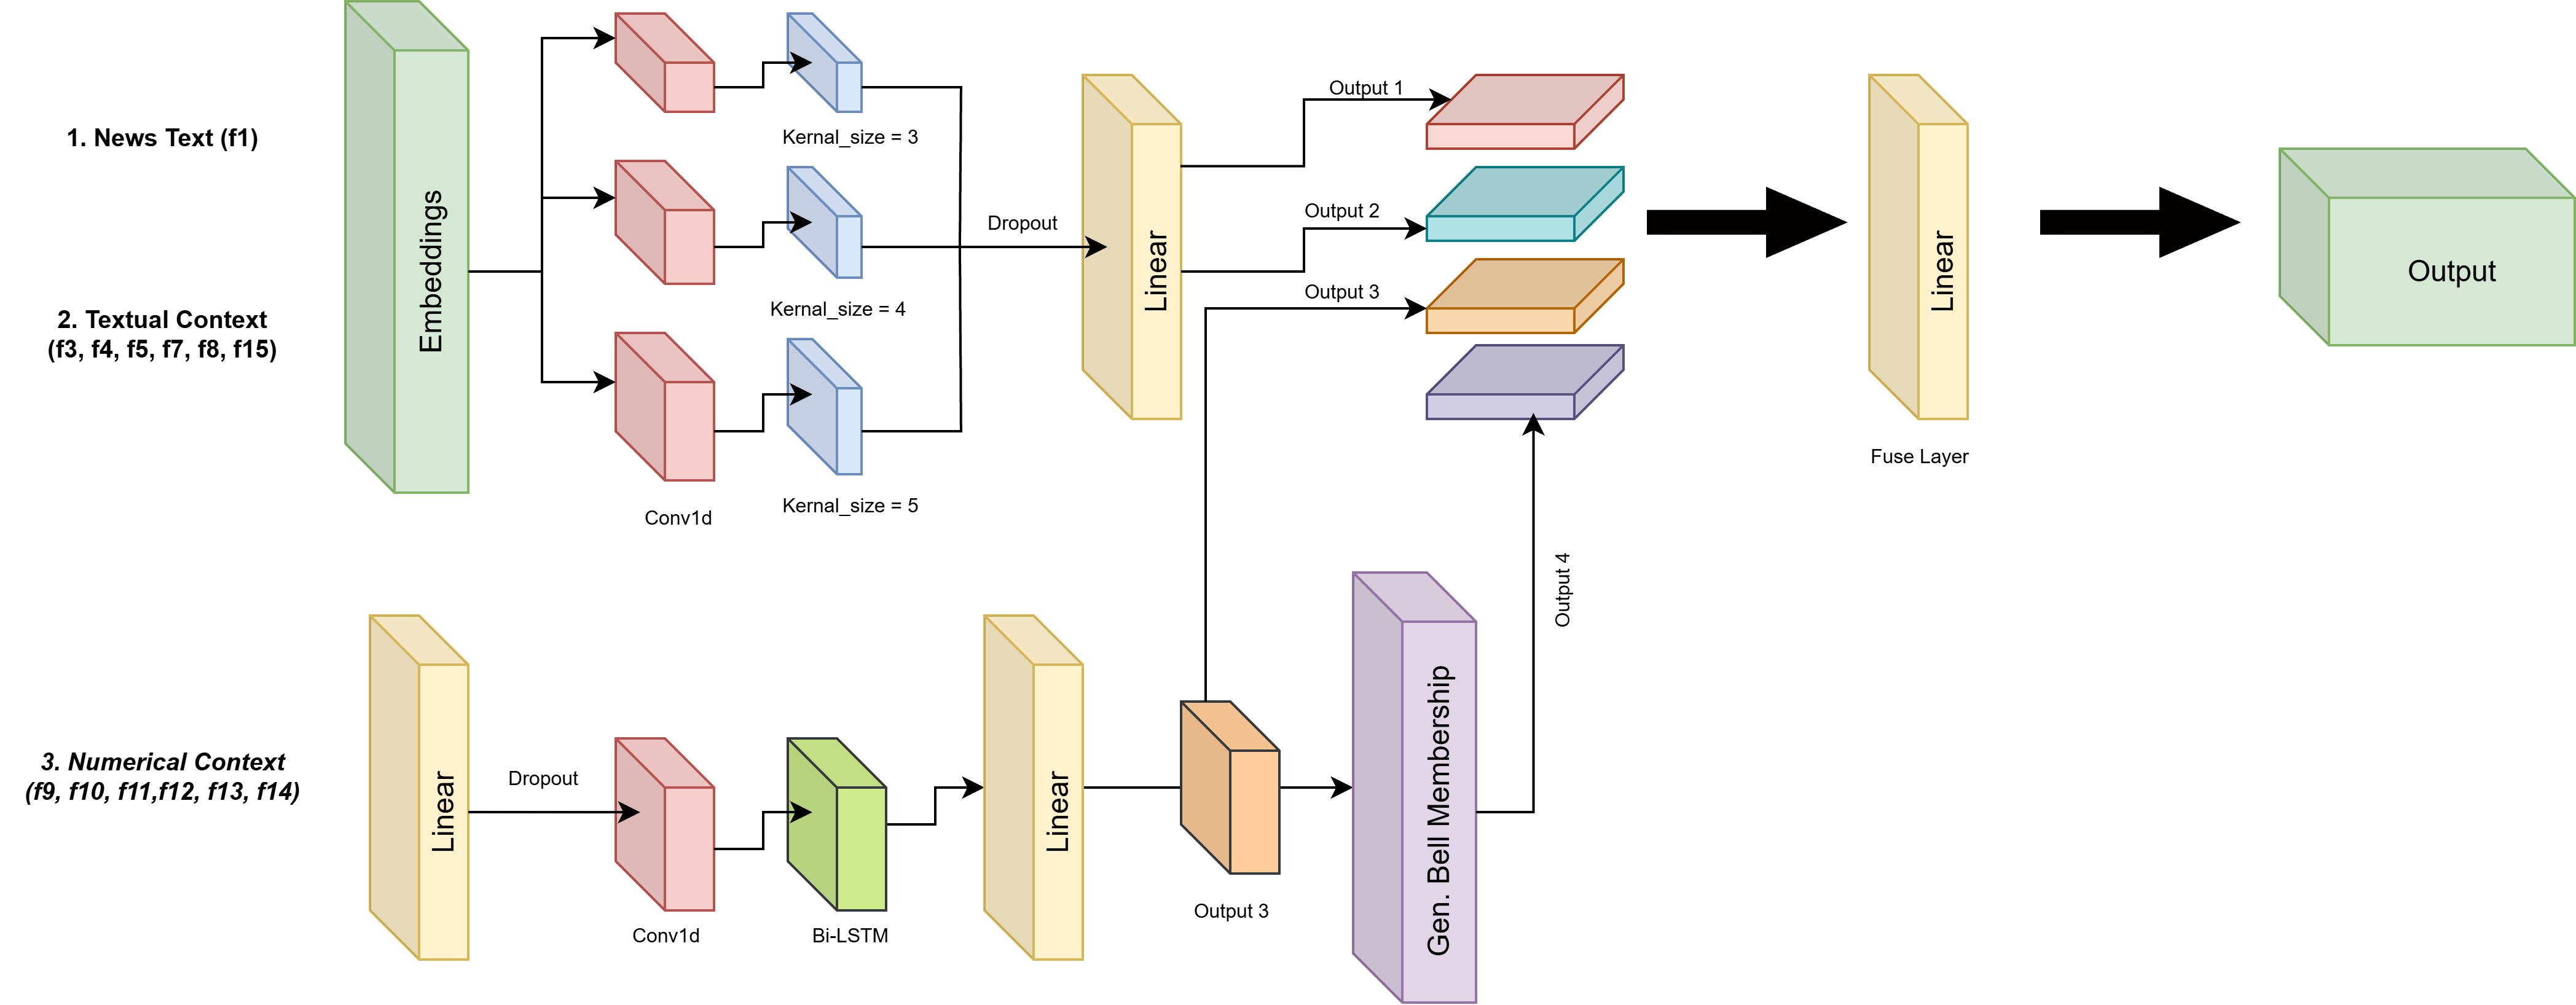

In [ ]:
"""
The BellFuzzyLayer computes per-class memberships using a generalized bell function with trainable width a, shape b, and center c for each feature-class pair,
ensuring a>0 and b>0 via softplus for stability. Each input feature is transformedrmed as μ(x)=1/(1+|(x−c)/a|^(2b)), producing smooth, symmetric membership curves
that peak at c and decay gracefully as x moves away. Memberships are averaged across features to yield a batch-by-classes matrix of fuzzy scores in ,
capturing uncertainty as soft degrees rather than hard assignments.
"""
class BellFuzzyLayer(nn.Module):
    """
    Generalized bell membership layer: params a, b, c per class-feature.
    µ(x) = 1 / (1 + |(x-c)/a|^(2b)), then averaged over features.
    """
    def __init__(self, in_features, num_classes):
        super().__init__()
        self.a_offset = nn.Parameter(torch.randn(in_features, num_classes))
        self.b_offset = nn.Parameter(torch.randn(in_features, num_classes))
        self.c = nn.Parameter(torch.randn(in_features, num_classes))
        self.softplus = nn.Softplus()

    def forward(self, x):
        x_expand = x.unsqueeze(2)
        a = self.softplus(self.a_offset).unsqueeze(0)  # ensure a>0
        b = self.softplus(self.b_offset).unsqueeze(0)  # ensure b>0
        c = self.c.unsqueeze(0)
        ratio = torch.abs((x_expand - c) / a)
        mu = 1.0 / (1.0 + torch.pow(ratio, 2*b))
        mu = mu.mean(dim=1)
        return mu

In [ ]:
"""
The FDHN variant integrates four branches end-to-end: two TextCNN channels encode news and contextual text into 128‑dimensional features each for linguistic signal extraction.
A NumericContext branch embeds numeric speaker histories through a linear layer, 1D CNN, and Bi‑LSTM to capture local patterns and temporal dependencies in a 128‑dimensional vector.
A BellFuzzyLayer then maps that numeric embedding to per‑class fuzzy memberships via a generalized bell function with trainable width, shape, and center ensuring smooth, symmetric
uncertainty modeling. The four outputs (news, context, numeric, fuzzy) are concatenated and fed to a final linear layer to predict six Truth‑O‑Meter classes in a single trainable
architecture.
"""
## 2d. FDHN Model (combining all components)
class FDHN(nn.Module):
    def __init__(self, vocab_size, num_numeric, embed_dim=128, num_classes=6): # Added num_classes
        super(FDHN, self).__init__()
        # News text channel
        self.news_cnn = TextCNN(vocab_size, embed_dim=embed_dim, num_filters=128,
                                filter_sizes=[3,4,5], output_dim=128)
        # Textual context channel
        self.ctx_cnn  = TextCNN(vocab_size, embed_dim=embed_dim, num_filters=128,
                                filter_sizes=[3,4,5], output_dim=128)
        # Numerical context channel
        self.num_ctx  = NumericContext(input_dim=num_numeric, linear_dim=64,
                                       cnn_channels=32, lstm_hidden=64, output_dim=128)
        # Fuzzy layer on numeric output (6 classes)
        self.fuzzy  = BellFuzzyLayer(in_features=128, num_classes=num_classes) # Updated num_classes
        # Final output layer: concatenated features to class scores
        total_features = 128 + 128 + 128 + num_classes   # news + context + numeric + fuzzy outputs
        self.fc_final = nn.Linear(total_features, num_classes) # Updated num_classes
    def forward(self, news, context, numeric):
        # Each sub-module processes its input
        out_news = self.news_cnn(news)       # (batch, 128)
        out_ctx  = self.ctx_cnn(context)     # (batch, 128)
        out_num  = self.num_ctx(numeric)     # (batch, 128)
        out_fuz  = self.fuzzy(out_num)       # (batch, 6) (membership for each class)
        # Concatenate all feature vectors
        combined = torch.cat([out_news, out_ctx, out_num, out_fuz], dim=1)  # (batch, 128+128+128+6 = 390)
        logits = self.fc_final(combined)      # (batch, 6)
        return logits

In [ ]:
# Instantiate the model
vocab_size = len(vocab)
num_numeric = numeric_data.shape[1]
model6 = FDHN(vocab_size=vocab_size, num_numeric=num_numeric, embed_dim=128, num_classes=6)

# 3. Training Setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model6.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model6.parameters(), lr=1e-3)

## Training

In [ ]:
# 4. Training Loop
from sklearn.metrics import f1_score
import time

# Store training history
history_model6 = {'loss': [], 'accuracy': [], 'f1_macro': [], 'f1_micro': []}

for epoch in range(20):  # short training for demonstration
    start_time = time.time()  # Start time of the epoch
    model6.train()
    total_loss = 0.0
    total_correct = 0
    total_count = 0
    all_preds = []
    all_labels = []

    for batch_news, batch_ctx, batch_num, batch_labels in loader:
        batch_news = batch_news.to(device)
        batch_ctx  = batch_ctx.to(device)
        batch_num  = batch_num.to(device)
        batch_labels = batch_labels.to(device)
        # Forward pass
        logits = model6(batch_news, batch_ctx, batch_num)
        loss = criterion(logits, batch_labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * batch_labels.size(0)
        preds = logits.argmax(dim=1)
        total_correct += (preds == batch_labels).sum().item()
        total_count += batch_labels.size(0)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(batch_labels.cpu().numpy())

    avg_loss = total_loss / total_count
    acc = total_correct / total_count
    f1_macro = f1_score(all_labels, all_preds, average='macro')
    f1_micro = f1_score(all_labels, all_preds, average='micro') # Calculate F1-micro

    end_time = time.time()  # End time of the epoch
    epoch_time = end_time - start_time

    # Store metrics
    history_model6['loss'].append(avg_loss)
    history_model6['accuracy'].append(acc)
    history_model6['f1_macro'].append(f1_macro)
    history_model6['f1_micro'].append(f1_micro)

    print(f"Epoch {epoch+1}: Loss={avg_loss:.4f}, Accuracy={acc:.4f}, F1-macro={f1_macro:.4f}, F1-micro={f1_micro:.4f}, Epoch Time={epoch_time:.2f}s")

Epoch 1: Loss=1.6241, Accuracy=0.3100, F1-macro=0.3068, F1-micro=0.3100, Epoch Time=4.96s
Epoch 2: Loss=1.4088, Accuracy=0.4179, F1-macro=0.4179, F1-micro=0.4179, Epoch Time=4.91s
Epoch 3: Loss=1.3226, Accuracy=0.4574, F1-macro=0.4583, F1-micro=0.4574, Epoch Time=5.00s
Epoch 4: Loss=1.2310, Accuracy=0.4961, F1-macro=0.4979, F1-micro=0.4961, Epoch Time=4.93s
Epoch 5: Loss=1.1193, Accuracy=0.5579, F1-macro=0.5606, F1-micro=0.5579, Epoch Time=4.96s
Epoch 6: Loss=0.9881, Accuracy=0.6096, F1-macro=0.6121, F1-micro=0.6096, Epoch Time=4.93s
Epoch 7: Loss=0.8560, Accuracy=0.6686, F1-macro=0.6715, F1-micro=0.6686, Epoch Time=4.84s
Epoch 8: Loss=0.7283, Accuracy=0.7219, F1-macro=0.7251, F1-micro=0.7219, Epoch Time=4.96s
Epoch 9: Loss=0.6121, Accuracy=0.7686, F1-macro=0.7714, F1-micro=0.7686, Epoch Time=4.87s
Epoch 10: Loss=0.5050, Accuracy=0.8138, F1-macro=0.8160, F1-micro=0.8138, Epoch Time=4.89s
Epoch 11: Loss=0.4336, Accuracy=0.8413, F1-macro=0.8434, F1-micro=0.8413, Epoch Time=4.91s
Epoch 12

## Testing

In [ ]:
df_test.fillna('',inplace=True)
# Convert test text data to sequences using the same vocabulary and max lengths
test_news_seqs = [text_to_sequence(t, MAX_LEN_NEWS) for t in df_test['statement']]
test_ctx_seqs  = [text_to_sequence(t, MAX_LEN_CONTEXT) for t in df_test[text_context_cols].astype(str).agg(' '.join, axis=1)]

# Select numerical features for test data
test_numeric_data = df_test[numeric_features_names].values.astype(float)

# Get test labels
test_labels = df_test['label'].values

# Convert test data to tensors
test_news_seqs = torch.tensor(test_news_seqs, dtype=torch.long)
test_ctx_seqs  = torch.tensor(test_ctx_seqs, dtype=torch.long)
test_numeric_data = torch.tensor(test_numeric_data, dtype=torch.float32)
test_labels = torch.tensor(test_labels, dtype=torch.long)

# Create Test Dataset and DataLoader
test_dataset = FakeNewsDataset(test_news_seqs, test_ctx_seqs, test_numeric_data, test_labels)
test_loader = DataLoader(test_dataset, batch_size=32) # Use the same batch size as training

# Evaluate the model on the test set
model6.eval()
total_correct_test_model6 = 0
total_count_test_model6 = 0
all_preds_test = []
all_labels_test = []
with torch.no_grad():
    for batch_news, batch_ctx, batch_num, batch_labels in test_loader:
        batch_news = batch_news.to(device)
        batch_ctx  = batch_ctx.to(device)
        batch_num  = batch_num.to(device)
        batch_labels = batch_labels.to(device)

        logits = model6(batch_news, batch_ctx, batch_num)
        preds = logits.argmax(dim=1)
        total_correct_test_model6 += (preds == batch_labels).sum().item()
        total_count_test_model6 += batch_labels.size(0)

        all_preds_test.extend(preds.cpu().numpy())
        all_labels_test.extend(batch_labels.cpu().numpy())


test_accuracy_model6 = total_correct_test_model6 / total_count_test_model6
test_f1_macro_model6 = f1_score(all_labels_test, all_preds_test, average='macro')
test_f1_micro_model6 = f1_score(all_labels_test, all_preds_test, average='micro')
print(f"Test Accuracy: {test_accuracy_model6:.4f}")
print(f"Test F1-macro: {test_f1_macro_model6:.4f}")
print(f"Test F1-micro: {test_f1_micro_model6:.4f}")

Test Accuracy: 0.4447
Test F1-macro: 0.4396
Test F1-micro: 0.4447


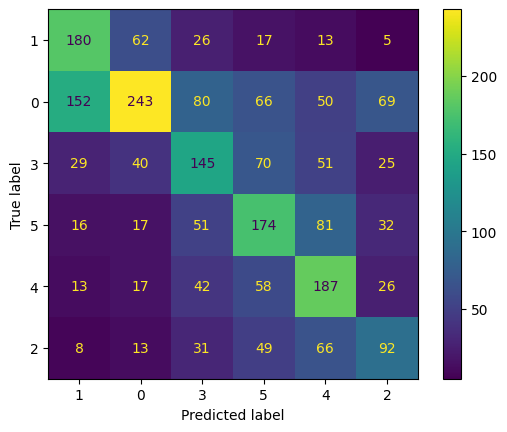

In [ ]:
cm_model6_test = confusion_matrix(all_labels_test, all_preds_test)
disp_model6_test = ConfusionMatrixDisplay(confusion_matrix=cm_model6_test, display_labels=df_test['label'].unique())
print(disp_model6_test.plot())

## Validation

In [ ]:
df_validation.fillna('',inplace=True)
validation_news_seqs = [text_to_sequence(t, MAX_LEN_NEWS) for t in df_validation['statement']]
validation_ctx_seqs  = [text_to_sequence(t, MAX_LEN_CONTEXT) for t in df_validation[text_context_cols].astype(str).agg(' '.join, axis=1)]

# Select numerical features for validation data
validation_numeric_data = df_validation[numeric_features_names].values.astype(float)

# Get validation labels
validation_labels = df_validation['label'].values

# Convert validation data to tensors
validation_news_seqs = torch.tensor(validation_news_seqs, dtype=torch.long)
validation_ctx_seqs  = torch.tensor(validation_ctx_seqs, dtype=torch.long)
validation_numeric_data = torch.tensor(validation_numeric_data, dtype=torch.float32)
validation_labels = torch.tensor(validation_labels, dtype=torch.long)

# Create Validation Dataset and DataLoader
validation_dataset = FakeNewsDataset(validation_news_seqs, validation_ctx_seqs, validation_numeric_data, validation_labels)
validation_loader = DataLoader(validation_dataset, batch_size=32) # Use the same batch size as training

# Evaluate the model on the validation set
model6.eval()
total_correct_validation_model6 = 0
total_count_validation_model6 = 0
all_preds_validation = []
all_labels_validation = []
with torch.no_grad():
    for batch_news, batch_ctx, batch_num, batch_labels in validation_loader:
        batch_news = batch_news.to(device)
        batch_ctx  = batch_ctx.to(device)
        batch_num  = batch_num.to(device)
        batch_labels = batch_labels.to(device)

        logits = model6(batch_news, batch_ctx, batch_num)
        preds = logits.argmax(dim=1)
        total_correct_validation_model6 += (preds == batch_labels).sum().item()
        total_count_validation_model6 += batch_labels.size(0)

        all_preds_validation.extend(preds.cpu().numpy())
        all_labels_validation.extend(batch_labels.cpu().numpy())


validation_accuracy_model6 = total_correct_validation_model6 / total_count_validation_model6
validation_f1_macro_model6 = f1_score(all_labels_validation, all_preds_validation, average='macro')
validation_f1_micro_model6 = f1_score(all_labels_validation, all_preds_validation, average='micro')

print(f"Validation Accuracy: {validation_accuracy_model6:.4f}")
print(f"Validation F1-macro: {validation_f1_macro_model6:.4f}")
print(f"Validation F1-micro: {validation_f1_micro_model6:.4f}")

Validation Accuracy: 0.4005
Validation F1-macro: 0.4002
Validation F1-micro: 0.4005


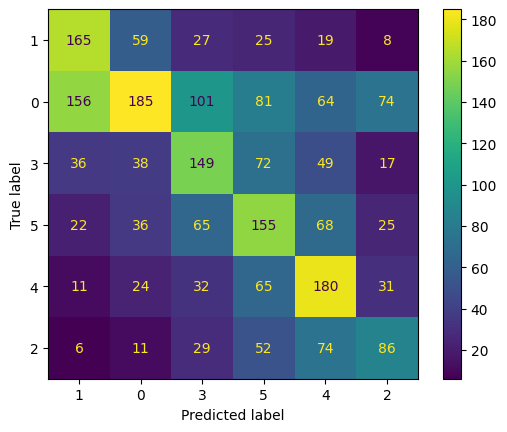

In [ ]:
cm_model6_validation = confusion_matrix(all_labels_validation, all_preds_validation)
disp_model6_validation = ConfusionMatrixDisplay(confusion_matrix=cm_model6_validation, display_labels=df_test['label'].unique())
print(disp_model6_validation.plot())

# Incorporating LLM (Gaussian Membership)

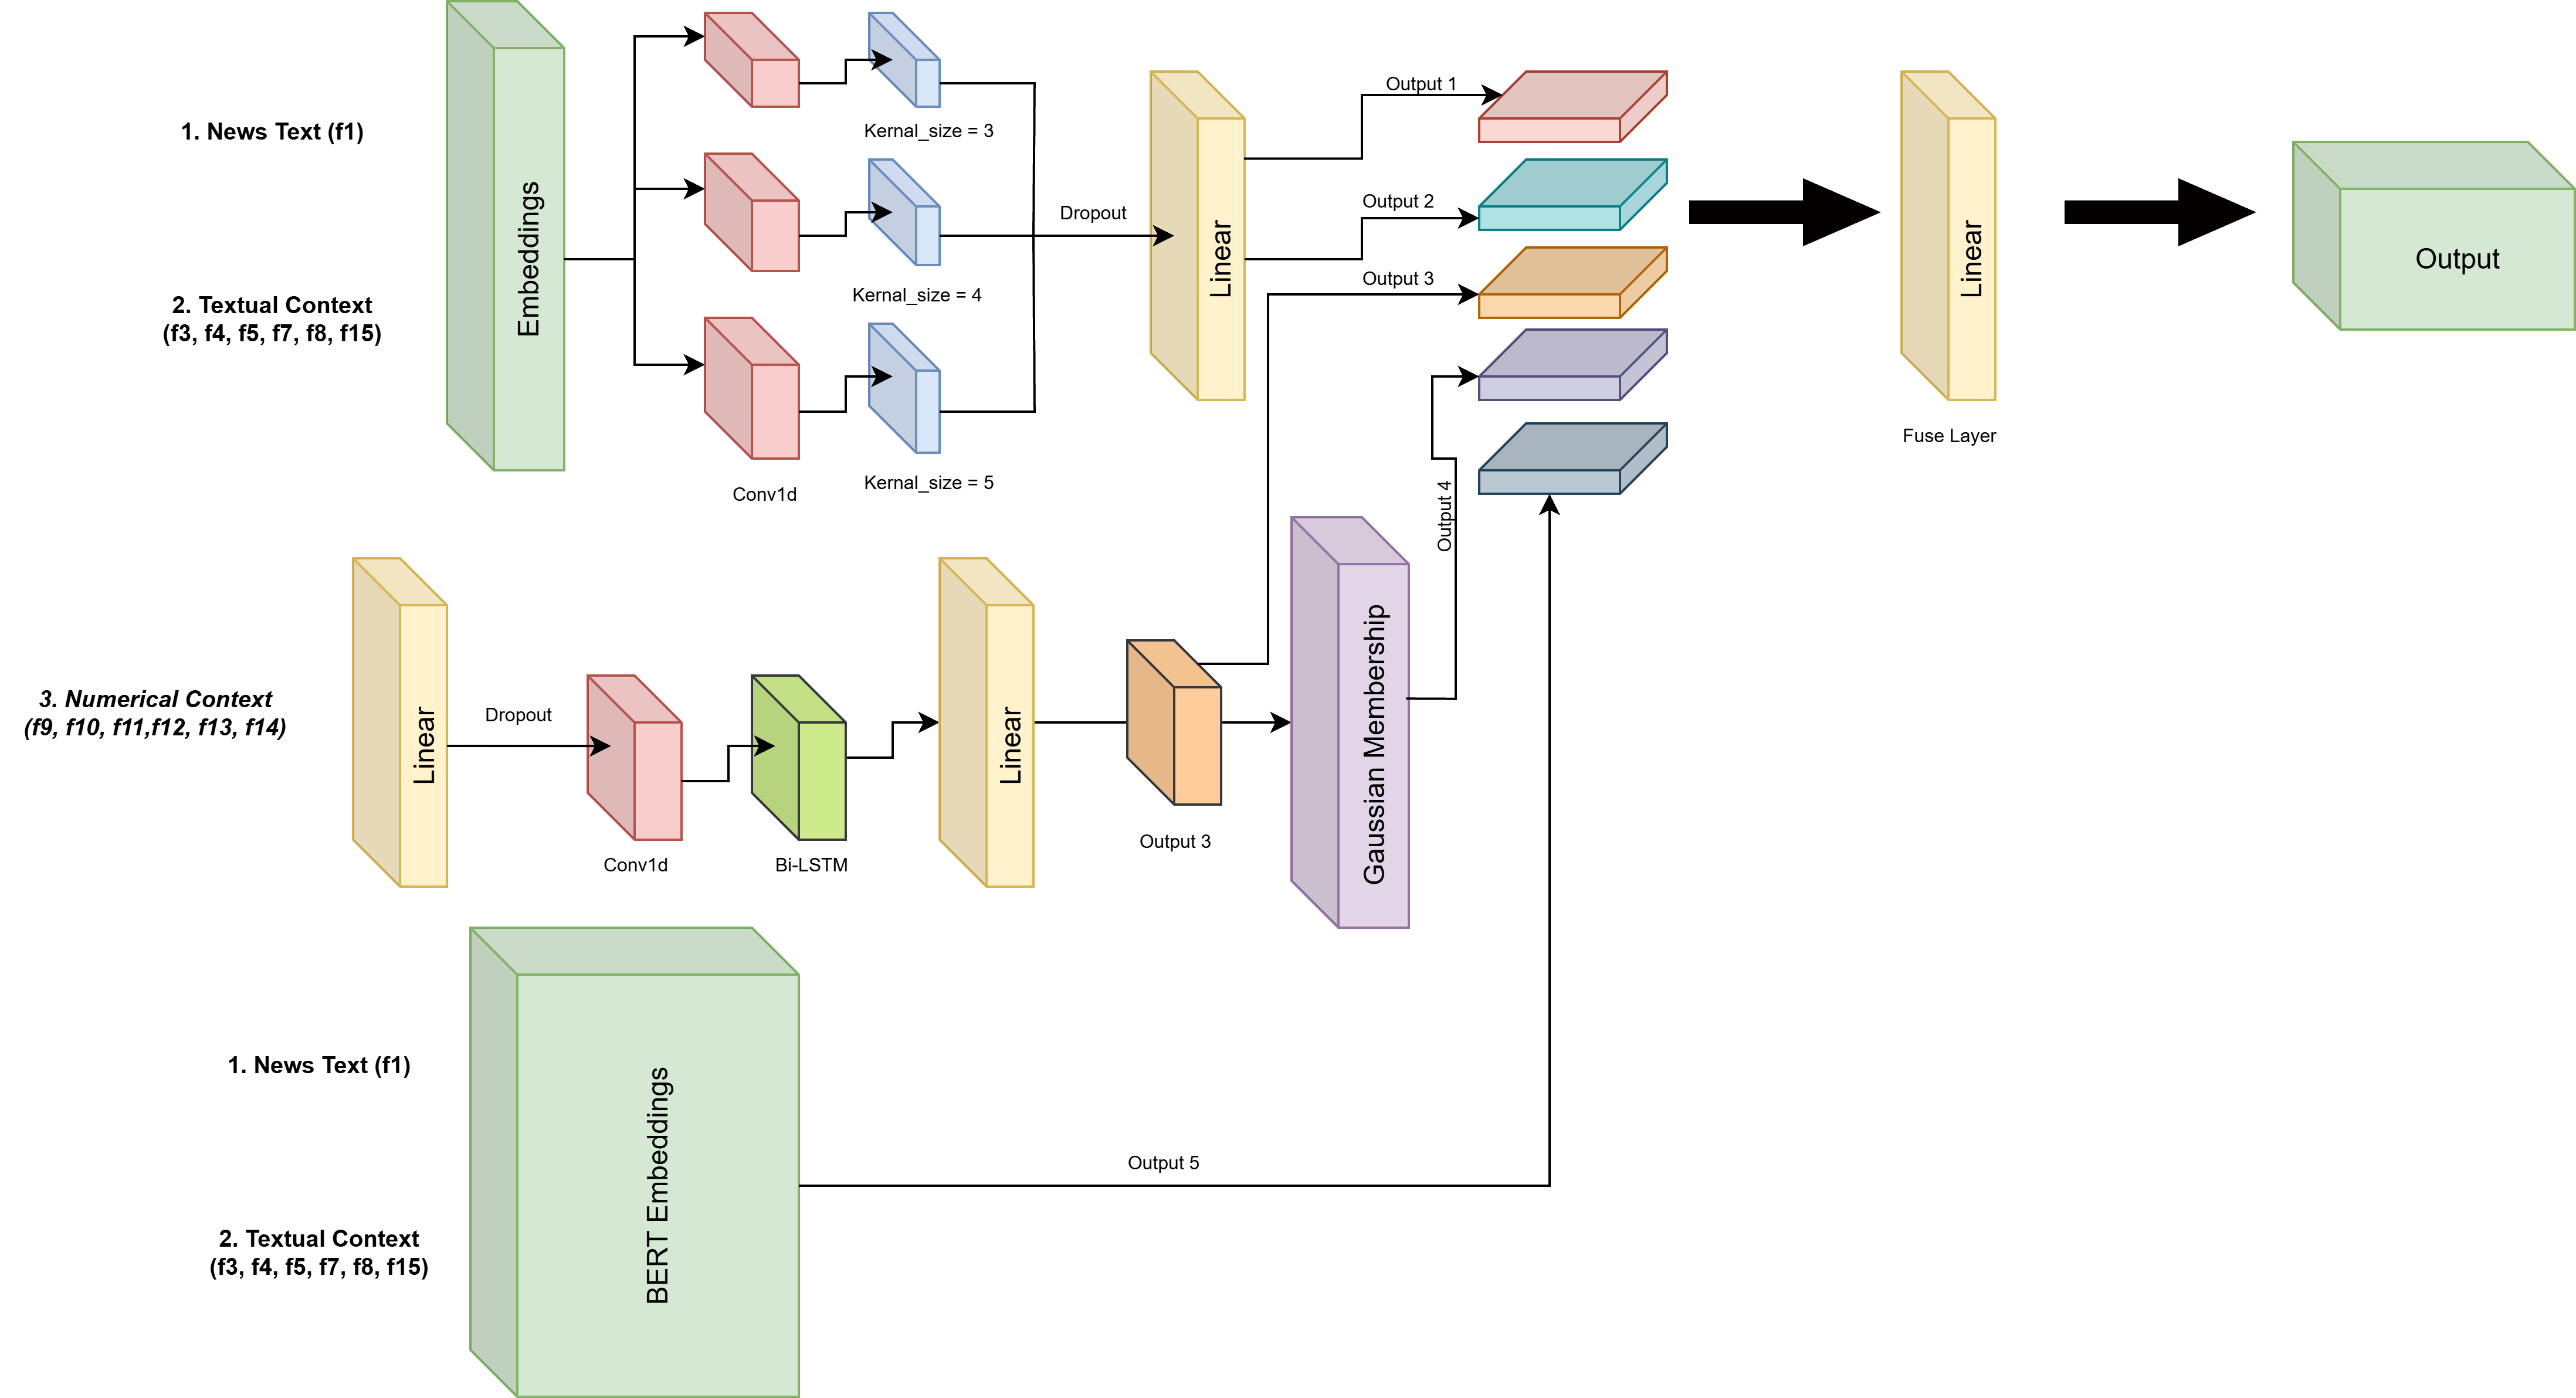

## Generate llm embeddings

Generate embeddings for the relevant text data (statement, context, justification) using an LLM model.


In [ ]:
"""
This code concatenates statement, context, and justification, tokenizes with bert-base-uncased to length 256, runs the model on GPU in eval/no-grad batches,
and collects pooled [CLS] embeddings (outputs.pooler_output) into a NumPy matrix for downstream use.
"""
from transformers import AutoModel, AutoTokenizer
import numpy as np
import torch

# 1. Concatenate text columns
df_train_balanced['combined_text'] = df_train_balanced['statement'].astype(str) + " " + df_train_balanced['context'].astype(str) + " " + df_train_balanced['justification'].astype(str)

# 2. Choose an appropriate pre-trained LLM model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_name)
llm_model = AutoModel.from_pretrained(model_name)

# Define maximum length for tokenization
MAX_LEN_LLM = 256 # Adjust based on typical text length and model capacity

# 3. Move model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
llm_model.to(device)

# 4. Generate embeddings in batches
batch_size_llm = 64 # Reduce batch size to manage memory
llm_embeddings_list = []

llm_model.eval() # Set the model to evaluation mode
with torch.no_grad():
    for i in range(0, len(df_train_balanced), batch_size_llm):
        batch_texts = df_train_balanced['combined_text'].iloc[i:i+batch_size_llm].tolist()

        # Tokenize the batch
        tokenized_inputs = tokenizer(batch_texts,
                                     padding=True,
                                     truncation=True,
                                     max_length=MAX_LEN_LLM,
                                     return_tensors='pt').to(device) # Move tensors to device

        # Obtain embeddings
        outputs = llm_model(**tokenized_inputs)

        # Extract embeddings and append to list
        llm_embeddings_list.append(outputs.pooler_output.cpu().numpy())

# 5. Concatenate embeddings from all batches
llm_embeddings = np.concatenate(llm_embeddings_list, axis=0)

# 6. Store the generated LLM embeddings
# The embeddings are already stored in the llm_embeddings numpy array
print(f"Generated LLM embeddings with shape: {llm_embeddings.shape}")

Generated LLM embeddings with shape: (15702, 768)


## Update Dataset and DataLoader

In [ ]:
"""
This code defines a Dataset that returns five aligned items per sample: tokenized news text, context text, numeric features, precomputed BERT embeddings, and the label.
A DataLoader then batches and shuffles these for training or evaluation, enabling models to consume both sequence inputs and fixed-size LLM embeddings in a unified pipeline.
"""
# Update the FakeNewsDataset to include LLM embeddings
class FakeNewsDatasetWithLLM(Dataset):
    def __init__(self, news, context, numeric, llm_embeddings, labels):
        self.news = news
        self.context = context
        self.numeric = numeric
        self.llm_embeddings = llm_embeddings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.news[idx], self.context[idx], self.numeric[idx], self.llm_embeddings[idx], self.labels[idx]

# Create a new PyTorch Dataset and DataLoader with LLM embeddings
# Assuming news_seqs, ctx_seqs, numeric_data, llm_embeddings, and labels are available from previous steps
dataset_with_llm = FakeNewsDatasetWithLLM(news_seqs, ctx_seqs, numeric_data, torch.tensor(llm_embeddings, dtype=torch.float32), labels)
loader_with_llm = DataLoader(dataset_with_llm, batch_size=32, shuffle=True)

print("New Dataset and DataLoader with LLM embeddings created successfully.")

New Dataset and DataLoader with LLM embeddings created successfully.


## Define a New FDHN Model Architecture with LLM Integration

Create a new FDHN model class that includes the existing components (TextCNN for statement and context, NumericContext) and adds a new component to process the LLM embeddings.

Define a new class `FDHNWithLLM` that inherits from `nn.Module`. This class will include instances of the `TextCNN` and `NumericContext` modules from before, and add a new linear layer or a small network to process the LLM embeddings. The outputs of all these components will be concatenated before the final classification layer.

In [ ]:
"""
This FDHNWithLLM architecture extends FDHN by adding a processed LLM embedding branch and fusing five signals end‑to‑end: two TextCNN encoders for news and context,
a NumericContext CNN+Bi‑LSTM for numeric histories, a linear projector that maps 768‑d LLM embeddings to 128‑d and passes through ReLU, and a Gaussian fuzzy layer
over the numeric embedding that outputs per‑class memberships. These five outputs (128 news, 128 context, 128 numeric, 128 LLM, num_classes fuzzy) are concatenated and
fed to a final linear classifier to predict the six Truth‑O‑Meter classes, allowing contextual language semantics and fuzzy uncertainty to jointly inform veracity
classification using a uniform 128‑d feature scale across branches.
"""
# Define a new FDHN model architecture that incorporates LLM embeddings
class FDHNWithLLM(nn.Module):
    def __init__(self, vocab_size, num_numeric, embed_dim=128, num_classes=6, llm_embed_dim=768):
        super(FDHNWithLLM, self).__init__()
        # News text channel (using the existing TextCNN)
        self.news_cnn = TextCNN(vocab_size, embed_dim=embed_dim, num_filters=128,
                                filter_sizes=[3,4,5], output_dim=128)
        # Textual context channel (using the existing TextCNN)
        self.ctx_cnn  = TextCNN(vocab_size, embed_dim=embed_dim, num_filters=128,
                                filter_sizes=[3,4,5], output_dim=128)
        # Numerical context channel (using the existing NumericContext)
        self.num_ctx  = NumericContext(input_dim=num_numeric, linear_dim=64,
                                       cnn_channels=32, lstm_hidden=64, output_dim=128)

        # New component to process LLM embeddings
        # A simple linear layer is used here, but more complex networks could be used
        self.llm_processor = nn.Linear(llm_embed_dim, 128) # Map LLM embed dim to 128 for consistency

        # Fuzzy layer on numeric output (using the existing FuzzyLayer, you can choose which one based on your preference)
        # Using the GaussianFuzzyLayer from the previous code
        self.fuzzy    = FuzzyLayer(feature_dim=128, num_classes=num_classes)

        # Final output layer: concatenated features to class scores
        # Total features = news_cnn_output + ctx_cnn_output + num_ctx_output + llm_processor_output + fuzzy_output
        total_features = 128 + 128 + 128 + 128 + num_classes
        self.fc_final = nn.Linear(total_features, num_classes)

    def forward(self, news, context, numeric, llm_embeddings):
        # Process inputs through respective components
        out_news = self.news_cnn(news)
        out_ctx  = self.ctx_cnn(context)
        out_num  = self.num_ctx(numeric)
        out_llm  = F.relu(self.llm_processor(llm_embeddings)) # Process LLM embeddings

        # Apply fuzzy layer to the output of the numeric context module
        out_fuz  = self.fuzzy(out_num)

        # Concatenate all feature vectors
        combined = torch.cat([out_news, out_ctx, out_num, out_llm, out_fuz], dim=1)

        # Final classification layer
        logits = self.fc_final(combined)
        return logits

## Instantiate and Train the New Model

Instantiate the `FDHNWithLLM` model and train it using the DataLoader that includes the LLM embeddings.

Instantiate the `FDHNWithLLM` model with the appropriate parameters, define the loss function and optimizer, and then run the training loop using the `loader_with_llm`.

In [ ]:

# Instantiate the new FDHNWithLLM model
vocab_size = len(vocab)  # Use the vocabulary size from the original text data
num_numeric = numeric_data.shape[1] # Use the number of numeric features
llm_embed_dim = llm_embeddings.shape[1] # Use the dimension of the LLM embeddings
num_classes = 6 # Number of classes

model_with_llm = FDHNWithLLM(vocab_size=vocab_size,
                             num_numeric=num_numeric,
                             llm_embed_dim=llm_embed_dim,
                             num_classes=num_classes)

# Move the model to the appropriate device (GPU if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_with_llm.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_with_llm.parameters(), lr=1e-3)

# Training Loop for the new model
epochs = 20 # You can adjust the number of epochs

# Store training history
history_model_llm = {'loss': [], 'accuracy': [], 'f1_macro': [], 'f1_micro': []}


print("Starting training for the new model with LLM integration...")

for epoch in range(epochs):
    start_time = time.time() # Start time of the epoch
    model_with_llm.train()
    total_loss = 0.0
    total_correct = 0
    total_count = 0
    all_preds = []
    all_labels = []

    for batch_news, batch_ctx, batch_num, batch_llm, batch_labels in loader_with_llm:
        # Move data to the device
        batch_news = batch_news.to(device)
        batch_ctx  = batch_ctx.to(device)
        batch_num  = batch_num.to(device)
        batch_llm  = batch_llm.to(device)
        batch_labels = batch_labels.to(device)

        # Forward pass
        logits = model_with_llm(batch_news, batch_ctx, batch_num, batch_llm)
        loss = criterion(logits, batch_labels)

        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * batch_labels.size(0)
        preds = logits.argmax(dim=1)
        total_correct += (preds == batch_labels).sum().item()
        total_count += batch_labels.size(0)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(batch_labels.cpu().numpy())

    avg_loss = total_loss / total_count
    acc = total_correct / total_count
    f1_macro = f1_score(all_labels, all_preds, average='macro')
    f1_micro = f1_score(all_labels, all_preds, average='micro') # Calculate F1-micro

    end_time = time.time()  # End time of the epoch
    epoch_time = end_time - start_time

    # Store metrics
    history_model_llm['loss'].append(avg_loss)
    history_model_llm['accuracy'].append(acc)
    history_model_llm['f1_macro'].append(f1_macro)
    history_model_llm['f1_micro'].append(f1_micro)


    print(f"Epoch {epoch+1}/{epochs}: Loss={avg_loss:.4f}, Accuracy={acc:.4f}, F1-macro={f1_macro:.4f}, F1-micro={f1_micro:.4f}, Epoch Time={epoch_time:.2f}s")

print("Training finished.")

Starting training for the new model with LLM integration...
Epoch 1/20: Loss=1.6176, Accuracy=0.3028, F1-macro=0.2985, F1-micro=0.3028, Epoch Time=4.87s
Epoch 2/20: Loss=1.4242, Accuracy=0.4085, F1-macro=0.4072, F1-micro=0.4085, Epoch Time=4.84s
Epoch 3/20: Loss=1.3121, Accuracy=0.4624, F1-macro=0.4631, F1-micro=0.4624, Epoch Time=4.88s
Epoch 4/20: Loss=1.2260, Accuracy=0.5020, F1-macro=0.5043, F1-micro=0.5020, Epoch Time=4.82s
Epoch 5/20: Loss=1.1124, Accuracy=0.5480, F1-macro=0.5508, F1-micro=0.5480, Epoch Time=4.84s
Epoch 6/20: Loss=0.9866, Accuracy=0.6095, F1-macro=0.6119, F1-micro=0.6095, Epoch Time=4.82s
Epoch 7/20: Loss=0.8565, Accuracy=0.6635, F1-macro=0.6664, F1-micro=0.6635, Epoch Time=4.86s
Epoch 8/20: Loss=0.7299, Accuracy=0.7207, F1-macro=0.7233, F1-micro=0.7207, Epoch Time=4.88s
Epoch 9/20: Loss=0.6193, Accuracy=0.7667, F1-macro=0.7695, F1-micro=0.7667, Epoch Time=4.82s
Epoch 10/20: Loss=0.5089, Accuracy=0.8081, F1-macro=0.8102, F1-micro=0.8081, Epoch Time=4.76s
Epoch 11/

## Evaluate the New Model

Evaluate the performance of the new `FDHNWithLLM` model on the test and validation sets.

Use the trained `model_with_llm` to make predictions on the test and validation datasets and calculate the accuracy.

### Testing

In [ ]:
# Convert test text data to sequences using the same vocabulary and max lengths
test_news_seqs = [text_to_sequence(t, MAX_LEN_NEWS) for t in df_test['statement']]
test_ctx_seqs  = [text_to_sequence(t, MAX_LEN_CONTEXT) for t in df_test[text_context_cols].astype(str).agg(' '.join, axis=1)]

# Select numerical features for test data
test_numeric_data = df_test[numeric_features_names].values.astype(float)

# Get test labels
test_labels = df_test['label'].values

# Convert test data to tensors
test_news_seqs = torch.tensor(test_news_seqs, dtype=torch.long)
test_ctx_seqs  = torch.tensor(test_ctx_seqs, dtype=torch.long)
test_numeric_data = torch.tensor(test_numeric_data, dtype=torch.float32)
test_labels = torch.tensor(test_labels, dtype=torch.long)

# Also generate LLM embeddings for the test data
df_test['combined_text'] = df_test['statement'].astype(str) + " " + df_test['context'].astype(str) + " " + df_test['justification'].astype(str)
test_llm_embeddings_list = []

llm_model.eval() # Ensure LLM model is in evaluation mode
with torch.no_grad():
    for i in range(0, len(df_test), batch_size_llm):
        batch_texts = df_test['combined_text'].iloc[i:i+batch_size_llm].tolist()
        tokenized_inputs = tokenizer(batch_texts, padding=True, truncation=True, max_length=MAX_LEN_LLM, return_tensors='pt').to(device)
        outputs = llm_model(**tokenized_inputs)
        test_llm_embeddings_list.append(outputs.pooler_output.cpu().numpy())

test_llm_embeddings = np.concatenate(test_llm_embeddings_list, axis=0)
test_llm_embeddings = torch.tensor(test_llm_embeddings, dtype=torch.float32)


# Create Test Dataset and DataLoader
test_dataset_with_llm = FakeNewsDatasetWithLLM(test_news_seqs, test_ctx_seqs, test_numeric_data, test_llm_embeddings, test_labels)
test_loader_with_llm = DataLoader(test_dataset_with_llm, batch_size=32)

# Evaluate the model on the test set
model_with_llm.eval()
total_correct_test = 0
total_count_test = 0
all_preds_test = []
all_labels_test = []

with torch.no_grad():
    for batch_news, batch_ctx, batch_num, batch_llm, batch_labels in test_loader_with_llm:
        batch_news = batch_news.to(device)
        batch_ctx  = batch_ctx.to(device)
        batch_num  = batch_num.to(device)
        batch_llm  = batch_llm.to(device)
        batch_labels = batch_labels.to(device)

        logits = model_with_llm(batch_news, batch_ctx, batch_num, batch_llm)
        preds = logits.argmax(dim=1)
        total_correct_test += (preds == batch_labels).sum().item()
        total_count_test += batch_labels.size(0)

        all_preds_test.extend(preds.cpu().numpy())
        all_labels_test.extend(batch_labels.cpu().numpy())

test_accuracy_with_llm = total_correct_test / total_count_test
test_f1_macro_with_llm = f1_score(all_labels_test, all_preds_test, average='macro')
test_f1_micro_with_llm = f1_score(all_labels_test, all_preds_test, average='micro') # Calculate F1-micro

print(f"Test Accuracy (with LLM): {test_accuracy_with_llm:.4f}")
print(f"Test F1-macro (with LLM): {test_f1_macro_with_llm:.4f}")
print(f"Test F1-micro (with LLM): {test_f1_micro_with_llm:.4f}")

Test Accuracy (with LLM): 0.3872
Test F1-macro (with LLM): 0.3798
Test F1-micro (with LLM): 0.3872


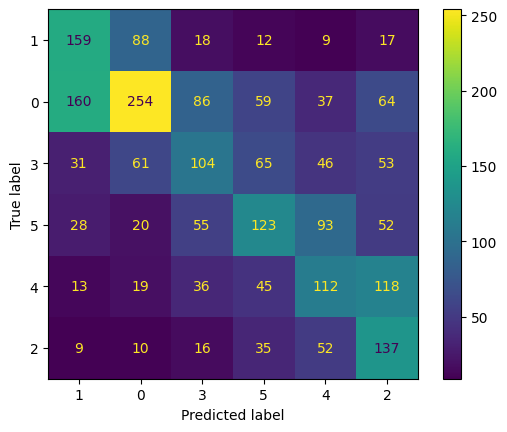

In [ ]:
cm_model_with_llm_test = confusion_matrix(all_labels_test, all_preds_test)
disp_model_with_llm_test = ConfusionMatrixDisplay(confusion_matrix=cm_model_with_llm_test, display_labels=df_test['label'].unique())
print(disp_model_with_llm_test.plot())

### Validation

In [ ]:
# Convert validation text data to sequences using the same vocabulary and max lengths
validation_news_seqs = [text_to_sequence(t, MAX_LEN_NEWS) for t in df_validation['statement']]
validation_ctx_seqs  = [text_to_sequence(t, MAX_LEN_CONTEXT) for t in df_validation[text_context_cols].astype(str).agg(' '.join, axis=1)]

# Select numerical features for validation data
validation_numeric_data = df_validation[numeric_features_names].values.astype(float)

# Get validation labels
validation_labels = df_validation['label'].values

# Convert validation data to tensors
validation_news_seqs = torch.tensor(validation_news_seqs, dtype=torch.long)
validation_ctx_seqs  = torch.tensor(validation_ctx_seqs, dtype=torch.long)
validation_numeric_data = torch.tensor(validation_numeric_data, dtype=torch.float32)
validation_labels = torch.tensor(validation_labels, dtype=torch.long)

# Also generate LLM embeddings for the validation data
df_validation['combined_text'] = df_validation['statement'].astype(str) + " " + df_validation['context'].astype(str) + " " + df_validation['justification'].astype(str)
validation_llm_embeddings_list = []

llm_model.eval() # Ensure LLM model is in evaluation mode
with torch.no_grad():
    for i in range(0, len(df_validation), batch_size_llm):
        batch_texts = df_validation['combined_text'].iloc[i:i+batch_size_llm].tolist()
        tokenized_inputs = tokenizer(batch_texts, padding=True, truncation=True, max_length=MAX_LEN_LLM, return_tensors='pt').to(device)
        outputs = llm_model(**tokenized_inputs)
        validation_llm_embeddings_list.append(outputs.pooler_output.cpu().numpy())

validation_llm_embeddings = np.concatenate(validation_llm_embeddings_list, axis=0)
validation_llm_embeddings = torch.tensor(validation_llm_embeddings, dtype=torch.float32)


# Create Validation Dataset and DataLoader
validation_dataset_with_llm = FakeNewsDatasetWithLLM(validation_news_seqs, validation_ctx_seqs, validation_numeric_data, validation_llm_embeddings, validation_labels)
validation_loader_with_llm = DataLoader(validation_dataset_with_llm, batch_size=32)

# Evaluate the model on the validation set
model_with_llm.eval()
total_correct_validation = 0
total_count_validation = 0
all_preds_validation = []
all_labels_validation = []

with torch.no_grad():
    for batch_news, batch_ctx, batch_num, batch_llm, batch_labels in validation_loader_with_llm:
        batch_news = batch_news.to(device)
        batch_ctx  = batch_ctx.to(device)
        batch_num  = batch_num.to(device)
        batch_llm  = batch_llm.to(device)
        batch_labels = batch_labels.to(device)

        logits = model_with_llm(batch_news, batch_ctx, batch_num, batch_llm)
        preds = logits.argmax(dim=1)
        total_correct_validation += (preds == batch_labels).sum().item()
        total_count_validation += batch_labels.size(0)

        all_preds_validation.extend(preds.cpu().numpy())
        all_labels_validation.extend(batch_labels.cpu().numpy())

validation_accuracy_with_llm = total_correct_validation / total_count_validation
validation_f1_macro_with_llm = f1_score(all_labels_validation, all_preds_validation, average='macro')
validation_f1_micro_with_llm = f1_score(all_labels_validation, all_preds_validation, average='micro')

print(f"Validation Accuracy (with LLM): {validation_accuracy_with_llm:.4f}")
print(f"Validation F1-macro (with LLM): {validation_f1_macro_with_llm:.4f}")
print(f"Validation F1-micro (with LLM): {validation_f1_micro_with_llm:.4f}")

Validation Accuracy (with LLM): 0.3940
Validation F1-macro (with LLM): 0.3877
Validation F1-micro (with LLM): 0.3940


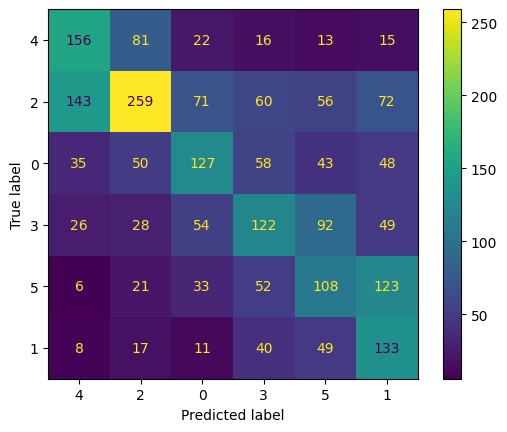

In [ ]:
cm_model_with_llm_validation = confusion_matrix(all_labels_validation, all_preds_validation)
disp_model_with_llm_validation = ConfusionMatrixDisplay(confusion_matrix=cm_model_with_llm_validation, display_labels=df_validation['label'].unique())
print(disp_model_with_llm_validation.plot())

This section is about building a new model for fake news detection that combines the previous approach (using CNNs for text and a CNN+LSTM for numbers, plus a Gaussian Fuzzy layer) with the power of a large language model (LLM) like BERT.

Here's a breakdown of what happens:

1.  **Generating LLM Embeddings**: First, we take the text data from the 'statement', 'context', and 'justification' columns and combine them into a single text string for each news entry. Then, we use a pre-trained BERT model (a type of LLM) to create numerical representations (embeddings) of these combined text strings. Think of these embeddings as rich numerical summaries of the text's meaning.

2.  **Updating the Dataset**: We then update our dataset to include these new LLM embeddings alongside the existing text sequences and numerical features.

3.  **Building a New Model Architecture**: We create a new version of our FDHN model called `FDHNWithLLM`. This new model includes:
    *   The same components as before for processing the original text data (using TextCNNs) and the numerical features (using a CNN+LSTM).
    *   A new part specifically designed to take the LLM embeddings and process them (in this case, a simple linear layer).
    *   The Gaussian Fuzzy layer, which still works with the output of the numerical context module.
    *   A final layer that takes the outputs from *all* these components (original text features, numerical features, LLM features, and fuzzy features) and uses them to predict the fake news label.

4.  **Training and Evaluating the New Model**: Finally, we train this new `FDHNWithLLM` model using the dataset that now includes the LLM embeddings. After training, we evaluate its performance on the test and validation sets to see if adding the LLM embeddings improved the fake news detection accuracy.

In essence, we're trying to see if adding the deeper understanding of text provided by a powerful LLM like BERT can help our model become even better at identifying fake news by giving it another perspective on the data.

# Hybrid ANN + BERT Model

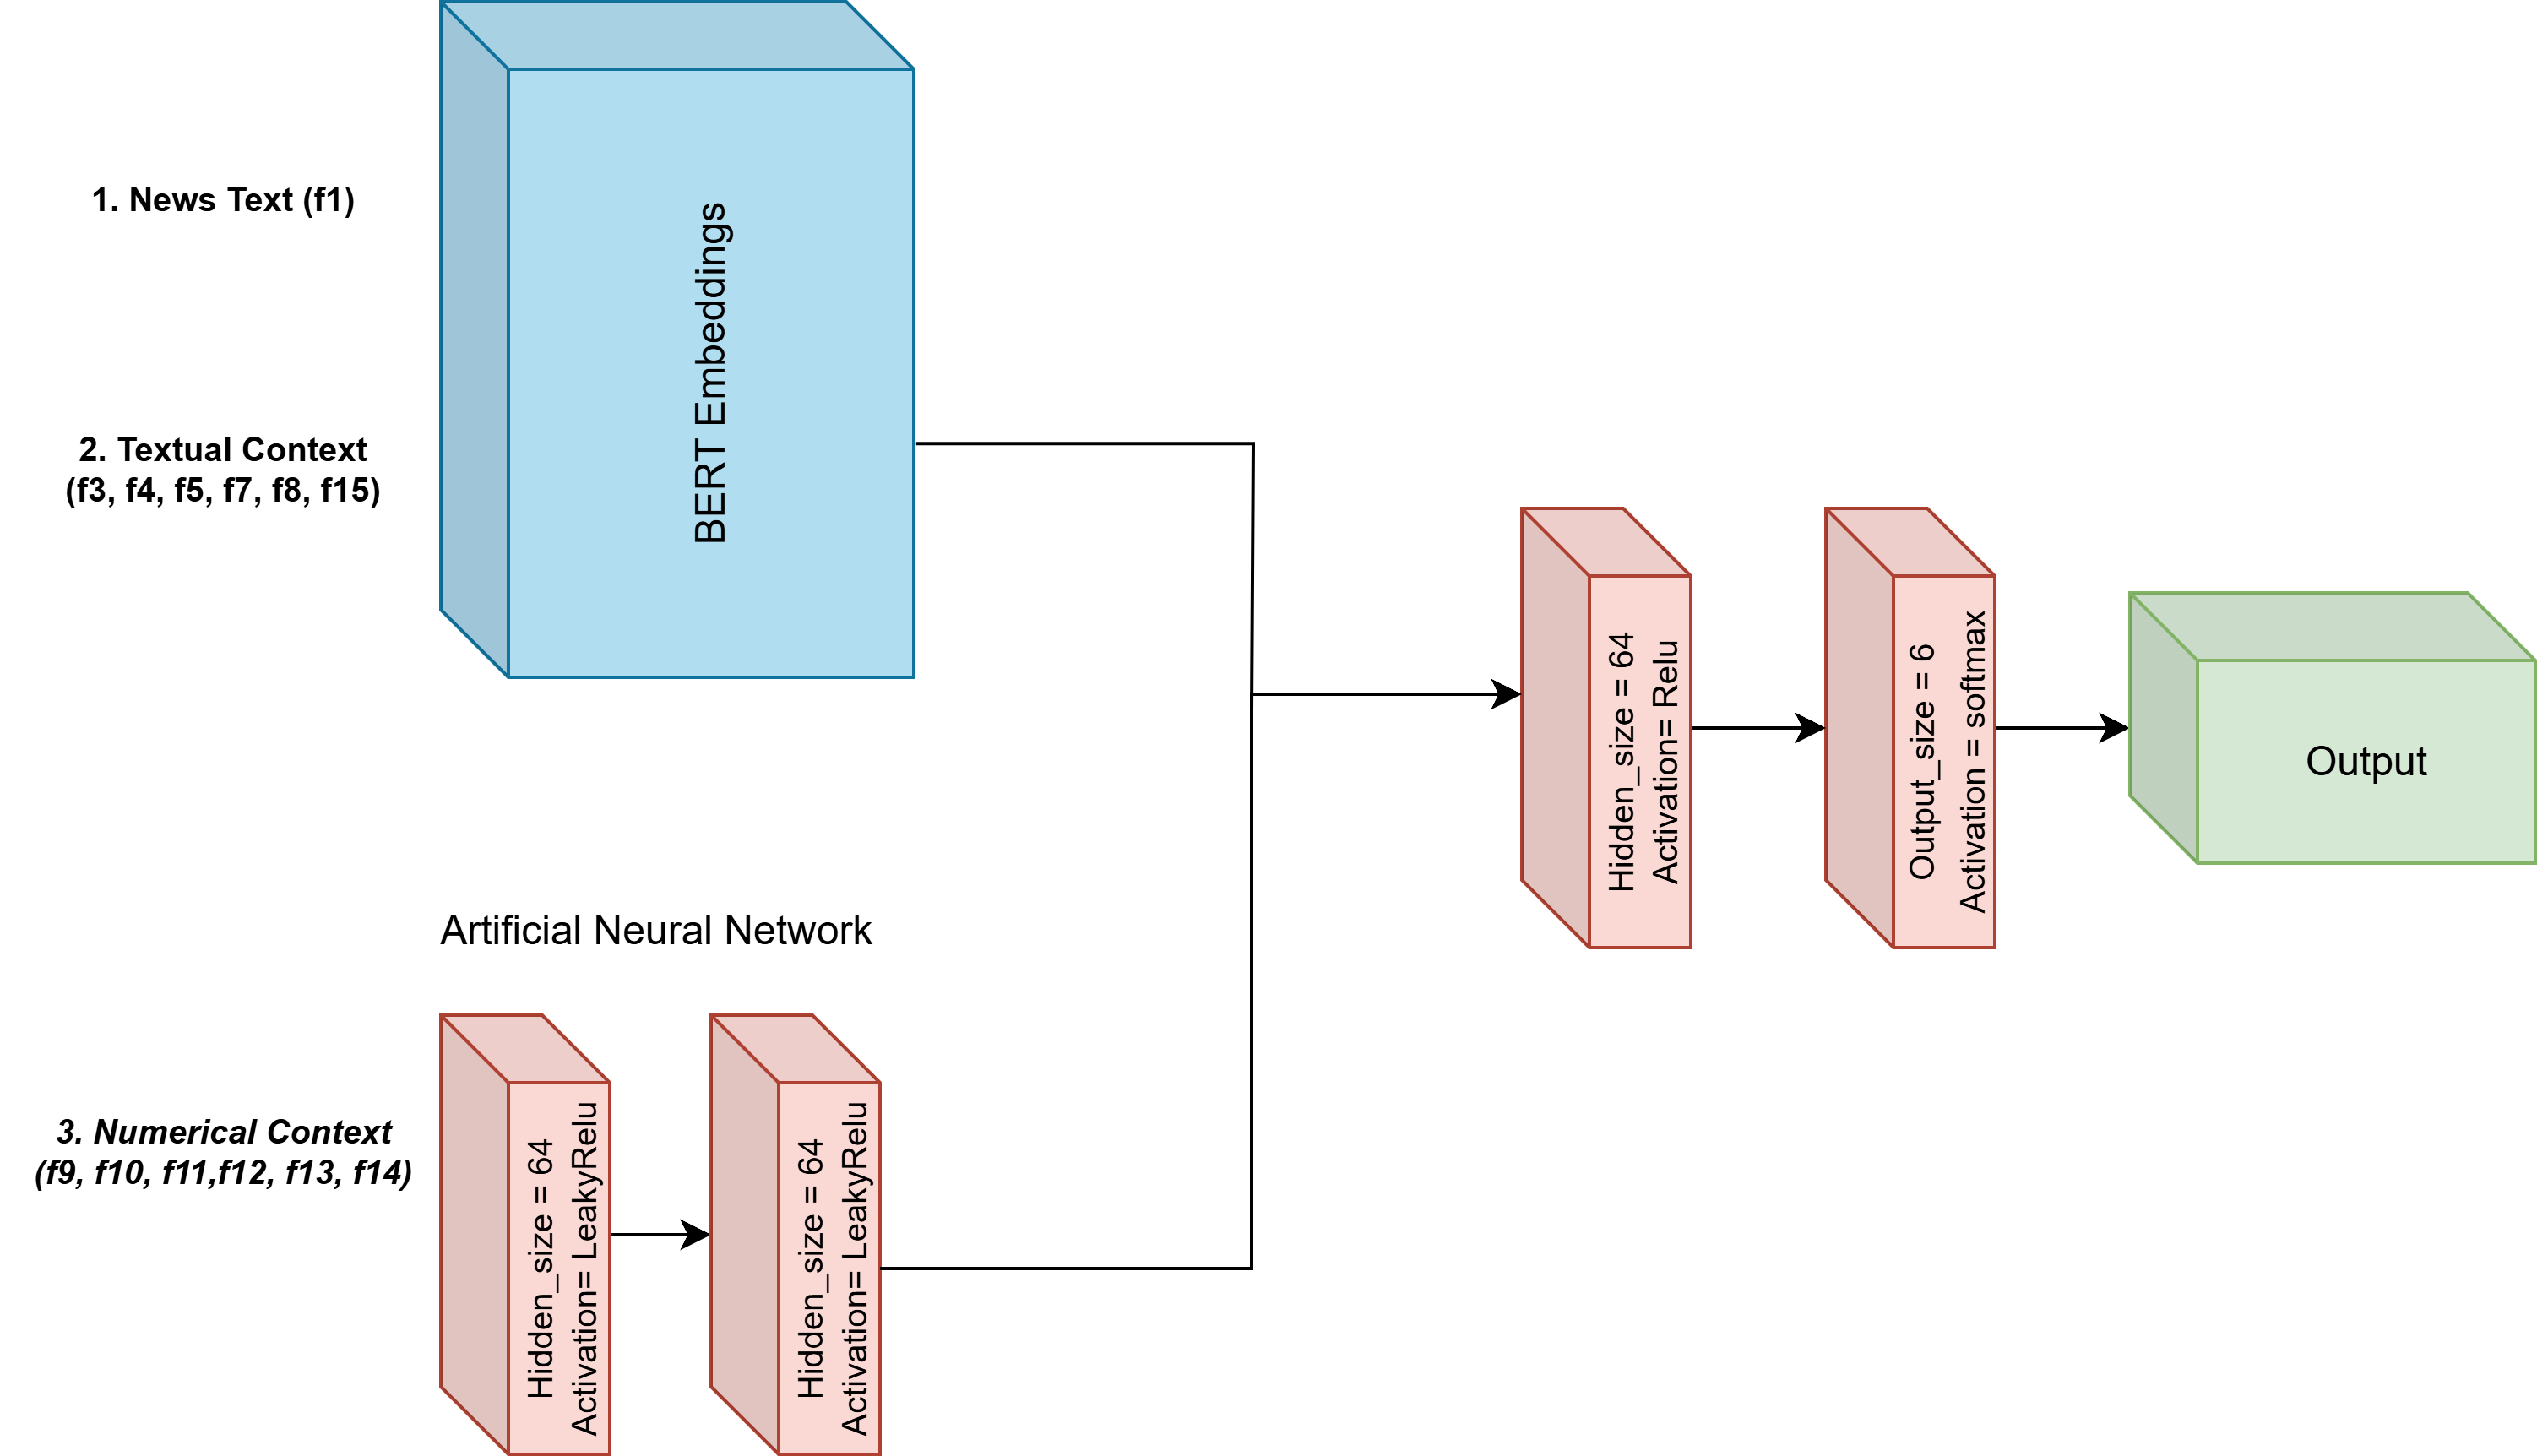

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from sklearn.preprocessing import StandardScaler
from transformers import BertTokenizer, TFBertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Select the int64 columns from df_train_balanced
int_cols = df_train_balanced.select_dtypes(include='int64').columns
df_train_balanced_int = df_train_balanced[int_cols]

# Separate features (X) and target (y)
X = df_train_balanced_int.drop('label', axis=1)
y = df_train_balanced_int['label']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## Tokenise Text Data

In [ ]:
"""
This snippet concatenates all object-type text columns (excluding any existing token arrays), fills missing strings, builds a single concatenated_text field,
tokenizes it with padding/truncation, then stores input_ids and attention_mask back into the DataFrame as NumPy arrays for downstream modeling.
"""
object_cols = df_train_balanced.select_dtypes(include='object').columns
# Exclude 'input_ids' and 'attention_mask' from object_cols for concatenation
text_cols = object_cols.drop(['input_ids', 'attention_mask'], errors='ignore')
df_train_balanced[text_cols] = df_train_balanced[text_cols].fillna('')
df_train_balanced['concatenated_text'] = df_train_balanced[text_cols].agg(' '.join, axis=1)
tokenized_output = tokenizer(list(df_train_balanced['concatenated_text']), padding=True, truncation=True, return_tensors="tf")
df_train_balanced['input_ids'] = list(tokenized_output['input_ids'].numpy())
df_train_balanced['attention_mask'] = list(tokenized_output['attention_mask'].numpy())

## Prepare data for BERT model

In [ ]:
"""
This code concatenates tokenized IDs and masks into NumPy arrays, converts them to TensorFlow tensors, builds a tf.data.Dataset pairing ((input_ids, attention_mask), label),
and prints one sample to verify structure for downstream Keras/BERT training.
"""
import numpy as np
# Extract the 'input_ids' and 'attention_mask' columns and convert to a single NumPy array
input_ids = np.array(df_train_balanced['input_ids'].tolist())
attention_mask = np.array(df_train_balanced['attention_mask'].tolist())

# Convert to TensorFlow tensors
input_ids_tensor = tf.constant(input_ids)
attention_mask_tensor = tf.constant(attention_mask)

# Prepare the target variable as a TensorFlow tensor
labels_tensor = tf.constant(df_train_balanced['label'].values)

# Create a TensorFlow dataset
dataset = tf.data.Dataset.from_tensor_slices(((input_ids_tensor, attention_mask_tensor), labels_tensor))

# Display the dataset structure and a sample element
for element in dataset.take(1):
    print(element)

((<tf.Tensor: shape=(512,), dtype=int32, numpy=
array([  101,  2758, 18079,  6174,  3660,  3039,  3951, 22680,  2000,
        3013,  2010,  3836,  3477,  5333,  6378,  2011,  3438,  3867,
        2258,  2382,  1010,  2286,  2495,  1010,  2110,  5166, 10786,
        9092,  2102, 10786,  9092,  2102,  2003,  1996,  3242, 10169,
        1997,  1996,  3516,  3537,  2283,  1037,  2280,  9568,  2923,
        2040,  3268,  1999,  4206, 23278, 29522,  2016,  2001,  2700,
        2000,  1996,  2695,  1999,  2254,  2286,  3516,  1037,  3516,
        5755,  5930,  9092,  2102,  2056,  3660,  2069,  2288,  3438,
        3867,  1997,  1996,  3836,  3477,  5333,  2002,  2359,  1996,
        2345,  5166, 12014,  9909,  5190,  1997,  2512,  7076, 18300,
        5668,  2046,  1996,  3477,  5333,  4666,  2029,  2071,  7461,
        1996,  2193,  1997,  5089,  2040,  2131, 13275,  2030,  2012,
        2560,  2129,  2172,  2216, 13275,  2024,  2145,  2057,  2123,
        2102,  2113,  2054,  2008,  2097, 

## Combined model (ANN + BERT)

In [ ]:
"""
This Keras model builds a hybrid classifier: a custom BERT layer outputs [CLS] embeddings from bert-base-uncased, a two-layer ANN encodes scaled numeric features (64 units + LeakyReLU twice),
both are concatenated, then a 128-unit ReLU dense feeds a 6-way softmax for veracity classification; it compiles with Adam and sparse categorical cross-entropy and supports
variable-length token sequences via None-shaped input_ids and attention_mask tensors for downstream training.
"""

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LeakyReLU, concatenate
from tensorflow.keras.models import Model
# Import the TensorFlow BERT model
from transformers import TFBertModel

tf.random.set_seed(42)
class BertLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(BertLayer, self).__init__(**kwargs)
        # Load the TensorFlow BERT model, trying from_pt=True as a workaround
        self.bert = TFBertModel.from_pretrained('bert-base-uncased', from_pt=True) # Changed from_pt to True

    def call(self, inputs):
        input_ids, attention_mask = inputs

        # Get output from TensorFlow BERT model
        # The output is a tuple, the first element is the last hidden state
        outputs = self.bert(input_ids, attention_mask=attention_mask)
        last_hidden_states = outputs.last_hidden_state # (batch_size, sequence_length, hidden_size)

        # Take the embedding of the [CLS] token (usually the first token)
        cls_embedding = last_hidden_states[:, 0, :] # (batch_size, hidden_size)

        return cls_embedding


# Define input layers
input_ids_layer = Input(shape=(None,), dtype=tf.int32, name='input_ids') # Use None for variable sequence length
attention_mask_layer = Input(shape=(None,), dtype=tf.int32, name='attention_mask') # Use None for variable sequence length
numerical_input_layer = Input(shape=(X_scaled.shape[1],), dtype=tf.float32, name='numerical_input')

# BERT model for text inputs
bert_output = BertLayer()([input_ids_layer, attention_mask_layer])

# ANN for numerical inputs
numerical_dense1 = Dense(64, name='numerical_dense1')
numerical_leakyrelu1 = LeakyReLU(alpha=0.01, name='numerical_leakyrelu1')
numerical_dense2 = Dense(64, name='numerical_dense2')
numerical_leakyrelu2 = LeakyReLU(alpha=0.01, name='numerical_leakyrelu2')
ann_output = numerical_leakyrelu2(numerical_dense2(numerical_leakyrelu1(numerical_dense1(numerical_input_layer))))

# Concatenate outputs
combined_output = concatenate([bert_output, ann_output])

# Classification layers
dense1 = Dense(128, activation='relu')(combined_output)
dense2 = Dense(6, activation='softmax')(dense1) # Output layer with 6 units for 6 classes

# Define the combined model
combined_model = Model(inputs=[input_ids_layer, attention_mask_layer, numerical_input_layer], outputs=dense2)

# Compile the model
combined_model.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

combined_model.summary()

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ numerical_input     │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ numerical_dense1    │ (None, 64)        │        448 │ numerical_input[… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ numerical_leakyrel… │ (None, 64)        │          0 │ numerical_dense1… │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_ids           │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_mask      │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ numerical_dense2    │ (None, 64)        │      4,160 │ numerical_leakyr… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bert_layer_3        │ (None, 768)       │          0 │ input_ids[0][0],  │
│ (BertLayer)         │                   │            │ attention_mask[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ numerical_leakyrel… │ (None, 64)        │          0 │ numerical_dense2… │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_3       │ (None, 832)       │          0 │ bert_layer_3[0][… │
│ (Concatenate)       │                   │            │ numerical_leakyr… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 128)       │    106,624 │ concatenate_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 6)         │        774 │ dense_6[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 112,006 (437.52 KB)

 Trainable params: 112,006 (437.52 KB)

 Non-trainable params: 0 (0.00 B)

## Preparing training data for combined training

In [ ]:
# Prepare numerical features as a TensorFlow tensor
X_scaled_tensor = tf.constant(X_scaled, dtype=tf.float32)

# Create a TensorFlow dataset with all inputs and the target
dataset = tf.data.Dataset.from_tensor_slices(({'input_ids': input_ids_tensor,
                                               'attention_mask': attention_mask_tensor,
                                               'numerical_input': X_scaled_tensor},
                                              labels_tensor))

# Shuffle and batch the dataset
BATCH_SIZE = 32
dataset = dataset.shuffle(buffer_size=len(df_train_balanced)).batch(BATCH_SIZE)

# Display the structure of the dataset
for element in dataset.take(1):
    print(element)

({'input_ids': <tf.Tensor: shape=(32, 512), dtype=int32, numpy=
array([[  101,  8112,  2056, ...,     0,     0,     0],
       [  101,  3537,  4018, ...,     0,     0,     0],
       [  101, 19971, 10970, ...,     0,     0,     0],
       ...,
       [  101,  2678,  3065, ...,     0,     0,     0],
       [  101,  2028,  3634, ...,     0,     0,     0],
       [  101,  2577, 12305, ...,     0,     0,     0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(32, 512), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>, 'numerical_input': <tf.Tensor: shape=(32, 6), dtype=float32, numpy=
array([[ 4.8611565 ,  4.2839675 ,  3.1267793 ,  0.4069479 , -0.27962977,
        -0.43827972],
       [-0.3111515 , -0.47295812, -0.6203885 , -0.53073025, -0.44110507,
        -0.4839943 ],
       [-0.5284754 , -0.591

## Training

In [ ]:
history = combined_model.fit(dataset, epochs=20) # Train on the full dataset

Epoch 1/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 53s 72ms/step - accuracy: 0.2996 - loss: 1.6258
Epoch 2/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 30s 61ms/step - accuracy: 0.4098 - loss: 1.4244
Epoch 3/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 30s 61ms/step - accuracy: 0.4301 - loss: 1.3734
Epoch 4/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 30s 61ms/step - accuracy: 0.4484 - loss: 1.3486
Epoch 5/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 30s 61ms/step - accuracy: 0.4744 - loss: 1.3034
Epoch 6/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 30s 61ms/step - accuracy: 0.4951 - loss: 1.2605
Epoch 7/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 30s 61ms/step - accuracy: 0.5151 - loss: 1.2201
Epoch 8/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 30s 61ms/step - accuracy: 0.5184 - loss: 1.1954
Epoch 9/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 30s 61ms/step - accuracy: 0.5401 - loss: 1.1594
Epoch 10/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 30s 61ms/step - accuracy: 0.5534 - loss: 1.1332
Epoch 11/20
491/491 ━━━━━━━━━━━━━━━━━━━━ 30s 61ms/step - accuracy: 0.5587 - loss: 1.1181
Epoch 12/20
491/491 ━━━━━━━━━━

## Prepare Test Data

In [ ]:
# Prepare test data
# Recreate object_cols excluding input_ids and attention_mask for df_test
object_cols_test = df_test.select_dtypes(include='object').columns
text_cols_test = object_cols_test.drop(['input_ids', 'attention_mask'], errors='ignore')

df_test[text_cols_test] = df_test[text_cols_test].fillna('')
df_test['concatenated_text'] = df_test[text_cols_test].agg(' '.join, axis=1)

# Tokenize the concatenated text for test data
test_tokenized_output = tokenizer(list(df_test['concatenated_text']), padding=True, truncation=True, return_tensors="tf")
test_input_ids = np.array(test_tokenized_output['input_ids'].numpy())
test_attention_mask = np.array(test_tokenized_output['attention_mask'].numpy())


test_int_cols = df_test.select_dtypes(include='int64').columns
df_test_int = df_test[test_int_cols]
X_test = df_test_int.drop('label', axis=1)
y_test = df_test_int['label']
X_test_scaled = scaler.transform(X_test) # Use the same scaler fitted on training data

test_input_ids_tensor = tf.constant(test_input_ids)
test_attention_mask_tensor = tf.constant(test_attention_mask)
X_test_scaled_tensor = tf.constant(X_test_scaled, dtype=tf.float32)
y_test_tensor = tf.constant(y_test.values)

test_dataset = tf.data.Dataset.from_tensor_slices(({'input_ids': test_input_ids_tensor,
                                                    'attention_mask': test_attention_mask_tensor,
                                                    'numerical_input': X_test_scaled_tensor},
                                                   y_test_tensor))

test_dataset = test_dataset.batch(BATCH_SIZE)

## Prepare Validation Data

In [ ]:
# Prepare validation data
# Recreate object_cols excluding input_ids and attention_mask for df_validation
object_cols_validation = df_validation.select_dtypes(include='object').columns
text_cols_validation = object_cols_validation.drop(['input_ids', 'attention_mask'], errors='ignore')


df_validation[text_cols_validation] = df_validation[text_cols_validation].fillna('')
df_validation['concatenated_text'] = df_validation[text_cols_validation].agg(' '.join, axis=1)

# Tokenize the concatenated text for validation data
validation_tokenized_output = tokenizer(list(df_validation['concatenated_text']), padding=True, truncation=True, return_tensors="tf")
validation_input_ids = np.array(validation_tokenized_output['input_ids'].numpy())
validation_attention_mask = np.array(validation_tokenized_output['attention_mask'].numpy())


validation_int_cols = df_validation.select_dtypes(include='int64').columns
df_validation_int = df_validation[validation_int_cols]
X_validation = df_validation_int.drop('label', axis=1)
y_validation = df_validation_int['label']
X_validation_scaled = scaler.transform(X_validation) # Use the same scaler fitted on training data

validation_input_ids_tensor = tf.constant(validation_input_ids)
validation_attention_mask_tensor = tf.constant(validation_attention_mask)
X_validation_scaled_tensor = tf.constant(X_validation_scaled, dtype=tf.float32)
y_validation_tensor = tf.constant(y_validation.values)


validation_dataset = tf.data.Dataset.from_tensor_slices(({'input_ids': validation_input_ids_tensor,
                                                          'attention_mask': validation_attention_mask_tensor,
                                                          'numerical_input': X_validation_scaled_tensor},
                                                         y_validation_tensor))

validation_dataset = validation_dataset.batch(BATCH_SIZE)

## Evaluate the Model


Evaluation on Test Data:
Test Loss: 1.2773
Test Accuracy: 0.5126
Test F1-macro: 0.5142
Test F1-micro: 0.5126
Confusion Matrix for Test Data:

Evaluation on Validation Data:
Validation Loss: 1.3129
Validation Accuracy: 0.4985
Validation F1-macro: 0.5000
Validation F1-micro: 0.4985
Confusion Matrix for Validation Data:


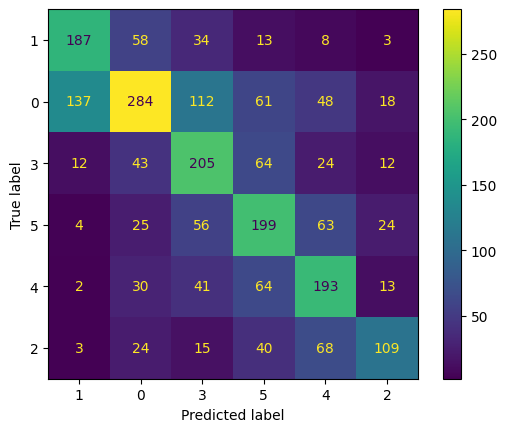

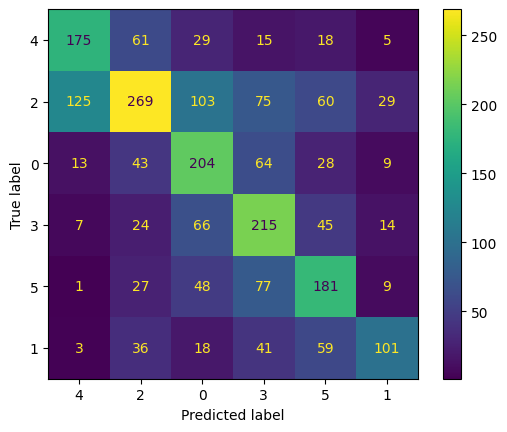

In [ ]:
# Evaluate on test data
print("\nEvaluation on Test Data:")
# Evaluate the model on the test dataset
test_loss, test_accuracy = combined_model.evaluate(test_dataset, verbose=0) # Added verbose=0 to suppress progress bar
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Calculate and print F1-macro and F1-micro for test data
y_true_test = []
y_pred_test = []
for inputs, labels in test_dataset: # Iterate to get the input dictionary and labels
    preds = combined_model.predict(inputs, verbose=0) # Pass the input dictionary directly
    y_pred_test.extend(np.argmax(preds, axis=1))
    y_true_test.extend(labels.numpy())

test_f1_macro = f1_score(y_true_test, y_pred_test, average='macro')
test_f1_micro = f1_score(y_true_test, y_pred_test, average='micro')
cm_hybrid_test = confusion_matrix(y_true_test, y_pred_test)
disp_hybrid_test = ConfusionMatrixDisplay(confusion_matrix=cm_hybrid_test, display_labels=df_test['label'].unique())

print(f"Test F1-macro: {test_f1_macro:.4f}")
print(f"Test F1-micro: {test_f1_micro:.4f}")
print("Confusion Matrix for Test Data:")
print(disp_hybrid_test.plot())

# Evaluate on validation data
print("\nEvaluation on Validation Data:")
# Evaluate the model on the validation dataset
validation_loss, validation_accuracy = combined_model.evaluate(validation_dataset, verbose=0) # Added verbose=0
print(f"Validation Loss: {validation_loss:.4f}")
print(f"Validation Accuracy: {validation_accuracy:.4f}")

# Calculate and print F1-macro and F1-micro for validation data
y_true_validation = []
y_pred_validation = []
for inputs, labels in validation_dataset: # Iterate to get the input dictionary and labels
    preds = combined_model.predict(inputs, verbose=0) # Pass the input dictionary directly
    y_pred_validation.extend(np.argmax(preds, axis=1))
    y_true_validation.extend(labels.numpy())

validation_f1_macro = f1_score(y_true_validation, y_pred_validation, average='macro')
validation_f1_micro = f1_score(y_true_validation, y_pred_validation, average='micro')
cm_hybrid_validation = confusion_matrix(y_true_validation, y_pred_validation)
disp_hybrid_validation = ConfusionMatrixDisplay(confusion_matrix=cm_hybrid_validation, display_labels=df_validation['label'].unique())
print(f"Validation F1-macro: {validation_f1_macro:.4f}")
print(f"Validation F1-micro: {validation_f1_micro:.4f}")
print("Confusion Matrix for Validation Data:")
print(disp_hybrid_validation.plot())

# Deployment

In [ ]:
# Deploy the combined_model by saving it
combined_model.save('/content/drive/MyDrive/Fake_News_Detection/combined_model.keras')

print("Model saved successfully to /content/drive/MyDrive/Fake_News_Detection/combined_model.keras")

Model saved successfully to /content/drive/MyDrive/Fake_News_Detection/combined_model.keras


# Comparing Performance

In [ ]:
# Collect metrics for all models

model_metrics = {
    'Gaussian Fuzzy': {
        'Test Accuracy': test_accuracy_model1,
        'Test F1-macro': test_f1_macro_model1,
        'Test F1-micro': test_f1_micro_model1,
        'Validation Accuracy': validation_accuracy_model1,
        'Validation F1-macro': validation_f1_macro_model1,
        'Validation F1-micro': validation_f1_micro_model1,
    },
    'Triangular Fuzzy': {
        'Test Accuracy': test_accuracy_model2,
        'Test F1-macro': test_f1_macro_model2,
        'Test F1-micro': test_f1_micro_model2,
        'Validation Accuracy': validation_accuracy_model2,
        'Validation F1-macro': validation_f1_macro_model2,
        'Validation F1-micro': validation_f1_micro_model2,
    },
    'Trapezoidal Fuzzy': {
        'Test Accuracy': test_accuracy_model3,
        'Test F1-macro': test_f1_macro_model3,
        'Test F1-micro': test_f1_micro_model3,
        'Validation Accuracy': validation_accuracy_model3,
        'Validation F1-macro': validation_f1_macro_model3,
        'Validation F1-micro': validation_f1_micro_model3,
    },
    'Sigmoid-Based Fuzzy': {
        'Test Accuracy': test_accuracy_model4,
        'Test F1-macro': test_f1_macro_model4,
        'Test F1-micro': test_f1_micro_model4,
        'Validation Accuracy': validation_accuracy_model4,
        'Validation F1-macro': validation_f1_macro_model4,
        'Validation F1-micro': validation_f1_micro_model4,
    },
    'FNN Fuzzy': {
        'Test Accuracy': test_accuracy_model5,
        'Test F1-macro': test_f1_macro_model5,
        'Test F1-micro': test_f1_micro_model5,
        'Validation Accuracy': validation_accuracy_model5,
        'Validation F1-macro': validation_f1_macro_model5,
        'Validation F1-micro': validation_f1_micro_model5,
    },
    'Bell Fuzzy': {
        'Test Accuracy': test_accuracy_model6,
        'Test F1-macro': test_f1_macro_model6,
        'Test F1-micro': test_f1_micro_model6,
        'Validation Accuracy': validation_accuracy_model6,
        'Validation F1-macro': validation_f1_macro_model6,
        'Validation F1-micro': validation_f1_micro_model6,
    },
    'FDHN with LLM': {
        'Test Accuracy': test_accuracy_with_llm,
        'Test F1-macro': test_f1_macro_with_llm,
        'Test F1-micro': test_f1_micro_with_llm,
        'Validation Accuracy': validation_accuracy_with_llm,
        'Validation F1-macro': validation_f1_macro_with_llm,
        'Validation F1-micro': validation_f1_micro_with_llm,
    },
    'Combined BERT + ANN': {
        'Test Accuracy': test_accuracy,
        'Test F1-macro': test_f1_macro,
        'Test F1-micro': test_f1_micro,
        'Validation Accuracy': validation_accuracy,
        'Validation F1-macro': validation_f1_macro,
        'Validation F1-micro': validation_f1_micro,
    }
}

# Print the metrics in a structured format
print("Model Performance Summary (Test and Validation):")
print("-" * 60)
for model_name, metrics in model_metrics.items():
    print(f"\n--- {model_name} ---")
    print(f"  Test Accuracy: {metrics['Test Accuracy']:.4f}")
    print(f"  Test F1-macro: {metrics['Test F1-macro']:.4f}")
    print(f"  Test F1-micro: {metrics['Test F1-micro']:.4f}")
    print(f"  Validation Accuracy: {metrics['Validation Accuracy']:.4f}")
    print(f"  Validation F1-macro: {metrics['Validation F1-macro']:.4f}")
    print(f"  Validation F1-micro: {metrics['Validation F1-micro']:.4f}")

print("-" * 60)

Model Performance Summary (Test and Validation):
------------------------------------------------------------

--- Gaussian Fuzzy ---
  Test Accuracy: 0.4125
  Test F1-macro: 0.4079
  Test F1-micro: 0.4125
  Validation Accuracy: 0.4253
  Validation F1-macro: 0.4218
  Validation F1-micro: 0.4253

--- Triangular Fuzzy ---
  Test Accuracy: 0.4172
  Test F1-macro: 0.4165
  Test F1-micro: 0.4172
  Validation Accuracy: 0.4131
  Validation F1-macro: 0.4139
  Validation F1-micro: 0.4131

--- Trapezoidal Fuzzy ---
  Test Accuracy: 0.3907
  Test F1-macro: 0.3899
  Test F1-micro: 0.3907
  Validation Accuracy: 0.3722
  Validation F1-macro: 0.3721
  Validation F1-micro: 0.3722

--- Sigmoid-Based Fuzzy ---
  Test Accuracy: 0.4125
  Test F1-macro: 0.4136
  Test F1-micro: 0.4125
  Validation Accuracy: 0.4075
  Validation F1-macro: 0.4078
  Validation F1-micro: 0.4075

--- FNN Fuzzy ---
  Test Accuracy: 0.4072
  Test F1-macro: 0.4115
  Test F1-micro: 0.4072
  Validation Accuracy: 0.4001
  Validation F1

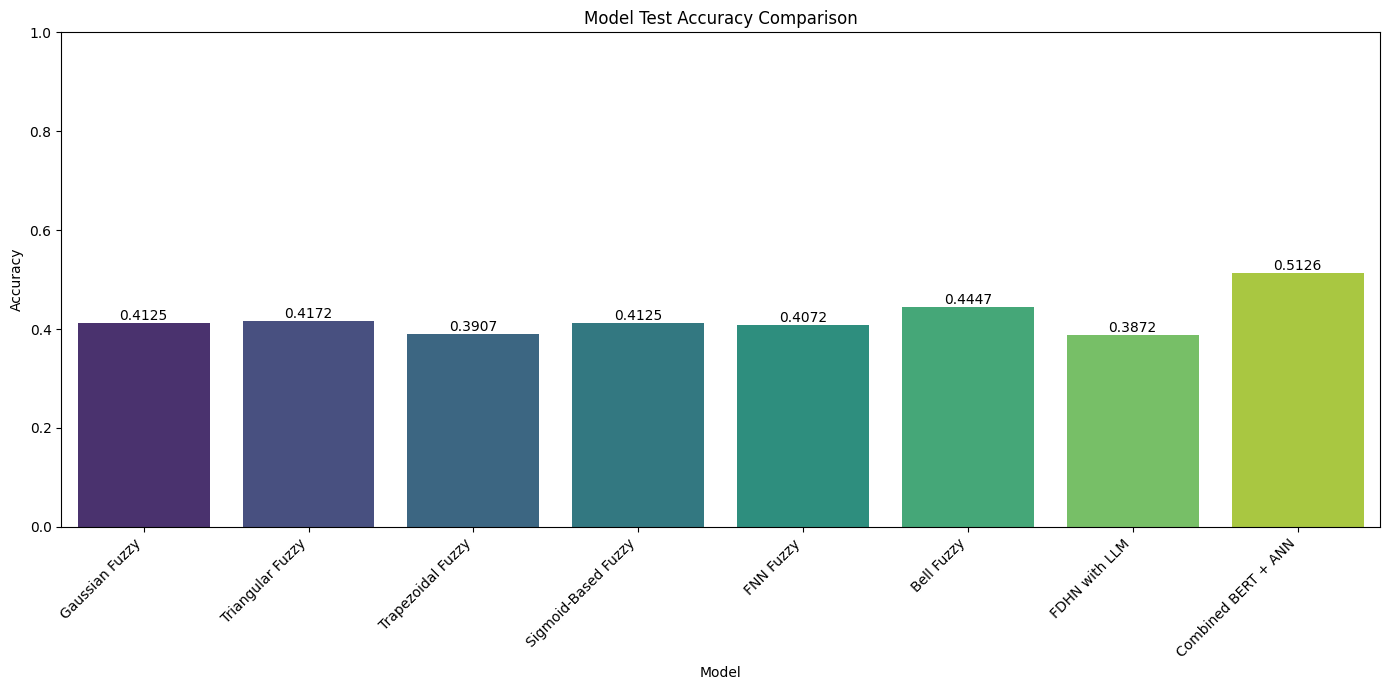

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a dictionary for test accuracies
test_accuracies_dict = {model_name: metrics['Test Accuracy'] for model_name, metrics in model_metrics.items()}

# Convert the dictionary to a pandas DataFrame for easier plotting
df_test_accuracies = pd.DataFrame.from_dict(test_accuracies_dict, orient='index', columns=['Test Accuracy'])

# Plot the test accuracies
plt.figure(figsize=(14, 7))
ax = sns.barplot(x=df_test_accuracies.index, y='Test Accuracy', data=df_test_accuracies, palette='viridis')
plt.title('Model Test Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1) # Set y-axis limit from 0 to 1 for accuracy
plt.tight_layout()

# Add the exact values on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.4f')

plt.show()

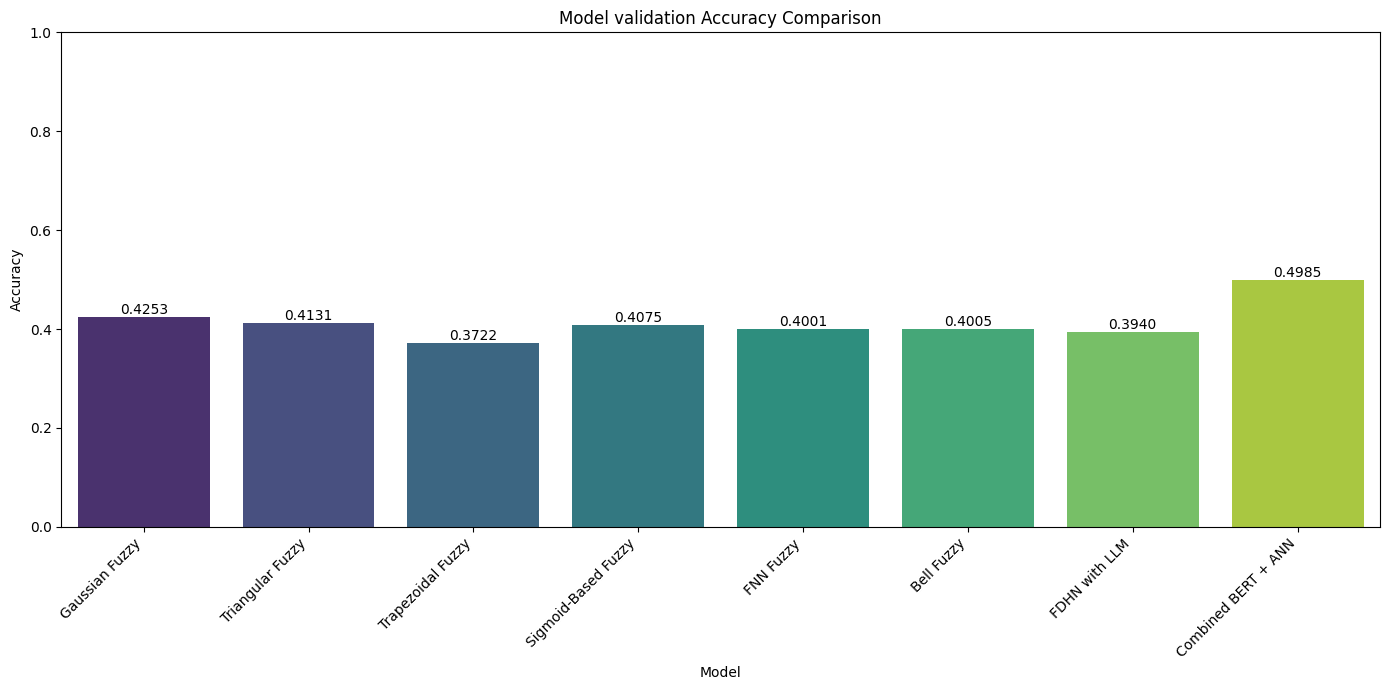

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a dictionary for validation accuracies
validation_accuracies_dict = {model_name: metrics['Validation Accuracy'] for model_name, metrics in model_metrics.items()}

# Convert the dictionary to a pandas DataFrame for easier plotting
df_validation_accuracies = pd.DataFrame.from_dict(validation_accuracies_dict, orient='index', columns=['validation Accuracy'])

# Plot the validation accuracies
plt.figure(figsize=(14, 7))
ax = sns.barplot(x=df_validation_accuracies.index, y='validation Accuracy', data=df_validation_accuracies, palette='viridis')
plt.title('Model validation Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1) # Set y-axis limit from 0 to 1 for accuracy
plt.tight_layout()

# Add the exact values on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.4f')

plt.show()

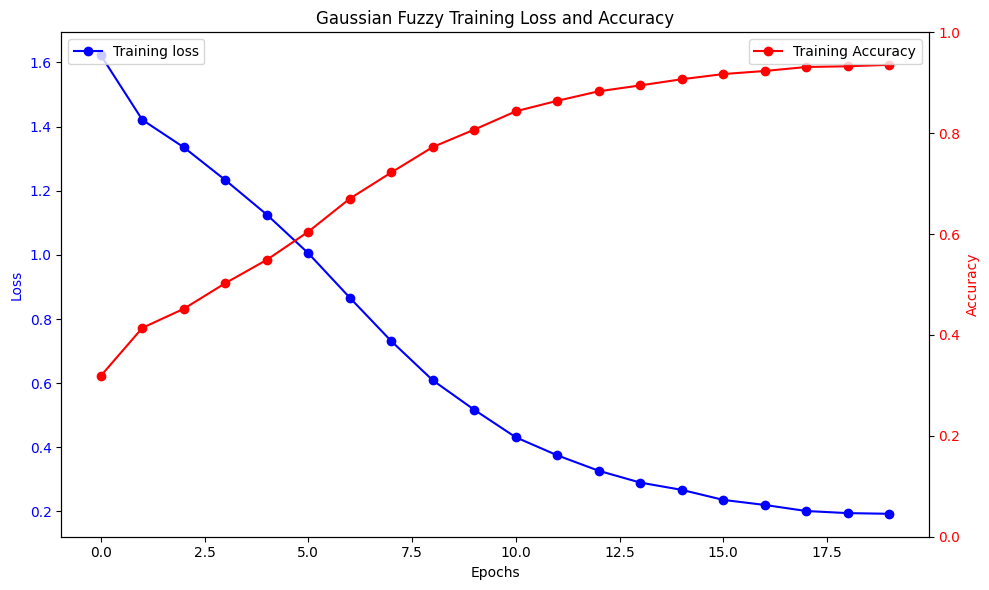

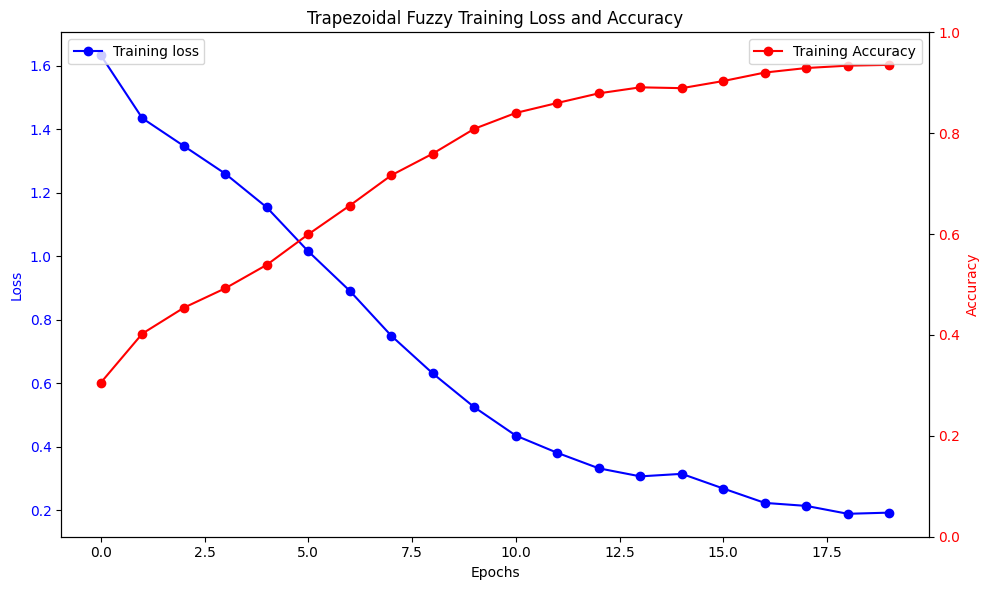

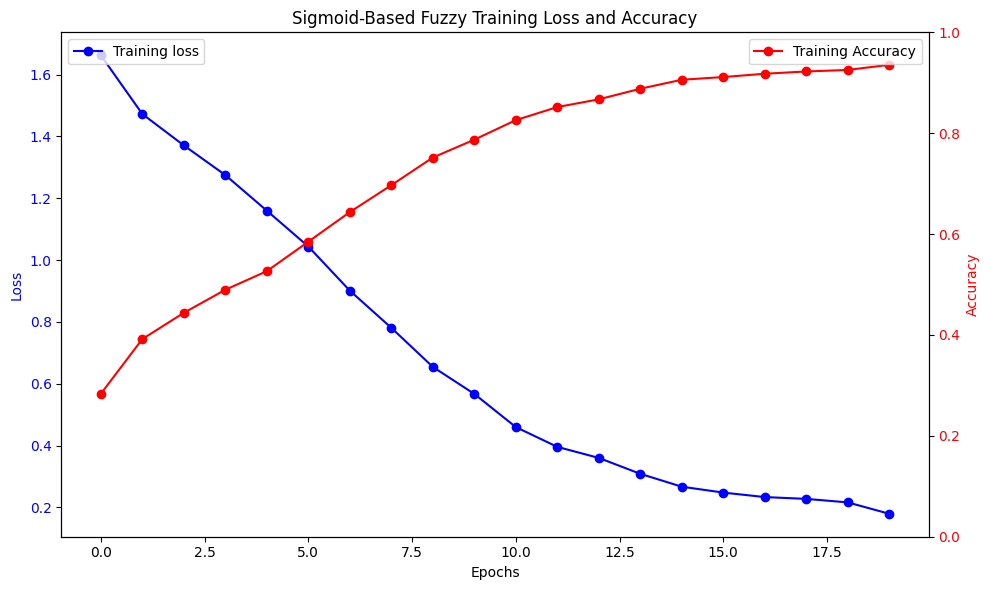

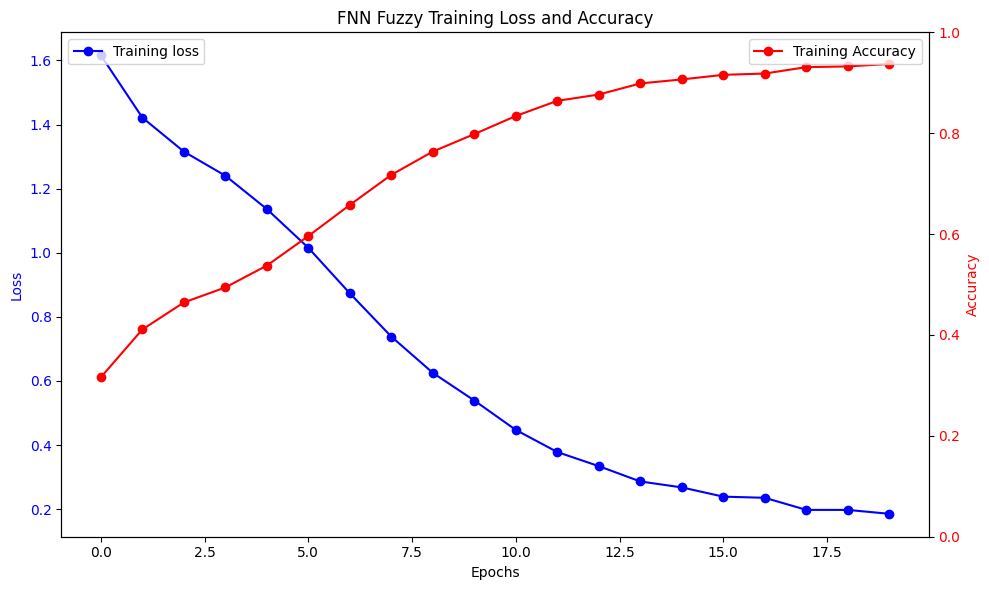

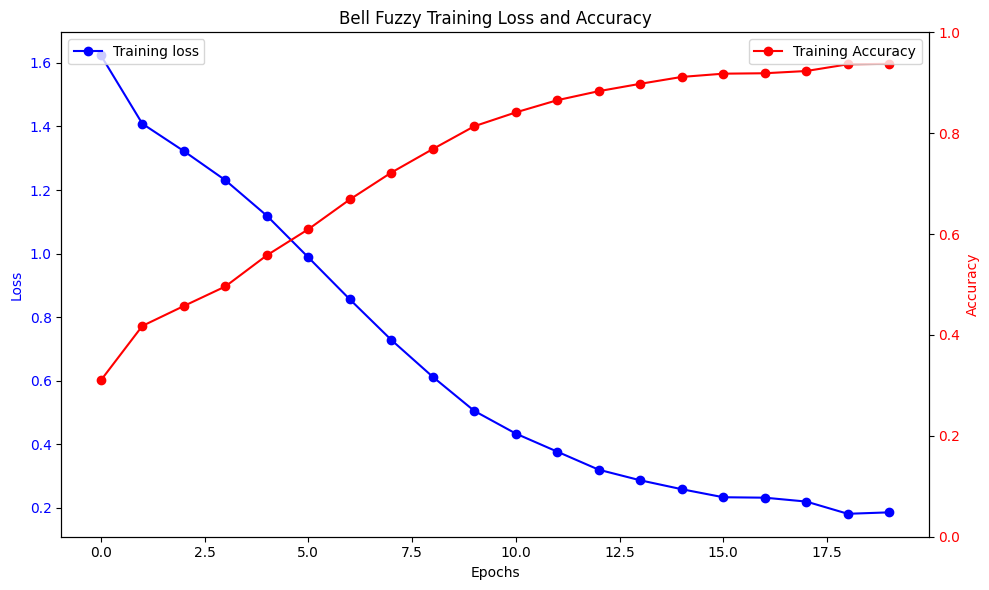

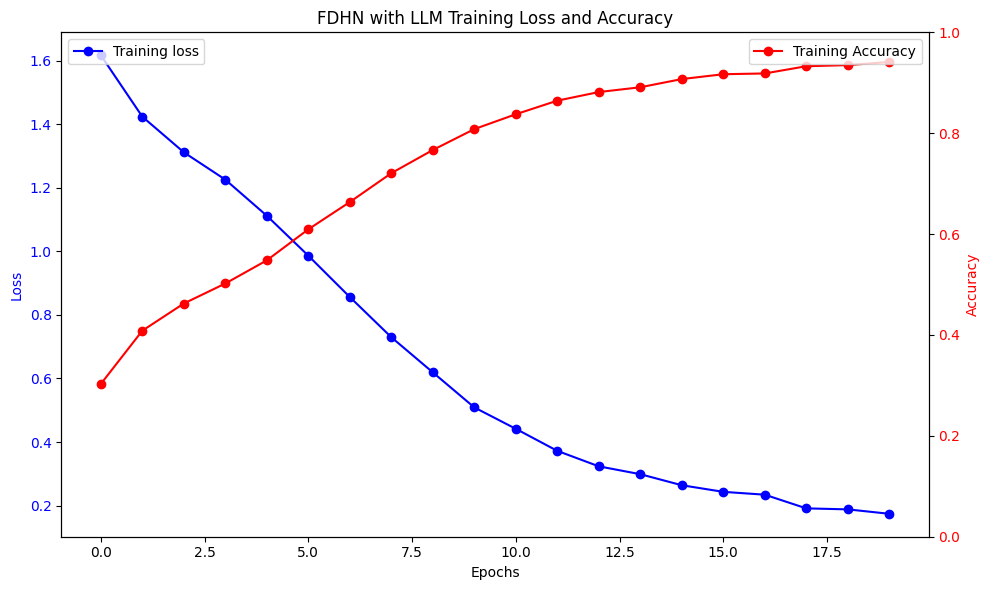

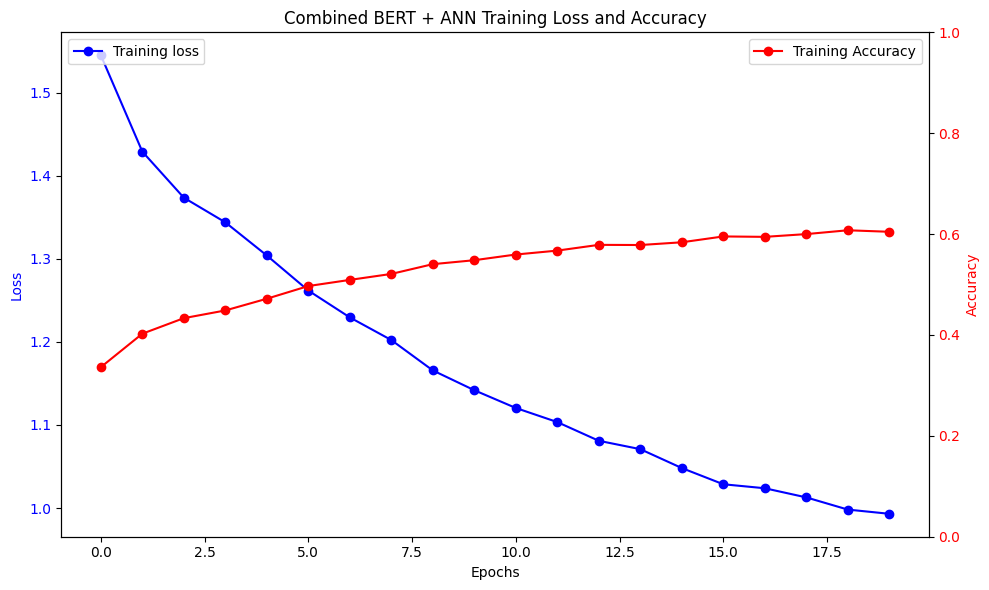

In [ ]:
import matplotlib.pyplot as plt

# Plotting function to combine loss and accuracy
def plot_history_combined(history, model_name):
    epochs = range(len(history['loss'])) # Use index as epochs

    plt.figure(figsize=(10, 6))

    # Plot Loss on the left y-axis
    ax1 = plt.gca()
    ax1.plot(epochs, history['loss'], 'bo-', label='Training loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.legend(loc='upper left')

    # Create a second y-axis for Accuracy
    ax2 = ax1.twinx()
    ax2.plot(epochs, history['accuracy'], 'ro-', label='Training Accuracy')
    ax2.set_ylabel('Accuracy', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.set_ylim(0, 1) # Set y-axis limit from 0 to 1 for accuracy
    ax2.legend(loc='upper right')

    plt.title(f'{model_name} Training Loss and Accuracy')
    plt.tight_layout()
    plt.show()

# Plot for each model
plot_history_combined(history_model1, 'Gaussian Fuzzy')
# Note: history_model2's training failed, so plotting might not be meaningful.
# plot_history_combined(history_model2, 'Triangular Fuzzy')
plot_history_combined(history_model3, 'Trapezoidal Fuzzy')
plot_history_combined(history_model4, 'Sigmoid-Based Fuzzy')
plot_history_combined(history_model5, 'FNN Fuzzy')
plot_history_combined(history_model6, 'Bell Fuzzy')
plot_history_combined(history_model_llm, 'FDHN with LLM')

# For the Combined BERT + ANN model, the history is stored in the 'history' object from TensorFlow
plt.figure(figsize=(10, 6))

# Plot Loss
ax1 = plt.gca()
ax1.plot(history.history['loss'], 'bo-', label='Training loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

# Create a second y-axis for Accuracy
ax2 = ax1.twinx()
ax2.plot(history.history['accuracy'], 'ro-', label='Training Accuracy')
ax2.set_ylabel('Accuracy', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, 1) # Set y-axis limit from 0 to 1 for accuracy
ax2.legend(loc='upper right')


plt.title('Combined BERT + ANN Training Loss and Accuracy')
plt.tight_layout()
plt.show()